# 1. 인공신경망(Artificial Neural Network)

* 인간 두뇌에 대한 계산적 모델을 통해 인공지능을 구현하려는 분야
* 인간의 뇌 구조를 모방: 뉴런과 뉴런 사이에는 전기신호를 통해 정보를 전달  

## 생물학적 신경세포와 인공신경망 비교

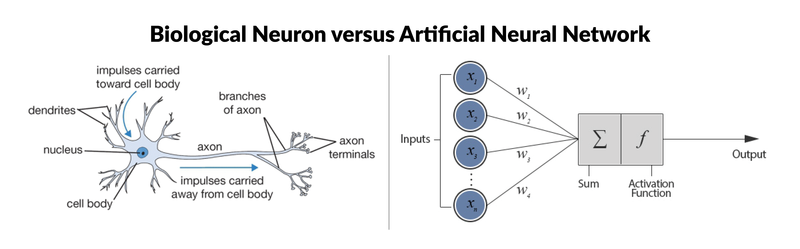

* 신경세포(Neuron)
  - 수상돌기(樹狀突起, Dendrite) : 다른 신경세포의 축색돌기와 연결되어 전기화학적 신호를 받아들이는 부위 
  - 축색돌기(軸索突起, Axon) : 수신한 전기화학적 신호의 합성결과 값이 특정 임계값이 이상이면 신호를 내보는 부위
  - 신경연접(神經連接, Synapse) : 수상돌기와 축색돌기 연결 부위, 전달되는 신호의 증폭 또는 감쇄 


* 인공 뉴런(Artificial Neuron)
  - 신경세포 구조를 단순화하여 모델링한 구조
  - 노드(Node)와 엣지(Edge)로 표현
  - 하나의 노드안에서 입력(Inputs)와 가중치(Weights)를 곱하고 더하는 선형구조(linear)
  - 활성화 함수(activation function)를 통한 비선형 구조(non-linear) 표현 가능

* 인공 신경망(Artificial Neural Network)
  - 여러 개의 인공뉴런들이 모여 연결된 형태
  - 뉴런들이 모인 하나의 단위를 층(layer)이라고 하고, 여러 층(multi layer)으로 이루어질 수 있음
  - ex) 입력층(input layer), 은닉층(hidden layer), 출력층(output layer)

# 2. 딥러닝 프레임워크(Deep Learning Framework)
```
<Note>

- 텐서플로우 : 저수준 API
- 케라스 : 고수준 API
```

## 텐서플로우(Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나
- 구글이 주도적으로 개발하는 플랫폼
- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원
- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)
- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤

## 케라스(Keras)

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" width="320">

- 파이썬으로 작성된 고수준 신경망 API로 TensorFlow, CNTK, 혹은 Theano와 함께 사용 가능
- 사용자 친화성, 모듈성, 확장성을 통해 빠르고 간편한 프로토타이핑 가능
- 컨볼루션 신경망, 순환 신경망, 그리고 둘의 조합까지 모두 지원
- CPU와 GPU에서 매끄럽게 실행

# 3. 딥러닝 데이터 표현과 연산

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
```
<Note>
- tensor의 구조 : rank, shape, dtype
- 일반적으로 6D까지 사용함
```

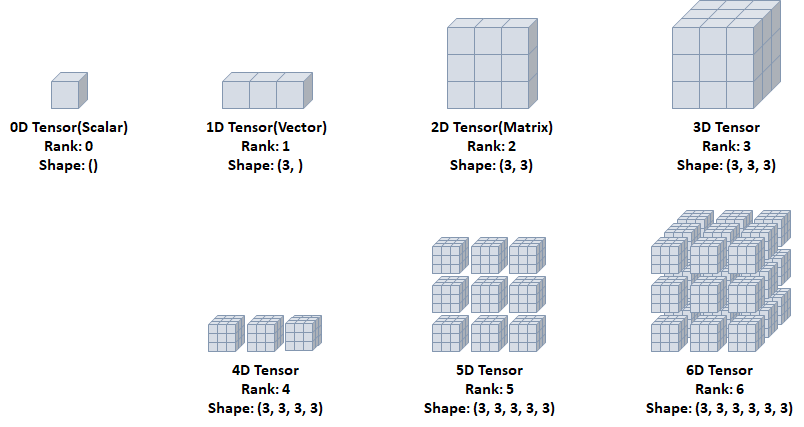

In [1]:
import numpy as np
import tensorflow as tf

tf.__version__

'2.10.0'

## 텐서(Tensor)

- Rank: 축의 개수
- Shape: 형상(각 축에 따른 차원 개수)
- Type: 데이터 타입

```
<Note>
- tf.constant() 명령어로 tensor를 만들 수 있다.
```

### 0D Tensor(Scalar)

* 하나의 숫자를 담고 있는 텐서(tensor)
* 축과 형상이 없음

In [2]:
t0  = tf.constant(1)
print(t0)
print(tf.rank(t0))

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


### 1D Tensor(Vector)

* 값들을 저장한 리스트와 유사한 텐서
* 하나의 축이 존재

In [3]:
t1 = tf.constant([1, 2, 3])
print(t1)
print(tf.rank(t1))

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


### 2D Tensor(Matrix)

* 행렬과 같은 모양으로 두개의 축이 존재
* **일반적인 수치, 통계 데이터셋이 해당**
* 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

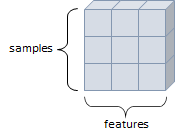

In [4]:
t2 = tf.constant([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
print(t2)
print(tf.rank(t2))

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


### 3D Tensor

* 큐브(cube)와 같은 모양으로 세개의 축이 존재
* **데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당**
* 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
* 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용 

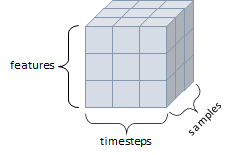

In [6]:
t3 = tf.constant([[[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]],
                  [[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]],
                  [[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]]])
print(t3)
print(tf.rank(t3))

tf.Tensor(
[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[1 2 3]
  [4 5 6]
  [7 8 9]]], shape=(3, 3, 3), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


### 4D Tensor

* 4개의 축
* **컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능)**
* 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

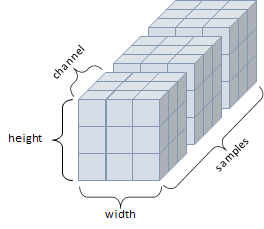

### 5D Tensor

* 5개의 축
* **비디오 데이터가 대표적인 사례**
* 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

## 텐서 데이터 타입

* 텐서의 기본 dtype
  - 정수형 텐서: `int32`
  - 실수형 텐서: `float32`
  - 문자열 텐서: `string`
* `int32`, `float32`,  `string` 타입 외에도 `float16`, `int8` 타입 등이 존재
* 연산시 텐서의 타입 일치 필요
* **타입변환에는 `tf.cast()` 사용**

```
<Note>
- !! 텐서 구성 : rank, shape, dtype
- !! 타입 변환 : tf.cast()
```

In [6]:
# int

i = tf.constant(2)
print(i)

tf.Tensor(2, shape=(), dtype=int32)


In [7]:
# float

f = tf.constant(2.)
print(f)

tf.Tensor(2.0, shape=(), dtype=float32)


In [8]:
# str

s = tf.constant("hong")
print(s)

tf.Tensor(b'hong', shape=(), dtype=string)


In [9]:
# float16 설정

f16 = tf.constant(2., dtype=tf.float16)
print(f16)

tf.Tensor(2.0, shape=(), dtype=float16)


In [10]:
# int8 설정

i8 = tf.constant(2, dtype=tf.int8)
print(i8)

tf.Tensor(2, shape=(), dtype=int8)


In [11]:
# float16 -> float32

f32 = tf.cast(f16, tf.float32)
print(f32)

tf.Tensor(2.0, shape=(), dtype=float32)


In [12]:
# int8 -> int32

i32 = tf.cast(i8, tf.int32)
print(i32)

tf.Tensor(2, shape=(), dtype=int32)


## 텐서 연산
- +, -, *, /
- add, substract, multiply, divide

In [13]:
print(tf.constant(2) + tf.constant(2))
print(tf.constant(2) - tf.constant(2))
print(tf.add(tf.constant(2), tf.constant(2)))
print(tf.subtract(tf.constant(2), tf.constant(2)))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [14]:
print(tf.constant(2) * tf.constant(2))
print(tf.constant(2) / tf.constant(2))
print(tf.multiply(tf.constant(2), tf.constant(2)))
print(tf.divide(tf.constant(2), tf.constant(2)))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1.0, shape=(), dtype=float64)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1.0, shape=(), dtype=float64)


### tensorflow에서는 연산하려면 같은 dtype이어야 한다.
- tf.cast()를 사용해서 dtype을 맞춰준다.

In [17]:
print(tf.constant(2) + tf.constant(2.2))

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:AddV2]

In [15]:
# tf.cast()를 사용해 dtype 맞춰주기

print(tf.cast(tf.constant(2), tf.float32) + tf.constant(2.2))

tf.Tensor(4.2, shape=(), dtype=float32)


# 4. 딥러닝 구조 및 학습

* 딥러닝 구조와 학습에 필요한 요소
  - 모델(네트워크)를 구성하는 **레이어(layer)**
  - 입력 데이터와 그에 대한 **목적(결과)** : output
  - 학습시에 사용할 피드백을 정의하는 **손실 함수(loss function)**
  - 학습 진행 방식을 결정하는 **옵티마이저(optimizer)**

## 4-1 레이어(Layer)

* 신경망의 핵심 데이터 구조
* 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈
* 상태가 없는 레이어도 있지만, 대부분 **가중치(weight)**라는 레이어 상태를 가짐
* 가중치는 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서

* Keras에서 사용되는 주요 레이어
  - Dense
  - Activation
  - Flatten
  - Input
```
<Note>
- from tensorflow.keras.layers 에서 불러올 수 있다.
```

In [16]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Input

### Dense

* 완전연결계층(Fully-Connected Layer)
* 노드수(유닛수), 활성화 함수(`activation`) 등을 지정
* `name`을 통한 레이어간 구분 가능
* 가중치 초기화(`kernel_initializer`) 인수
  - 신경망의 성능에 큰 영향을 주는 요소  
  - 보통 가중치의 초기값으로 0에 가까운 무작위 값 사용
  - 특정 구조의 신경망을 동일한 학습 데이터로 학습시키더라도, 가중치의 초기값에 따라 학습된 신경망의 성능 차이가 날 수 있음
  - 오차역전파 알고리즘은 기본적으로 경사하강법을 사용하기 때문에 최적해가 아닌 지역해에 빠질 가능성이 있음
  - `Keras에서는 기본적으로 Glorot uniform 가중치(Xavier 분포 초기화), zeros bias로 초기화`
  - `kernel_initializer` 인자를 통해 다른 가중치 초기화 지정 가능
  - Keras에서 제공하는 가중치 초기화 종류: https://keras.io/api/layers/initializers/

```
<Note>
- Dense의 kernel_initializer 종류 (weight initializer 가중치 초기화)
   - RandomUniform
   - RandomNormal
   - TruncateNormal
   - Zeros
   - Ones
   - GlorotNormal
   - HeUniform
   - HeNormal
   - Constant
   - ... 
```

In [17]:
Dense(units=10, activation="softmax")

In [18]:
Dense(units=10, activation="relu", name="Dense Layer")

In [19]:
Dense(units=10, kernel_initializer="he_normal", name="Dense Layer")

### Activation

- Dense layer에서 미리 활성화 함수를 지정할 수도 있지만 필요에 따라 별도 레이어를 만들어줄 수 있음
- Keras에서 제공하는 활성화 함수(activation function) 종류: https://keras.io/ko/activations/

```
<Note>
- w1x1 + w2x2 + ... + wnxn 의 선형회귀식의 값이 활성화함수에 들어오면 기준값에 따라서 값이 바뀐다.
- 활성화 함수가 sigmoid 이면, 선형회귀식의 값이 0.5보다 작으면 0, 0.5보다 크면 1이 된다.
```

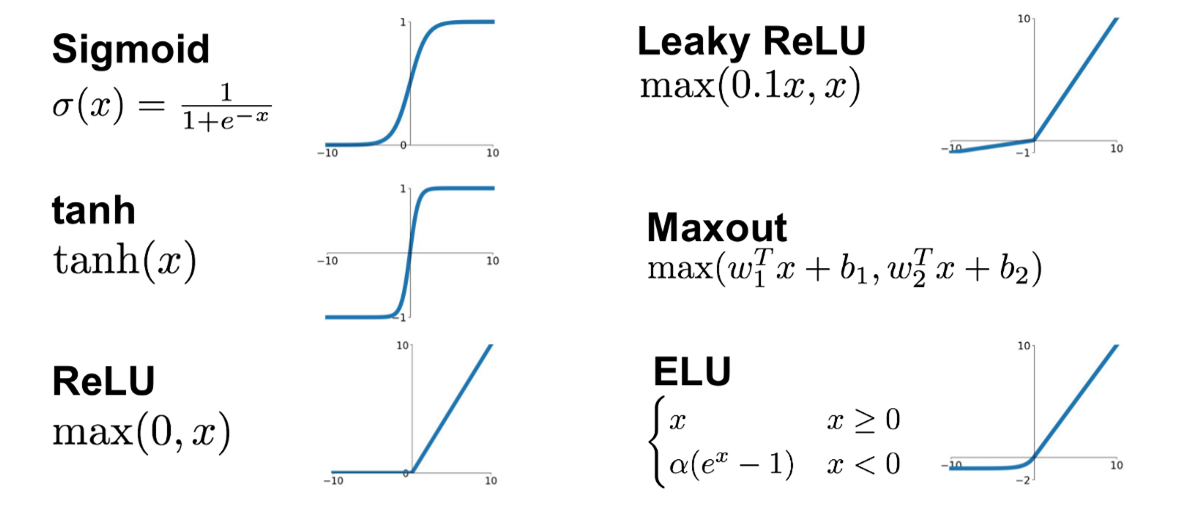

In [20]:
dense = Dense(units=10, activation="relu", name="Dense Layer")
Activation(dense)

### Flatten

- 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업
- 예시)
        (128, 3, 2, 2) -> (128, 12)
```
<Note>
- 여기에서 배치크기는 128, 이것만 놔두고 나머지 데이터를 1차원으로 만듦
```      

In [21]:
Flatten(input_shape=(128, 3, 2, 2))

### Input 

- 모델의 입력을 정의
- `shape`, `dtype`을 포함
- 하나의 모델은 여러 개의 입력을 가질 수 있음
- `summary()` 메소드를 통해서는 보이지 않음

In [22]:
Input(shape=(28, 28), dtype=tf.float32)

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_1')>

In [23]:
Input(shape=(8,), dtype=tf.int32)

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_2')>

## 4-2 모델(Model)

* 딥러닝 모델은 레이어로 만들어진 비순환 유향 그래프(Directed Acyclic Graph, DAG) 구조

```
<Note>
- DAG 형태?
```

### 모델 구성 방법

  - `Sequential()`
  - 서브클래싱(Subclassing)
  - 함수형 API

### Sequential()

- 모델이 순차적인 구조로 진행할 때 사용
- 간단한 방법
  - Sequential 객체 생성 후,`add()`를 이용한 방법
  - Sequential 인자에 한번에 추가 방법 : [Dense(), Dense() ...]
- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음


In [1]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model

In [2]:
model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Dense(units=300, activation="relu"))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 300)           8700      
                                                                 
 dense_1 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_2 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


#### plot_model() 을 위한 패키지 설치
- pip install pydot pydotplus grphviz 하면 실행이 안된다. (버전 충돌인듯)
- conda install -c conda-forge pydotplus 를 설치해야 실행된다.
   - pydotplus와 graphviz가 함께 설치 된다.

In [15]:
!conda list "^pydot|viz$"

# packages in environment at C:\DS\Anaconda3\envs\dev_env:
#
# Name                    Version                   Build  Channel
graphviz                  2.50.0               hdb8b0d4_0  
pydotplus                 2.0.2              pyhd8ed1ab_6    conda-forge
python-graphviz           0.20.3                   pypi_0    pypi


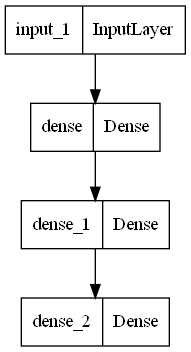

In [16]:
plot_model(model)

#### Sequential() 안에 []로 모델을 한번에 구성할 수 있다.

In [18]:
model = Sequential([
    Input(shape=(28, 28), name="Input"),
    Dense(300, activation="relu", name="Dense1"),
    Dense(100, activation="relu", name="Dense2"),
    Dense(10, activation="softmax", name="Output")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 28, 300)           8700      
                                                                 
 Dense2 (Dense)              (None, 28, 100)           30100     
                                                                 
 Output (Dense)              (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


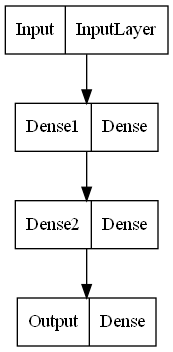

In [21]:
plot_model(model)

### 함수형 API

- `가장 권장되는 방법` (sequential 보다 권장됨)
- 모델을 복잡하고, 유연하게 구성 가능
- 다중 입출력을 다룰 수 있음

In [27]:
inputs = Input(shape=(28, 28, 1))
x = Flatten(input_shape=(28, 28, 1))(inputs)
x = Dense(300, activation="relu")(x)
x = Dense(100, activation="relu")(x)
x = Dense(10, activation="softmax")(x)

model = Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               235500    
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


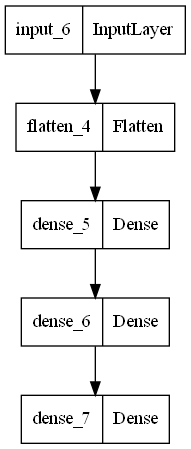

In [28]:
plot_model(model)

#### 함수형 API의 장점 : 복잡한 형태의 모델을 만들 수 있다.

In [29]:
from tensorflow.keras.layers import Concatenate

In [30]:
input_layer = Input(shape=(28, 28))
hidden1 = Dense(100, activation="relu")(input_layer)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

# input, output layer가 여러개면 []에 넣어서 설정할 수 있다.
model = Model(inputs=[input_layer], outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 28, 100)      2900        ['input_7[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 28, 30)       3030        ['dense_8[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 28, 58)       0           ['input_7[0][0]',                
                                                                  'dense_9[0][0]']          

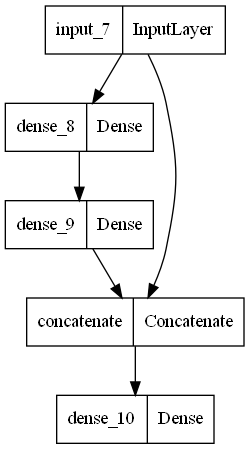

In [31]:
plot_model(model)

In [37]:
input_1 = Input(shape=(10, 10), name="input_1")
input_2 = Input(shape=(10, 28), name="input_2")

hidden_1 = Dense(100, activation="relu")(input_2)
hidden_2 = Dense(10, activation="relu")(hidden_1)
concat = Concatenate()([input_1, hidden_2])
output = Dense(1, activation="sigmoid", name="output")(concat)

model = Model(inputs=[input_1, input_2], outputs=[output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_17 (Dense)               (None, 10, 100)      2900        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_18 (Dense)               (None, 10, 10)       1010        ['dense_17[0][0]']               
                                                                                            

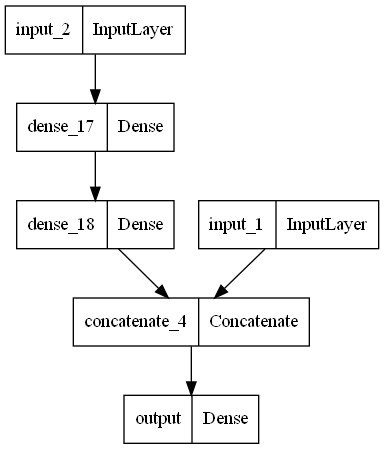

In [38]:
plot_model(model)

#### 출력이 2개 이상인 모델
- output과 sub_out

In [55]:
input_ = Input(shape=(10, 10), name="input")
hidden1 = Dense(100, activation="relu",)(input_)
hidden2 = Dense(10, activation="relu")(hidden1)
output = Dense(1, activation="sigmoid", name="main_output")(hidden2)
sub_out = Dense(1, name="sup_output")(hidden2)

model = Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_41 (Dense)               (None, 10, 100)      1100        ['input[0][0]']                  
                                                                                                  
 dense_42 (Dense)               (None, 10, 10)       1010        ['dense_41[0][0]']               
                                                                                                  
 main_output (Dense)            (None, 10, 1)        11          ['dense_42[0][0]']               
                                                                                            

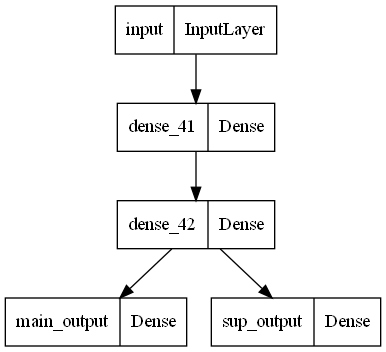

In [56]:
plot_model(model)

In [57]:
input_1 = Input(shape=(10, 10), name="input_1")

input_2 = Input(shape=(10, 28), name="input_2")
hidden_1 = Dense(units=100, activation="relu")(input_2)
hidden_2 = Dense(units=10, activation="relu")(hidden_1)

concat = Concatenate()([input_1, hidden_2])
output = Dense(1, activation="sigmoid", name="main_output")(concat)
sub_out = Dense(1, name="sum_output")(hidden_2)

model = Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_43 (Dense)               (None, 10, 100)      2900        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_44 (Dense)               (None, 10, 10)       1010        ['dense_43[0][0]']               
                                                                                            

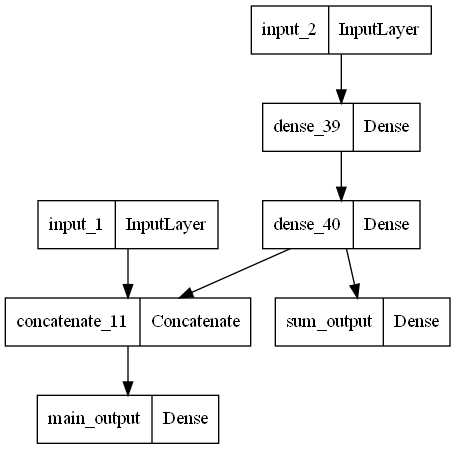

In [54]:
plot_model(model)

#### 함수형 API 방법 테스트
- 좀 더 복잡한 형태의 모델 구성

In [65]:
input_1 = Input(shape=(10, 10), name="input_1")
input_2 = Input(shape=(10, 10), name="input_2")
input_3 = Input(shape=(10, 10), name="input_3")

hidden_1 = Dense(units=300, activation="relu", name="hidden_1")(input_1)
hidden_2 = Dense(units=200, activation="relu", name="hidden_2")(hidden_1)
hidden_3 = Dense(units=100, activation="relu", name="hidden_3")(hidden_2)

hidden_4 = Dense(units=300, activation="sigmoid", name="hidden_4")(input_2)
hidden_5 = Dense(units=10, activation="sigmoid", name="hidden_5")(hidden_4)

hidden_6 = Dense(units=200, activation="sigmoid", name="hidden_6")(input_3)
hidden_7 = Dense(units=10, activation="sigmoid", name="hidden_7")(hidden_6)

concat_1 = Concatenate()([hidden_3, hidden_5, hidden_7])
concat_2 = Concatenate()([hidden_5, hidden_7])
main_output = Dense(1, activation="softmax", name="main_output")(concat_1)
sub_output_1 = Dense(1, activation="softmax", name="sub_output_1")(concat_2)
sub_output_2 = Dense(1, activation="softmax", name="sub_output_2")(hidden_7)

model = Model(inputs=[input_1, input_2, input_3], 
              outputs=[main_output, sub_output_1, sub_output_2])
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 hidden_1 (Dense)               (None, 10, 300)      3300        ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                           

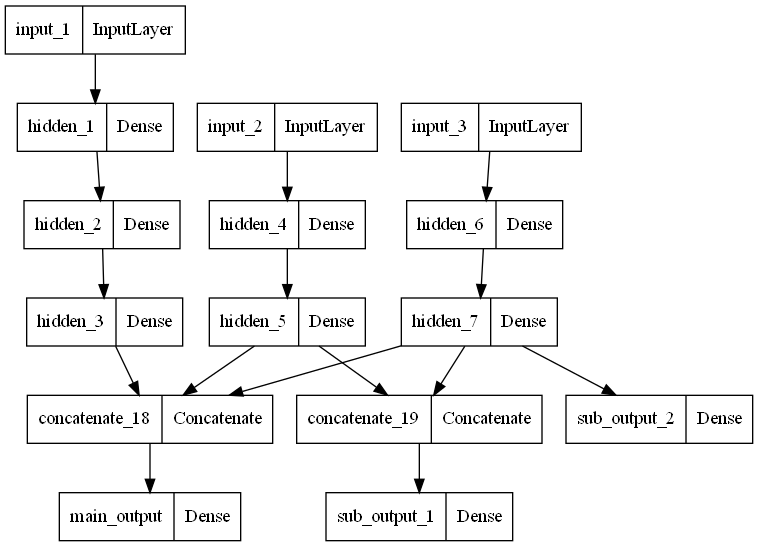

In [66]:
plot_model(model)

### 서브클래싱(Subclassing) 방법

- 커스터마이징에 최적화된 방법
- Model 클래스를 상속받아 Model이 포함하는 기능을 사용할 수 있음  
  - `fit()`, `evaluate()`, `predict()`
  - `save()`, `load()`
- 주로 `call()` 메소드안에서 원하는 계산 가능
  - for, if, 저수준 연산 등
- 권장되는 방법은 아니지만 어떤 모델의 구현 코드를 참고할 때, 해석할 수 있어야함

In [67]:
class MyModel(Model) : 
    
    def __init__(self, units=30, activation="relu", **kwargs) : 
        super(Mymodel, self).__init__(**kwargs)
        self.dense_layer_1 = Dense(200, activation=activation)
        self.dense_layer_2 = Dense(100, activation=activation)
        self.dense_layer_3 = Dense(units, activation=activation)
        self.output_layer = Dense(10, activation="softmax")
        
    def call(self, inputs) : 
        x = self.dense_layer_1(inputs)
        x = self.dense_layer_2(x)
        x = self.dense_layer_3(x)
        x = self.ouput_layer(x)
        
        return x               

### 모델 가중치 확인

In [69]:
inputs = Input(shape=(28, 28, 1))
x = Flatten(input_shape=(28, 28, 1))(inputs)
x = Dense(300, activation="relu")(x)
x = Dense(100, activation="relu")(x)
x = Dense(10, activation="softmax")(x)

model = Model(inputs=inputs, outputs=x)
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 300)               235500    
                                                                 
 dense_49 (Dense)            (None, 100)               30100     
                                                                 
 dense_50 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### 모델에 정의한 layer 개별 확인

In [70]:
model.layers

In [71]:
hidden_2 = model.layers[2]
hidden_2.name

'dense_48'

In [72]:
model.get_layer("dense_48") is hidden_2

True

### layer안에 weights와 biases 확인

In [74]:
weights, biases = hidden_2.get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [75]:
print(weights)

[[ 0.04179776 -0.0088106   0.02045586 ... -0.05381848  0.00697179
  -0.02998013]
 [ 0.0354273   0.06983091  0.04680351 ...  0.01911084  0.05172519
   0.04360573]
 [ 0.04231929  0.02069307 -0.02901379 ...  0.00236864 -0.0069164
  -0.02177804]
 ...
 [-0.05540472 -0.06020863 -0.06376556 ...  0.03672101 -0.04714007
  -0.07097697]
 [-0.06348069  0.01539847  0.03159577 ...  0.04344016  0.0526578
   0.05727287]
 [ 0.05361553  0.06776237 -0.07018202 ... -0.05080563  0.0075053
   0.02312548]]


In [76]:
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 4-3 모델 컴파일(compile)

- 모델을 구성한 후, 사용할 손실 함수(loss function), 옵티마이저(optimizer)를 지정

In [78]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

### 손실 함수(Loss Function)

* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* Keras에서 주요 손실 함수 제공
  - `sparse_categorical_crossentropy`: 클래스가 배타적 방식으로 구분, 즉 (0, 1, 2, ..., 9)와 같은 방식으로 구분되어 있을 때 사용
  - `categorical_cross_entropy`: 클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용
  - `binary_crossentropy`: 이진 분류를 수행할 때 사용

```
<Note>
- 손실함수 값에 따라서 파라미터를 조정해야한다. 그만큼 중요하다.
```

### 평균절대오차(Mean Absolute Error, MAE)

* 오차가 커져도 손실함수가 일정하게 증가
* 이상치(Outlier)에 강건함(Robust)
  -  데이터에서 [입력 - 정답] 관계가 적절하지 않은 것이 있을 경우에, 좋은 추정을 하더라도 오차가 발생하는 경우가 발생
  - 해당 이상치에 해당하는 지점에서 손실 함수의 최소값으로 가는 정도의 영향력이 크지 않음
* 회귀 (Regression)에 많이 사용
* 평균절대오차 식:
$ \qquad \qquad E = \frac{1}{n}\sum_{i=1}^n \left | y_i - \tilde{y}_i \right |$
  - $y_i$ : 학습 데이터의 $i\ $번째 정답
  - $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력

![](https://miro.medium.com/max/1152/1*8BQhdKu1nk-tAAbOR17qGg.png)
<br />

### 평균제곱오차(Mean Squared Error, MSE)

* 가장 많이 쓰이는 손실 함수 중 하나
* 오차가 커질수록 손실함수가 빠르게 증가
  - `정답과 예측한 값의 차이가 클수록 더 많은 페널티를 부여`
* 회귀 (Regression)에 쓰임
* 평균제곱오차 식: $ \qquad \qquad E = \frac{1}{n}\sum_{i=1}^n ( y_i - \tilde{y}_i)^2 $
  - $y_i$ : 학습 데이터의 $i\ $번째 정답
  - $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력

![](https://miro.medium.com/max/1152/1*EqTaoCB1NmJnsRYEezSACA.png)
<br />


### 손실함수 MAE와 MSE 비교
```
<Note>
- MAE의 경우 최소값 부근에서 추정값이 튈 수 있다.

```
![](https://miro.medium.com/max/1400/1*JTC4ReFwSeAt3kvTLq1YoA.png)
<br />

### 원-핫 인코딩(One-Hot Encoding)

- 범주형 변수를 표현할 때 사용
- 가변수(Dummy Variable)이라고도 함
- 정답인 레이블을 제외하고 0으로 처리

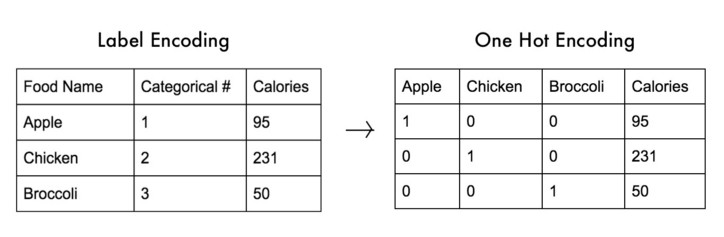

### 교차 엔트로피 오차(Cross Entropy Error, CEE)

* 이진 분류(Binary Classification), 다중 클래스 분류(Multi Class Classification)
* 소프트맥스(softmax)와 원-핫 인코딩(ont-hot encoding) 사이의 출력 간 거리를 비교
* 정답인 클래스에 대해서만 오차를 계산
* 정답을 맞추면 오차가 0, 틀리면 그 차이가 클수록 오차가 무한히 커짐
* $y = log(x)$
  - $x$가 1에 가까울수록 0에 가까워짐
  - $x$가 0에 가까울수록 $y$값은 무한히 커짐


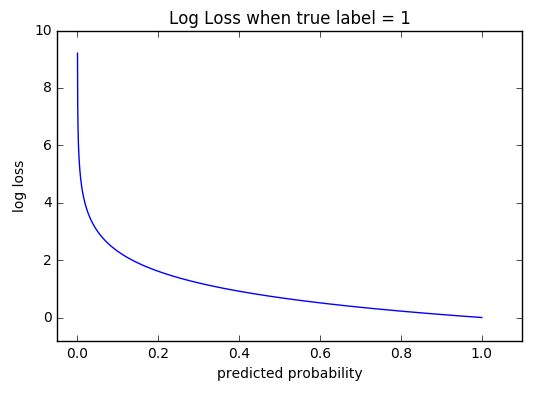

* 교차 엔트로피 오차 식: $ \qquad \qquad E = - \frac{1}{N}\sum_{n} \sum_{i}  y_i\ log\tilde{y}_i  $ 
  - $y_i$ : 학습 데이터의 $i\ $번째 정답 (원-핫 인코딩, one-hot encoding)
  - $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력
  - $N$ : 전체 데이터의 개수
  - $i$ : 데이터 하나당 클래스 개수

* 정답 레이블($y_i$)은 원-핫 인코딩으로 정답인 인덱스에만 1이고, 나머지는 모두 0이라서 다음과 같이 나타낼 수 있음

 $ \qquad \qquad E = - log\tilde{y}_i  $

  - 소프트맥스를 통해 나온 신경망 출력이 0.6이라면 $\ -log0.6 \fallingdotseq -0.51\ $이 되고, 신경망 출력이 0.3이라면  $\ -log0.3 \fallingdotseq -1.2\ $이 됨
  - 정답에 가까워질수록 오차값은 작아짐
  - 학습시, 원-핫 인코딩에 의해 정답 인덱스만 살아 남아 비교하지만, 정답이 아닌 인덱스들도 학습에 영향을 미침. 왜냐하면 다중 클래스 분류는 소프트맥스(softmax) 함수를 통해 전체 항들을 모두 다루기 때문

### 이진 분류 문제의 교차 크로스 엔트로피(Binary Cross Entropy, BCE)

* 이진 분류 문제(Binary Classification Problem)에서도 크로스 엔트로피 오차를 손실함수로 사용 가능
$ \qquad \qquad E = - \sum_{i=1}^2  y_i\ log\tilde{y}_i \\ 
\qquad \qquad \ \ \ = -y_1\ log\ \tilde{y}_1 - (1 - y_1)log(1-\ \tilde{y}_1) $  
$\qquad \qquad \qquad ( \because y_2 = 1 - y_1)$
  - $y_i$ : 학습 데이터의 $i\ $번째 정답 (원-핫 인코딩, one-hot encoding)
  - $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력

* 2개의 클래스를 분류하는 문제에서 1번이 정답일 확률이 0.8이고, 실제로 정답이 맞다면 다음과 같이 나타낼 수 있음

### $ \qquad \qquad E = -y_1\ log\ \tilde{y}_1 - (1 - y_1)\ log\ (1-\ \tilde{y}_1) \\
\qquad \qquad \ \ \ = -1\ log\ 0.8 - (1 - 1)\ log\ (1 - 0.8)\\ 
\qquad \qquad \ \ \ = -log\ 0.8 \\
\qquad \qquad \ \ \ \fallingdotseq -0.22
$

* 반대로, 실제로 정답이 2번이었다면, 식은 다음과 같이 나타낼 수 있음

### $ \qquad \qquad E = -y_1\ log\ \tilde{y}_1 - (1 - y_1)\ log\ (1-\ \tilde{y}_1) \\
\qquad \qquad \ \ \ = -0\ log\ 0.8 - (1 - 0)\ log\ (1 - 0.8)\\ 
\qquad \qquad \ \ \ = -log\ 0.2 \\
\qquad \qquad \ \ \ \fallingdotseq -1.61
$  



### 옵티마이저(Optimizer)

* 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
   - 손실함수 : MAE, MSE, CEE
* Keras에서 여러 옵티마이저 제공
  - `keras.optimizer.SGD()`: 기본적인 확률적 경사 하강법
  - `keras.optimizer.Adam()`: 자주 사용되는 옵티마이저
  - Keras에서 사용되는 옵티마이저 종류: https://keras.io/ko/optimizers/
* `보통 옵티마이저의 튜닝을 위해 따로 객체를 생성하여 컴파일`    


##### 볼록함수(Convex Function)와 비볼록함수(Non-Convex Function)

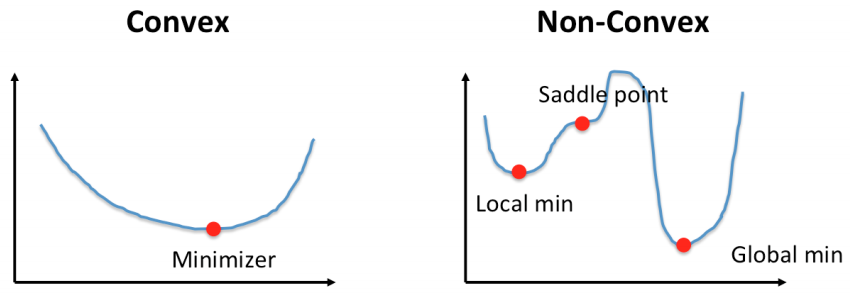

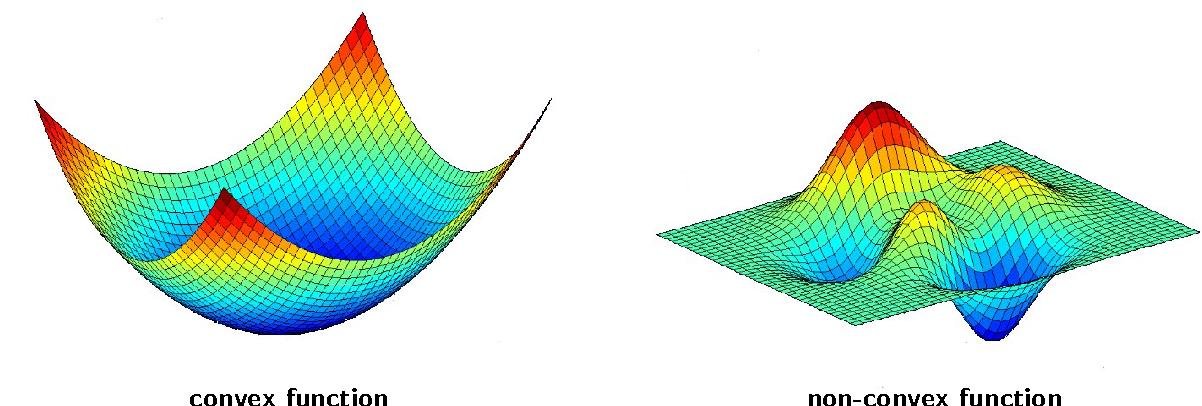

* 볼록함수(Convex Function)
  - 어떤 지점에서 시작하더라도 최적값(손실함수가 최소로하는 점)에 도달할 수 있음
* 비볼록함수(Non-Convex Function)
  - 비볼록 함수는 시작점 위치에 따라 다른 최적값에 도달할 수 있음

```
<Note>
- 손실함수의 두 가지 형태, 어떤 것이냐에 따라서 최저값에 도달할 수 있는지 여부
- non-convex의 경우 움직이지 못하는 saddle point도 있음
```

##### 경사하강법(Gradient Decent)

* 미분과 기울기
  - 스칼라를 벡터로 미분한 것
  - f(x)에 델타x 만큼 더한 값과 f(x)의 차이를 미분

## $\quad \frac{df(x)}{dx} = \lim_{\triangle x \to 0} \frac{f(x+\triangle x) - f(x)}{\triangle x}$

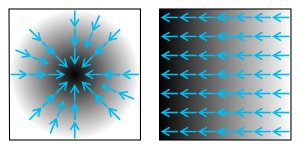

 $\quad \triangledown f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2},\ ... \ , \frac{\partial f}{\partial x_N} \right)$
  - 변화가 있는 지점에서는 미분값이 존재하고, 변화가 없는 지점은 미분값이 0
  - 미분값이 클수록 변화량이 크다는 의미


* 경사하강법의 과정
   - 경사하강법은 한 스텝마다의 미분값에 따라 이동하는 방향을 결정
   - $f(x)$의 값이 변하지 않을 때까지 반복
  
  $\qquad x_n = x_{n-1} - \eta \frac{\partial f}{\partial x}$
    - $\eta$ : 학습률(learning rate)
- 즉, **미분값이 0인 지점**을 찾는 방법 = 경사하강법
   - 손실함수의 미분값이 0인 지접 = 최소값

<img src="https://thumbs.gfycat.com/AngryInconsequentialDiplodocus-size_restricted.gif">

##### 학습률(learning rate)

- 적절한 학습률을 지정해야 최저점에 잘 도달할 수 있음
- 학습률이 너무 크면 발산하고, 너무 작으면 학습이 오래 걸리거나 최저점에 도달하지 않음

```
<Note>
- 옵티마이저의 학습률이 적당한지 확인하기 위해서 epoch와 loss 그래프를 확인하면 된다.
- epoch가 커질 수록 loss 값이 원만하게 줄어 들어야 좋은 학습률이라고 할 수 있다.
```

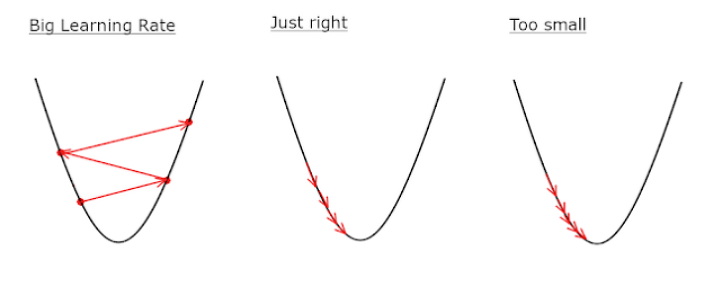

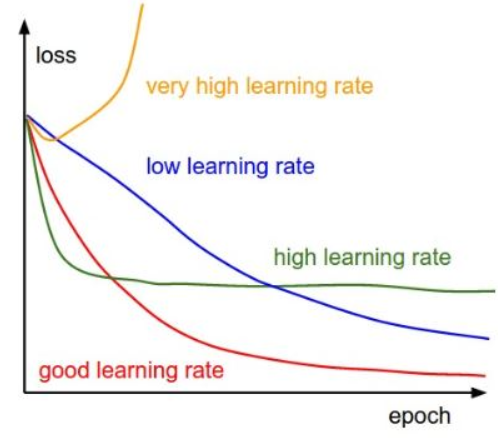

##### 안장점(Saddle Point)

- 기울기가 0이지만 극값이 되지 않음
- 경사하강법은 안장점에서 벗어나지 못함

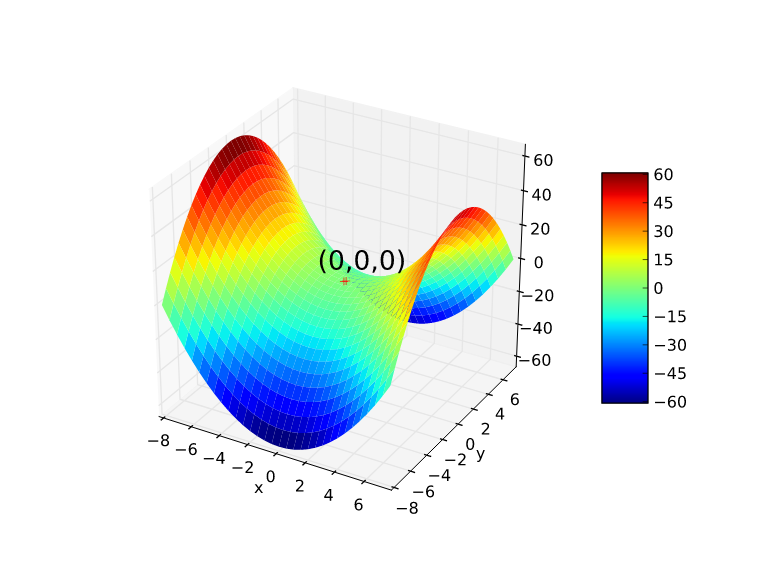

### 지표(Metrics)

- 모니터링할 지표
- `mae`나 `accuracy` 사용
- 줄여서 `acc`로도 사용 가능
- Keras에서 사용되는 지표 종류: https://keras.io/ko/metrics/

## 4-4. 모델 학습, 평가 및 예측

- `fit()`
  - `x`: 학습 데이터
  - `y`: 학습 데이터 정답 레이블
  - `epochs`: 학습 회수
  - `batch_size`: 단일 배치에 있는 학습 데이터의 크기
  - `validation_data`: 검증을 위한 데이터
- `evaluate()`
  - 테스트 데이터를 이용한 평가
- `predict()`
  - 임의의 데이터를 사용해 예측

#### 오차역전파 (Backpropagation)

* 오차역전파 알고리즘
  - 학습 데이터로 정방향(forward) 연산을 통해 손실함수 값(loss)을 구함
  - 각 layer별로 역전파학습을 위해 중간값을 저장
  - 손실함수를 학습 파라미터(가중치, 편향)로 미분하여 마지막 layer로부터 앞으로 하나씩 연쇄법칙을 이용하여 미분
  - 각 layer를 통과할 때마다 저장된 값을 이용
  - 오류(error)를 전달하면서 학습 파라미터를 조금씩 갱신

* 오차역전파 학습의 특징
  - 손실함수를 통한 평가를 한 번만 하고, 연쇄법칙을 이용한 미분을 활용하기 때문에 학습 소요시간이 매우 단축
  - 미분을 위한 중간값을 모두 저장하기 때문에 메모리를 많이 사용

* `신경망 학습에 있어서 미분가능의 중요성`
  - 경사하강법(Gradient Descent)에서 손실 함수(cost function)의 최소값, 즉, 최적값을 찾기 위한 방법으로 미분을 활용
  - 미분을 통해 손실 함수의 학습 매개변수(trainable parameter)를 갱신하여 모델의 가중치의 최적값을 찾는 과정

![](https://i.pinimg.com/originals/5d/13/20/5d1320c7b672710834e63b95a7c1037b.png)


* 합성함수의 미분 (연쇄법칙, chain rule)

  $\qquad \frac{d}{dx} [f(g(x))] = f^\prime(g(x))g^\prime(x)$  
 
  - 여러개를 연속으로 사용 가능

  $ \quad \frac{\partial f}{\partial x} = \frac{\partial f}{\partial u} \times \frac{\partial u}{\partial m} \times \frac{\partial m}{\partial n} \times \ ... \ \frac{\partial l}{\partial k} \times \frac{\partial k}{\partial g} \times \frac{\partial g}{\partial x} 
  $

  - 각각에 대해 편미분 적용가능

![](https://cdn-media-1.freecodecamp.org/images/1*_KMMFvRP5X9kC59brI0ykw.png)

* 오차역전파의 직관적 이해
  - 학습을 진행하면서, 즉 손실함수의 최소값(minimum)을 찾아가는 과정에서 가중치 또는 편향의 변화에 따라 얼마나 영향을 받는지 알 수 있음



# 5. MNIST 딥러닝 모델 예제

- 손으로 쓴 숫자들로 이루어진 이미지 데이터셋
- 기계 학습 분야의 트레이닝 및 테스트에 널리 사용되는 데이터
- keras.datasets에 기본으로 포함되어 있는 데이터셋

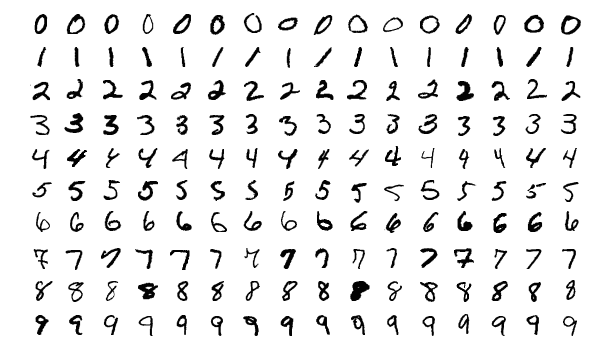

### 모듈 임포트

In [83]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#plt.style.use("seaborn-white")

### 데이터 로드 및 전처리

- MNIST 데이터셋을 로드
- Train Data 중, 30%를 검증 데이터(validation data)로 사용


In [84]:
tf.random.set_seed(111)

# train, test로 나누고
# train에서 검증용 데이터를 나눈다.

(x_train_full, y_train_full), (x_test, y_test) = load_data(path="mnist.npz")

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                 test_size=0.3,
                                                 random_state=111)

In [85]:
num_x_train = (x_train.shape[0])
num_x_val = (x_val.shape[0])
num_x_test = (x_test.shape[0])

print("학습 데이터 : {}\t레이블 : {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터 : {}\t레이블 : {}".format(x_train.shape, y_train.shape))
print("검증 데이터 : {}\t레이블 : {}".format(x_val.shape, y_val.shape))
print("테스트 데이터 : {}\t레이블 : {}".format(x_test.shape, y_test.shape))

학습 데이터 : (60000, 28, 28)	레이블 : (60000,)
학습 데이터 : (42000, 28, 28)	레이블 : (42000,)
검증 데이터 : (18000, 28, 28)	레이블 : (18000,)
테스트 데이터 : (10000, 28, 28)	레이블 : (10000,)


### 손글씨 데이터 확인

In [88]:
%matplotlib inline

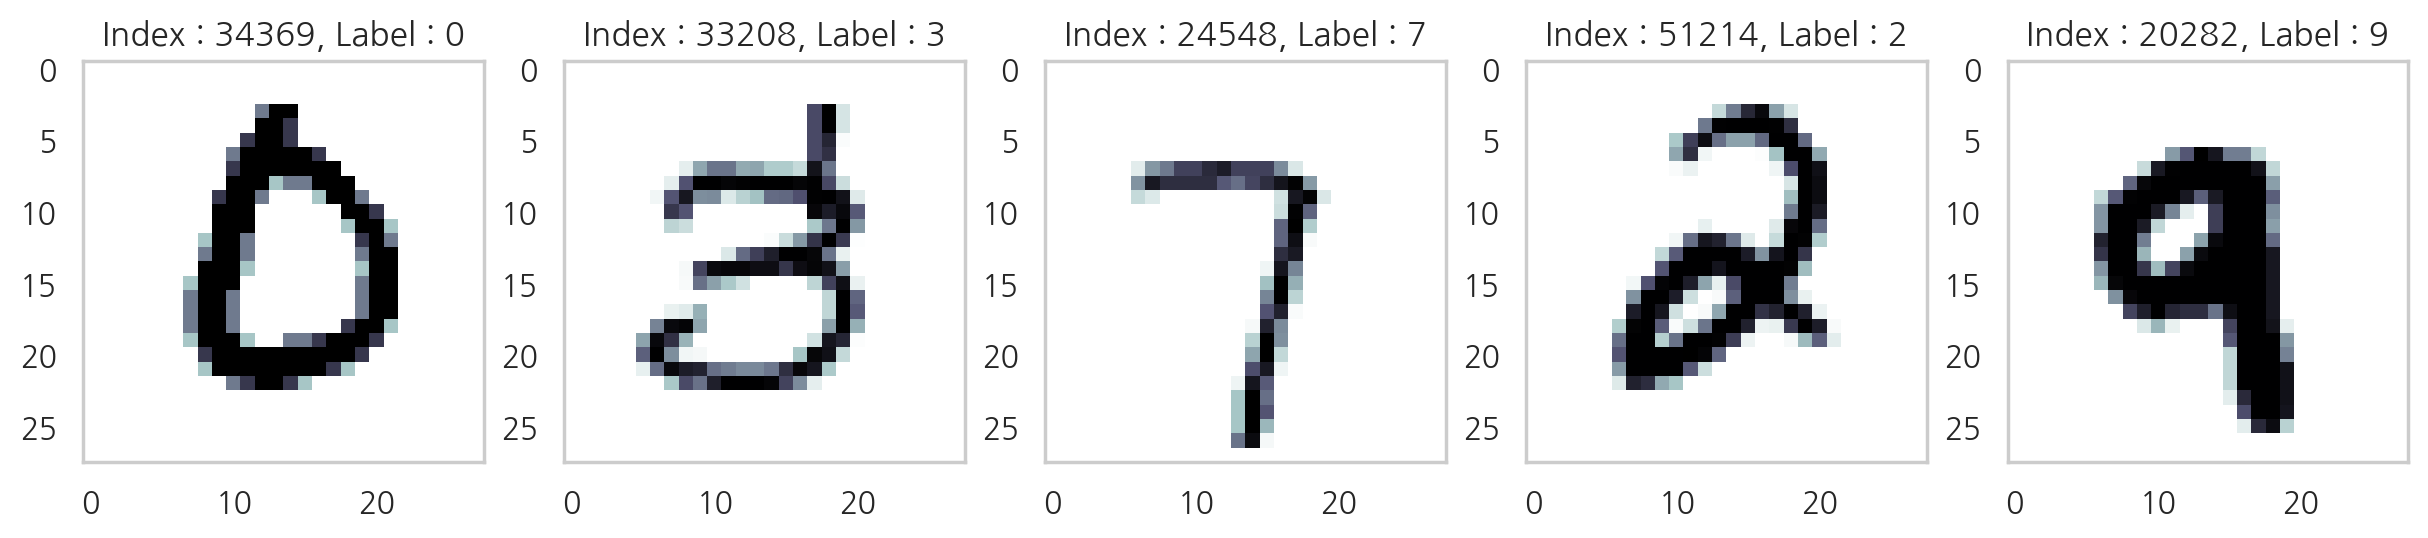

In [91]:
num_samples = 5
random_idx = np.random.randint(60000, size=num_samples)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_idx) : 
    img = x_train_full[idx, :]
    label = y_train_full[idx]
    
    plt.subplot(1, len(random_idx), i + 1)
    plt.imshow(img, cmap=mpl.cm.bone_r)
    plt.grid(False)
    plt.title("Index : {}, Label : {}".format(idx, label))

### 0~1 사이의 값으로 정규화 (normalization)
- 정규화를 해줘야 학습이 잘 된다.

In [92]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [95]:
x_train[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 모델 구성(Sequential)

In [99]:
model = Sequential([Input(shape=(28, 28), name="input"),
                   Flatten(input_shape=[28, 28], name="flatten"),
                   Dense(100, activation="relu", name="dense1"),
                   Dense(64, activation="relu", name="dense2"),
                   Dense(32, activation="relu", name="dense3"),
                   Dense(10, activation="softmax", name="output")
                   ])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


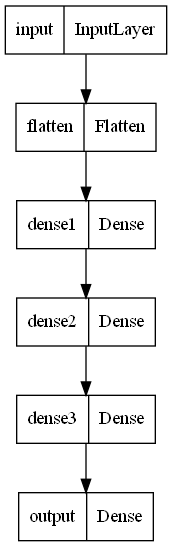

In [100]:
plot_model(model)

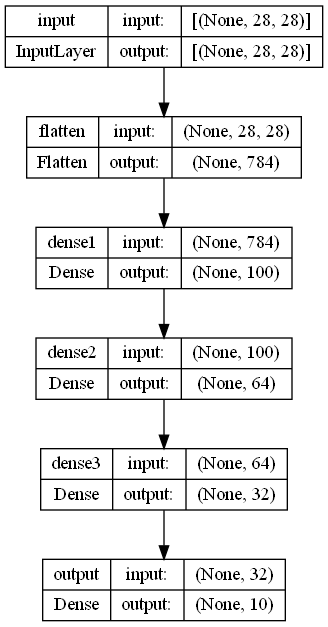

In [102]:
plot_model(model, show_shapes=True)

### 모델 컴파일 및 학습
- optimizer="sgd" 는 기본적인 최적화 방법
- loss="categorical_crossentropy" 는 클래스(라벨)를 원한인코딩을 적용하여 받아들인다.

In [103]:
model.compile(loss="categorical_crossentropy",
             optimizer="sgd",
             metrics="accuracy")

In [104]:
history = model.fit(x_train, y_train,
                   epochs=50,
                   batch_size=128,
                   validation_data=(x_val, y_val))

Epoch 1/50
329/329 [==============================] - 3s 6ms/step - loss: 1.6691 - accuracy: 0.5120 - val_loss: 0.9344 - val_accuracy: 0.7668
Epoch 2/50
329/329 [==============================] - 1s 3ms/step - loss: 0.6700 - accuracy: 0.8256 - val_loss: 0.5316 - val_accuracy: 0.8518
Epoch 3/50
329/329 [==============================] - 1s 4ms/step - loss: 0.4651 - accuracy: 0.8709 - val_loss: 0.4223 - val_accuracy: 0.8818
Epoch 4/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3908 - accuracy: 0.8899 - val_loss: 0.3702 - val_accuracy: 0.8952
Epoch 5/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3497 - accuracy: 0.9002 - val_loss: 0.3386 - val_accuracy: 0.9038
Epoch 6/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3221 - accuracy: 0.9072 - val_loss: 0.3260 - val_accuracy: 0.9068
Epoch 7/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3014 - accuracy: 0.9129 - val_loss: 0.3106 - val_accuracy: 0.9108
Epoch 

In [105]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Epoch와 Loss, Accuracy 값의 변화 시각화
- Loss 값이 대체로 epoch가 진행 될 수록 작아지는 것을 볼 수 있다.
- Accuracy 값이 대체로 epoch가 진행 될 수록 커지는 것을 볼 수 있다.
- Accuracy 그래프에서 train data set에 대한 값보다 validation data set에 대한 값이 더 작은 것으로 보인다.
   - 모델이 과대적합이 되었다는 것으로 볼 수 있지만 train, val acc 차이가 크지 않으므로 문제가 되지는 않는다.

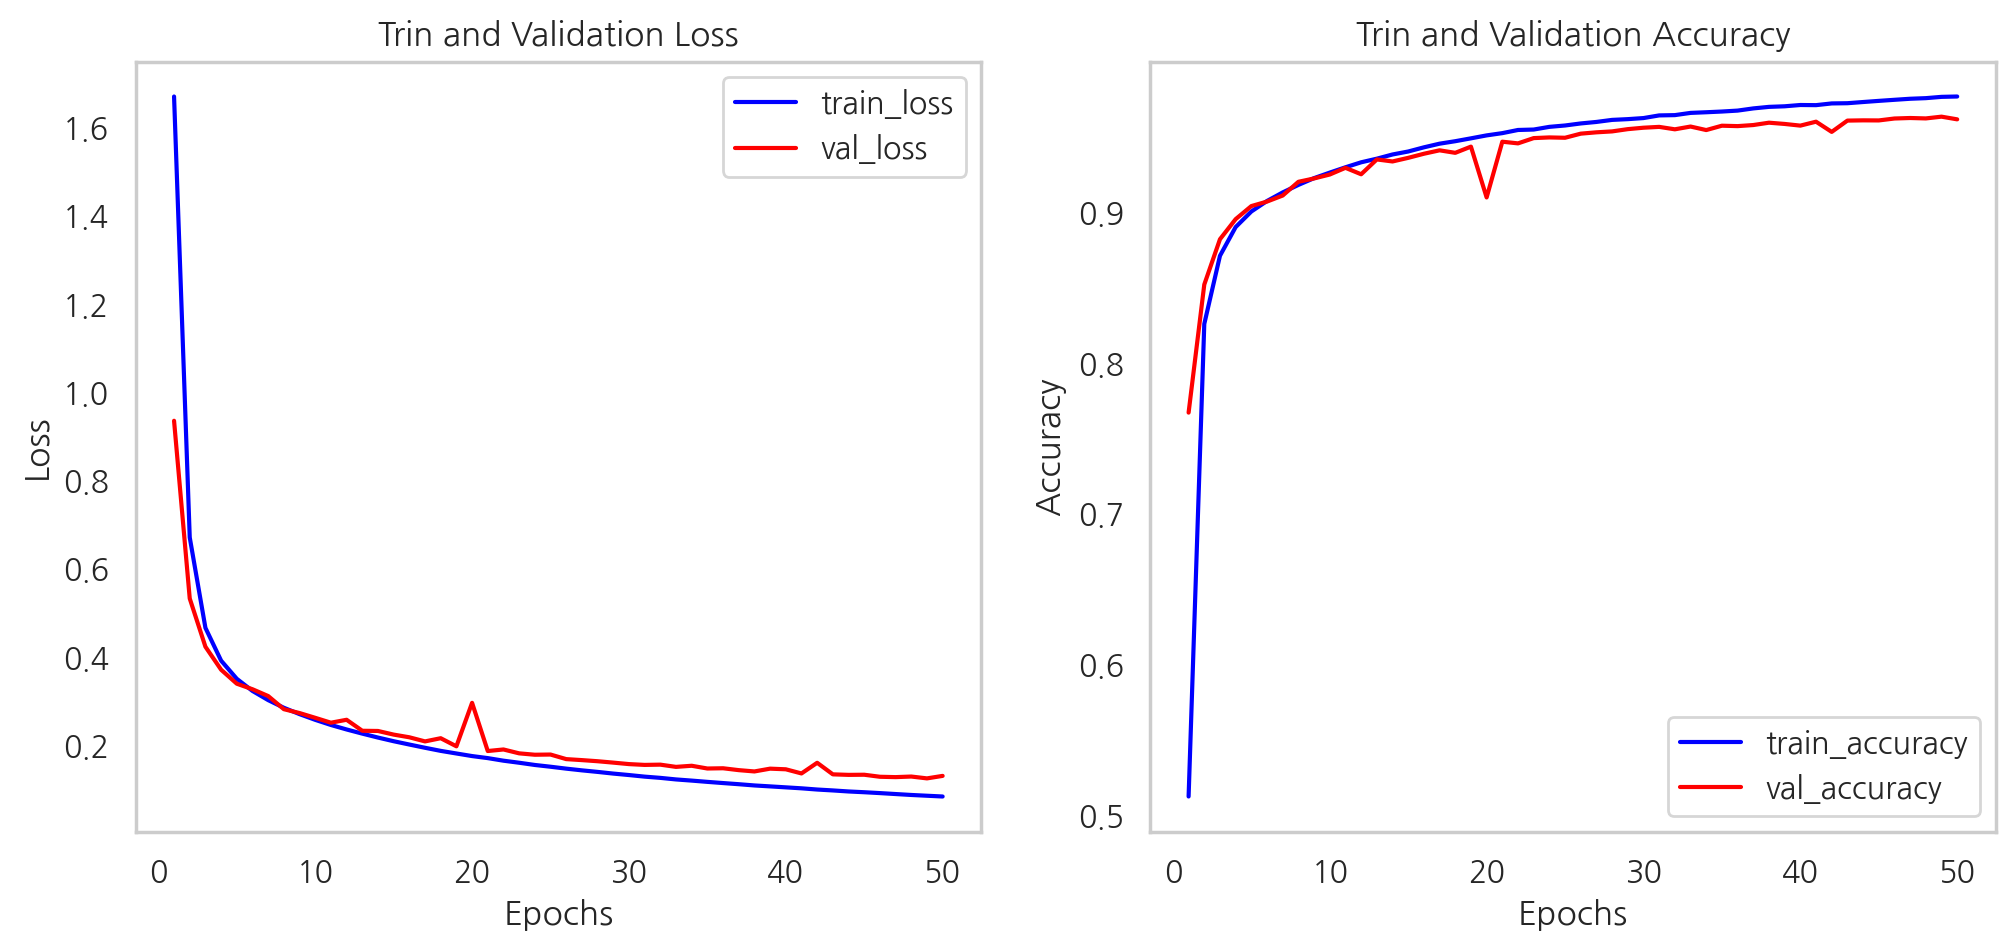

In [108]:
history_dict = history.history

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color="blue", label="train_loss")
ax1.plot(epochs, val_loss, color="red", label="val_loss")
ax1.set_title("Trin and Validation Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.grid()
ax1.legend()

accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color="blue", label="train_accuracy")
ax2.plot(epochs, val_accuracy, color="red", label="val_accuracy")
ax2.set_title("Trin and Validation Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [109]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1257 - accuracy: 0.9641


[0.12570172548294067, 0.9641000032424927]

In [111]:
pred_y = model.predict(x_test)
print(pred_y.shape)

# 소숫점 아래 몇 자리까지 print 할지 설정
np.set_printoptions(precision=7)
print(pred_y[0])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[8.3382429e-07 2.7648109e-06 5.9598646e-05 1.9538922e-04 1.4914438e-08
 7.1520994e-06 1.6590890e-07 9.9972427e-01 1.2593518e-06 8.6763694e-06]


#### 실제 데이터 이미지와 예측한 숫자의 비교

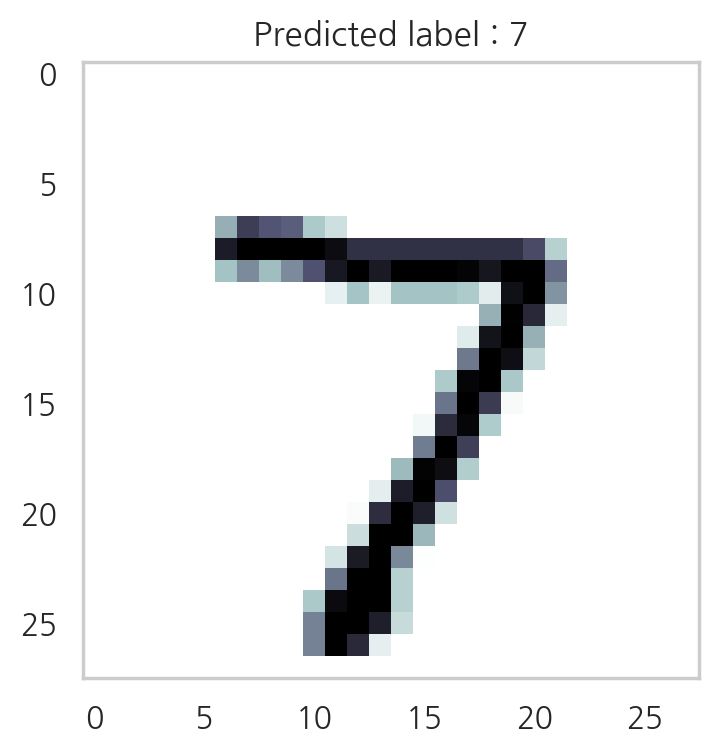

In [115]:
arg_pred_y = np.argmax(pred_y, axis=1)

plt.imshow(x_test[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.title("Predicted label : {}".format(arg_pred_y[0])) ;

### 혼동 행렬 (Confusion Matrix)의 시각화

In [118]:
test = [1, 2, 5, 3, 7]
np.argmax(test)

4

In [121]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [120]:
np.argmax(y_test, axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [122]:
np.argmax(pred_y, axis=-1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

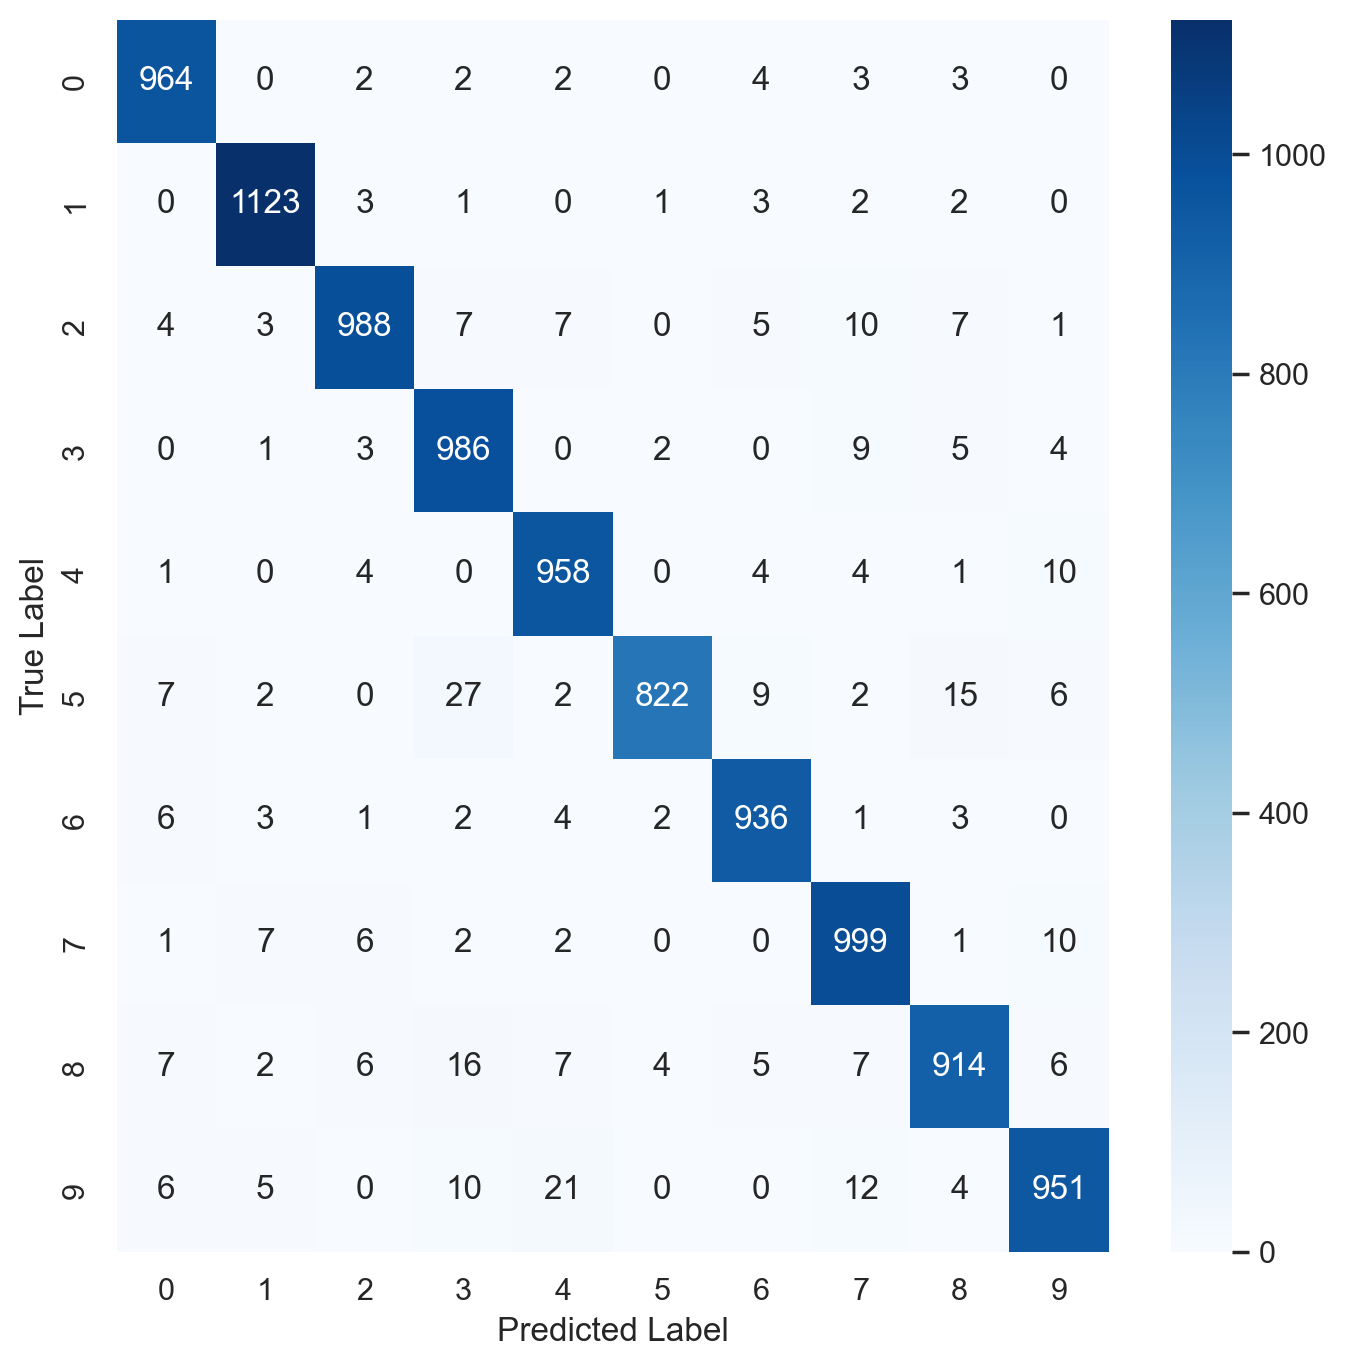

In [117]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style="white")

plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_y, axis=-1))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() ; 

### 분류 보고서

In [123]:
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_y, axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.94      0.98      0.96      1010
           4       0.96      0.98      0.97       982
           5       0.99      0.92      0.95       892
           6       0.97      0.98      0.97       958
           7       0.95      0.97      0.96      1028
           8       0.96      0.94      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



# 6. 모델 저장과 복원

- `save()`
- `load_model()`
- Sequencial API, 함수형 API에서는 모델의 저장 및 로드가 가능하지만 서브클래싱 방식으로는 할 수 없음
- 서브클래싱 방식은 `save_weights()`와 `load_weights()`를 이용해 모델의 파라미터만 저장 및 로드

- JSON 형식
  - `model.to_json()` (저장)
  - `tf.keras.models.model_from_json(file_path)` (복원)

- YAML로 직렬화
  - `model.to_yaml()` (저장)
  - `tf.keras.models.model_from_yaml(file_path)` (복원)


```
<Note>
- 기본적인 keras model 저장 형식 
   - HDF5 : 아키텍쳐, 가중치값, compile 정보를 포함한다. 
   - model.save("model_name.h5")
```

In [124]:
# HDF5 형식으로 모델 저장

model.save("mnist_model.h5")

In [125]:
# 저장한 모델 불러오기

loaded_model = models.load_model("mnist_model.h5")
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [127]:
pred_y_2 = loaded_model.predict(x_test)

print(pred_y_2.shape)

np.set_printoptions(precision=7)
print(pred_y_2[0])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[8.3382429e-07 2.7648109e-06 5.9598646e-05 1.9538922e-04 1.4914438e-08
 7.1520994e-06 1.6590890e-07 9.9972427e-01 1.2593518e-06 8.6763694e-06]


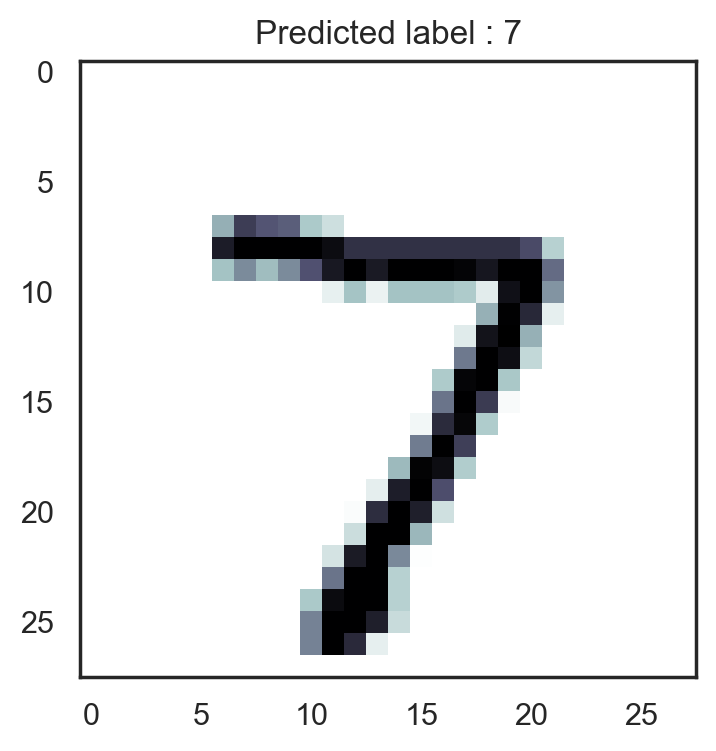

In [129]:
arg_pred_y_2 = np.argmax(pred_y_2, axis=1)

plt.imshow(x_test[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.title("Predicted label : {}".format(arg_pred_y_2[0])) ;

# 7. 콜백 (Callbacks)

- `fit()` 함수의 callbacks 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있음
- 여러 개 사용 가능
- ModelCheckpoint
  - `tf.keras.callbacks.ModelCheckpoint`
  - 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용
- EarlyStopping
  - `tf.keras.callbacks.EarlyStopping`
  - 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용
- LearningRateSchduler
  - `tf.keras.callbacks.LearningRateSchduler`
  - 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용
- TensorBoard
  - `tf.keras.callbacks.TensorBoard`
  - 모델의 경과를 모니터링할 때 사용

```
<Note>
- fit() 함수의 매개변수 call_backs에 리스트로 저장한다. 
- model.fit(call_backs=[modelcheckpoint, earlystopping]) 
```

In [138]:
from tensorflow.keras.callbacks import (ModelCheckpoint, EarlyStopping, 
                                        LearningRateScheduler, TensorBoard)

## 7-1. ModelCheckpoint

In [139]:
check_point_cb = ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10, callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0896 - accuracy: 0.9737
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0834 - accuracy: 0.9757
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0767 - accuracy: 0.9777
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0718 - accuracy: 0.9793
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0662 - accuracy: 0.9810
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0612 - accuracy: 0.9827
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0573 - accuracy: 0.9837
Epoch 8/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0532 - accuracy: 0.9845
Epoch 9/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0493 - accuracy: 0.9858
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.045

### 최상의 모델만을 저장: `save_best_only=True`

```
<Note>
- save_best_only=True 로 설정하면, validation loss 값을 모니터링하면서 best model 만 저장
- model.fit() 할때마다 best 모델이 저장 되고, best model로 fitting 된다.
- validation_data=(x_val, y_val) 로 평가함

```   

In [141]:
check_point_cb = ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
history = model.fit(x_train, 
                    y_train, 
                    epochs=10, 
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0204 - accuracy: 0.9956 - val_loss: 0.1063 - val_accuracy: 0.9713
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0186 - accuracy: 0.9961 - val_loss: 0.1060 - val_accuracy: 0.9723
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0173 - accuracy: 0.9967 - val_loss: 0.1070 - val_accuracy: 0.9712
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0160 - accuracy: 0.9971 - val_loss: 0.1083 - val_accuracy: 0.9712
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0147 - accuracy: 0.9974 - val_loss: 0.1105 - val_accuracy: 0.9713
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0136 - accuracy: 0.9976 - val_loss: 0.1145 - val_accuracy: 0.9709
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0128 - accuracy: 0.9979 - val_loss: 0.1102 - val_accuracy:

## 7-2. EarlyStopping

- 일정 `patience` 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈춤
- 모델이 향상되지 않으면 학습이 자동으로 중지되므로, `epochs` 숫자를 크게 해도 무방
- 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요없음

```
<Note>
- EarlyStopping()에 restore_best_weight=True 로 설정하면 best weights만 저장한다.
- patience=3은 3번 검증세트를 테스트 할 동안 점수가 오르지 않으면 학습을 멈춘다.
   - patience : 훈련이 중단 될 떄까지 개선되지 않은 에포크의 수
- val_loss 가 낮아지다가 올라간 지점에서 stopping 한다.
```

In [143]:
check_point_cb = ModelCheckpoint('keras_mnist_model.h5', 
                                 save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3,
                                  monitor="val_loss",
                                  restore_best_weights=True)
history = model.fit(x_train, 
                    y_train, 
                    epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0092 - accuracy: 0.9988 - val_loss: 0.1128 - val_accuracy: 0.9722
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0085 - accuracy: 0.9991 - val_loss: 0.1132 - val_accuracy: 0.9726
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0082 - accuracy: 0.9990 - val_loss: 0.1144 - val_accuracy: 0.9717
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0074 - accuracy: 0.9993 - val_loss: 0.1151 - val_accuracy: 0.9722


## 7-3. LearningRateScheduler

* 학습 중에 학습률(learning rate)을 변경시키기 위해 사용

```
<Note>
- scheduler() 함수를 만들고 LearningRateScheduler() 콜백함수에 넣는다.
- epoch에 따라서 learning_rate 값이 달라지도록 한다.
- model이 fitting 된 후 learning rate 값을 확인한다.
```

In [144]:
def scheduler(epoch, learning_rate) : 
    
    '''
    epoch가 10 번 돌때는 learning_rate가 크게 줄다가, 10보다 커지면 작게 줄어듦
    '''
    
    if epoch < 10 : 
        return learning_rate
    else : 
        return learning_rate * tf.math.exp(-0.1)

### 모델에서 learning rate 확인

In [145]:
round(model.optimizer.lr.numpy(), 5)

0.01

In [148]:
model.optimizer.lr.numpy()

0.01

In [149]:
lr_scheduler_cb = LearningRateScheduler(scheduler)

history = model.fit(x_train, 
                    y_train,
                    epochs=15,
                    callbacks=[lr_scheduler_cb],
                    verbose=0)

round(model.optimizer.lr.numpy(), 5)

0.00607

In [152]:
history.history["lr"]

[0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.009048374,
 0.008187308,
 0.0074081826,
 0.0067032008,
 0.0060653067]

In [154]:
np.mean(history.history["accuracy"])

0.9996301531791687

In [155]:
np.mean(history.history["loss"])

0.005473918234929443

In [156]:
history.params

{'verbose': 0, 'epochs': 15, 'steps': 1313}

## 7-4. Tensorboard

- 텐서보드를 이용하여 학습과정 모니터링
- 텐서보드를 사용하기 위해 logs 폴더를 만들고, 학습이 진행되는 동안 로그 파일을 생성

In [157]:
log_dir = "./logs"
tensor_board_cb = [TensorBoard(log_dir=log_dir, 
                               histogram_freq=1, 
                               write_graph=True,
                               write_images=True)]
model.fit(x_train, 
          y_train, 
          batch_size=32, 
          validation_data=(x_val, y_val),
          epochs=30, 
          callbacks=tensor_board_cb)

Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0032 - accuracy: 0.9999 - val_loss: 0.1217 - val_accuracy: 0.9727
Epoch 2/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0031 - accuracy: 0.9999 - val_loss: 0.1227 - val_accuracy: 0.9728
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1221 - val_accuracy: 0.9729
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0029 - accuracy: 0.9999 - val_loss: 0.1235 - val_accuracy: 0.9726
Epoch 5/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0029 - accuracy: 0.9999 - val_loss: 0.1232 - val_accuracy: 0.9723
Epoch 6/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1242 - val_accuracy: 0.9729
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1237 - val_accuracy:

* 텐서보드 load가 안된다면 port 번호를 바꿔서 실행
`%tensorboard --logdir {log_dir} port 8000`

In [159]:
%load_ext tensorboard

In [161]:
%tensorboard --logdir {log_dir}

# 8. 딥러닝 학습 기술


## IMDB 딥러닝 모델 예제

* 영화 사이트 IMDB의 리뷰 데이터
* 텍스트 분류, 감성 분류를 위해 자주 사용하는 데이터
* 리뷰 텍스트와 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시한 레이블
* 케라스에서는 IMDB 영화 리뷰 데이터를 `imdb.load_data()` 함수를 통해 다운로드 가능

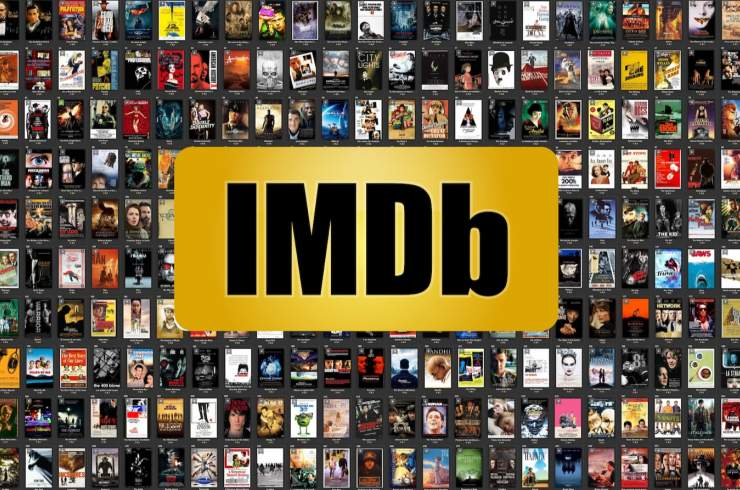

## 8-1. 데이터 임포트 및 전처리

In [64]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = \
                                            imdb.load_data(num_words=10000)

# 희소행렬 화
def vectorize_seq(seqs, dim=10000) : 
    
    # seqs는 [1, 2654, 3889, 500] 이러한 형태
    # i번쨰 행의 10000개의 열에 seq 위치에 1값을 저장
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs) : 
        results[i, seq] = 1.
        
    return results

# train_data는 [[1, 4873, 862, 7762], [43, 555, 7329, 8888]] 이러한 형태
# 이것을 vectorize_seq 함수에 넣으면 0번째 행에 4873의 위치에 1이 저장되어 반환됨
x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [65]:
np.zeros((10, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [66]:
train_data.shape, test_data.shape

((25000,), (25000,))

In [67]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25000, 10000), (25000, 10000), (25000,), (25000,))

In [68]:
results = np.zeros((len(train_data[:2][:20]), 10000))
for i, seq in enumerate(train_data[:2][:20]) : 
    print(seq)
    results[i, seq] = 1.

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 1

In [69]:
results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

## 8-2. 모델 생성 및 fitting

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation="relu", input_shape=(10000, ), name="input"),
    Dense(16, activation="relu", name="hidden"),
    Dense(1, activation="sigmoid", name="output")
])

model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["acc"])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 16)                160016    
                                                                 
 hidden (Dense)              (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [94]:
model_hist = model.fit(x_train, y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 50ms/step - loss: 0.4422 - acc: 0.8269 - val_loss: 0.3478 - val_acc: 0.8695
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2574 - acc: 0.9104 - val_loss: 0.2864 - val_acc: 0.8879
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1983 - acc: 0.9282 - val_loss: 0.2909 - val_acc: 0.8846
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1667 - acc: 0.9414 - val_loss: 0.2915 - val_acc: 0.8864
Epoch 5/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1420 - acc: 0.9499 - val_loss: 0.3142 - val_acc: 0.8800
Epoch 6/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1250 - acc: 0.9569 - val_loss: 0.3348 - val_acc: 0.8784
Epoch 7/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1115 - acc: 0.9616 - val_loss: 0.3748 - val_acc: 0.8677
Epoch 8/20
49/49 [==============================] - 1s 12ms/step - loss: 0.0964 - a

## 8-3. epoch, val_loss 그래프
- epoch가 증가할 수록 loss가 증가한다. 
- 모델에 뭔가 문제가 있다.


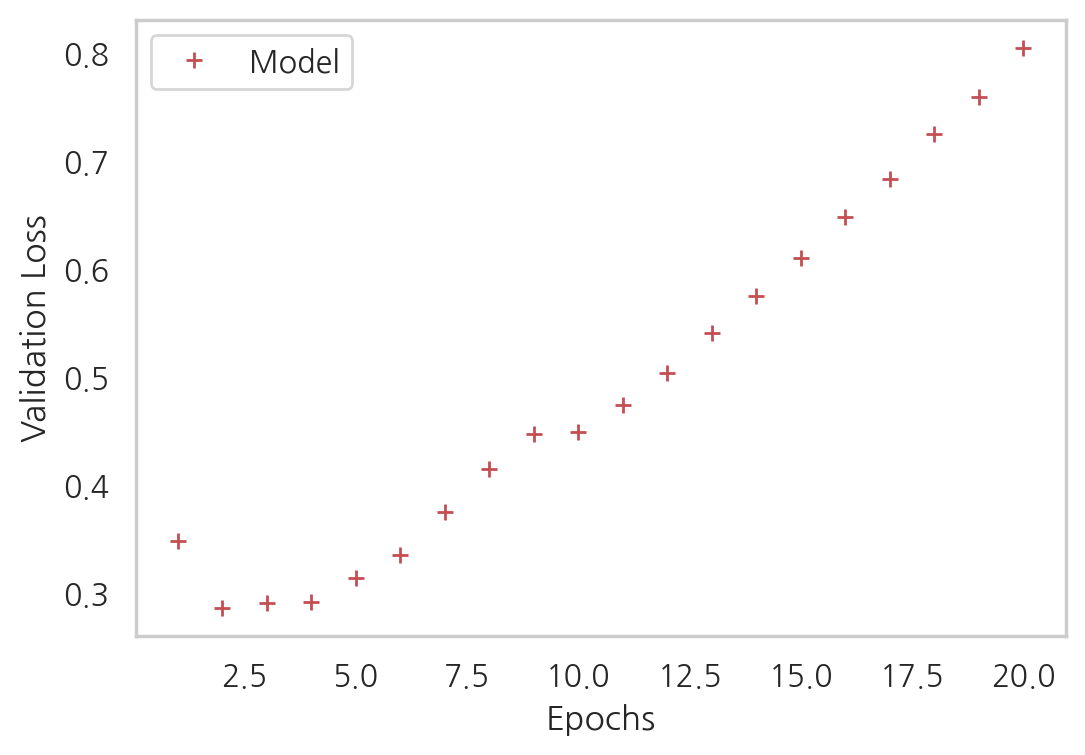

In [95]:
epochs = range(1, 21)
model_val_loss = model_hist.history["val_loss"]

plt.plot(epochs, model_val_loss, "r+", label="Model")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(False)
plt.show() ; 

## 8-4. 과소적합(Underfitting) / 과대적합(Overfitting)

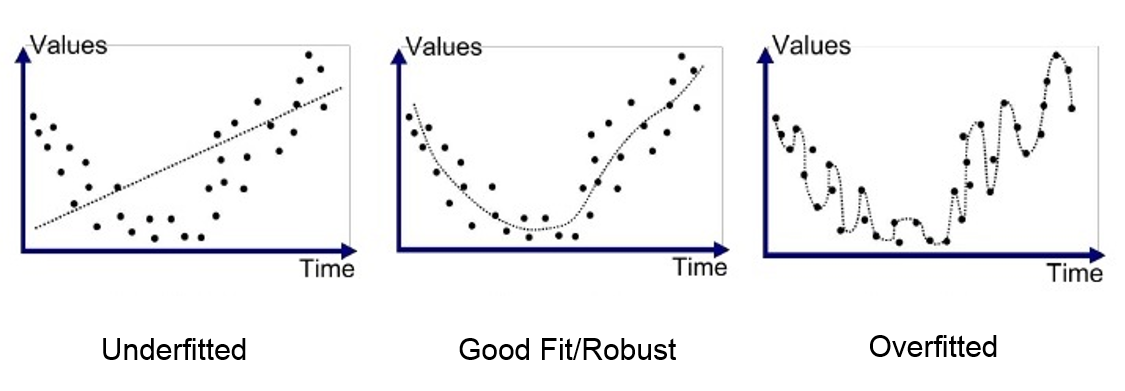

### 과소적합 (Underfitting)

- 학습 데이터를 충분히 학습하지 않아 성능이 매우 안 좋은 경우
- 모델이 지나치게 단순한 경우
- 해결 방안
  - 충분한 학습 데이터 수집
  - 보다 더 복잡한 모델 사용
  - 에폭수(epochs)를 늘려 충분히 학습

### 과대적합 (Overfitting)

- 모델이 학습 데이터에 지나치게 맞추어진 상태
- 새로운 데이터에서는 성능 저하
- 데이터에는 잡음이나 오류가 포함
- 학습 데이터가 매우 적을 경우
- 모델이 지나치게 복잡한 경우 
- 학습 횟수가 매우 많을 경우
- 해결방안
  - 다양한 학습 데이터 수집 및 학습
  - 모델 단순화: 파라미터가 적은 모델을 선택하거나, 학습 데이터의 특성 수를 줄임
  - 정규화(Regularization)을 통한 규칙 단순화
  - 적정한 하이퍼 파라미터 찾기

### 과대적합(overfitting)과 과소적합(underfitting) 방지 방법

* 모델의 크기 축소
* 가중치 초기화(Weight Initializer)
* 옵티마이저(Optimizer)
* 배치 정규화(Batch Normalization)
* 규제화(Regularization)
* 드롭아웃(Dropout)

## 8-5. 과대적합 방지법 : 모델 크기 조절

- 가장 단순한 방법
- 모델의 크기를 줄인다는 것은 학습 파라미터의 수를 줄이는 것


### 모델 크기 감소

In [218]:
model_s = Sequential([
    Dense(6, activation="relu", input_shape=(10000, ), name="input2"),
    Dense(6, activation="relu", name="hidden2"),
    Dense(1, activation="sigmoid", name="output2")
])

model_s.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["acc"])

model_s.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input2 (Dense)              (None, 6)                 60006     
                                                                 
 hidden2 (Dense)             (None, 6)                 42        
                                                                 
 output2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 60,055
Trainable params: 60,055
Non-trainable params: 0
_________________________________________________________________


In [219]:
model_s_hist = model_s.fit(x_train, y_train,
                          epochs=20, 
                          batch_size=512,
                          validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 31ms/step - loss: 0.5356 - acc: 0.7547 - val_loss: 0.4175 - val_acc: 0.8678
Epoch 2/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3244 - acc: 0.9026 - val_loss: 0.3210 - val_acc: 0.8830
Epoch 3/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2401 - acc: 0.9216 - val_loss: 0.2854 - val_acc: 0.8907
Epoch 4/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1982 - acc: 0.9342 - val_loss: 0.2881 - val_acc: 0.8855
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1717 - acc: 0.9428 - val_loss: 0.2941 - val_acc: 0.8818
Epoch 6/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1510 - acc: 0.9502 - val_loss: 0.3010 - val_acc: 0.8806
Epoch 7/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1359 - acc: 0.9555 - val_loss: 0.3063 - val_acc: 0.8807
Epoch 8/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1227 - a

### eopch, Loss 변화 그래프
- 모델의 크기를 감소한 후에 fitting 결과 
```
<Note>
- acc 성능은 거의 같거나 더 높다.
- loss 값이 크기가 큰 모델보다 epoch가 커질 수록 더 낮다.
- 즉 모델의 크기를 축소 시키는 것 만으로도 loss 값을 낮출 수 있다. 
```

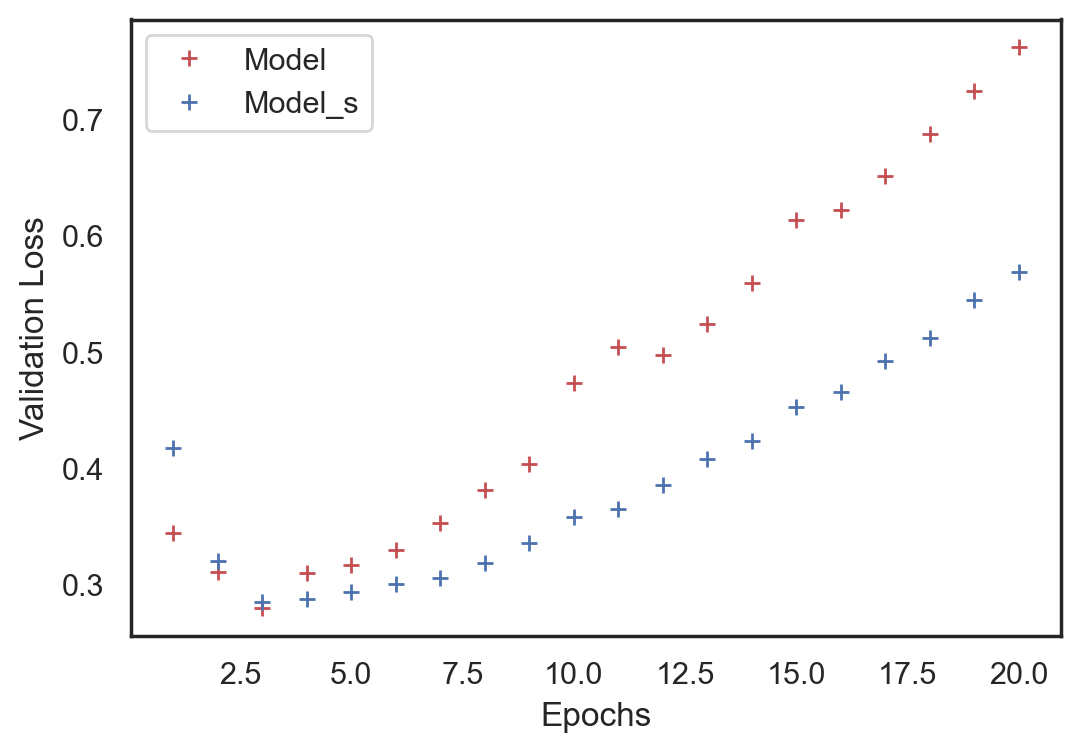

In [220]:
epochs = range(1, 21)
model_s_val_loss = model_s_hist.history["val_loss"]

plt.plot(epochs, model_val_loss, "r+", label="Model")
plt.plot(epochs, model_s_val_loss, "b+", label="Model_s")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(False)
plt.show() ; 

### 모델 크기 증가
- 모델 크기를 증가시키면, fitting 시간이 오래 걸린다.
- 학습 데이터에 대한 성능 acc는 거의 1.0에 가깝다.

In [221]:
model_b = Sequential([
    Dense(1024, activation="relu", input_shape=(10000, ), name="input3"),
    Dense(1024, activation="relu", name="hidden3"),
    Dense(1, activation="sigmoid", name="output3")
])

model_b.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["acc"])

model_b.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input3 (Dense)              (None, 1024)              10241024  
                                                                 
 hidden3 (Dense)             (None, 1024)              1049600   
                                                                 
 output3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 11,291,649
Trainable params: 11,291,649
Non-trainable params: 0
_________________________________________________________________


In [222]:
model_b_hist = model_b.fit(x_train, y_train,
                          epochs=20, 
                          batch_size=512,
                          validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 10s 183ms/step - loss: 0.4997 - acc: 0.7972 - val_loss: 0.3207 - val_acc: 0.8691
Epoch 2/20
49/49 [==============================] - 7s 148ms/step - loss: 0.2335 - acc: 0.9086 - val_loss: 0.2734 - val_acc: 0.8899
Epoch 3/20
49/49 [==============================] - 8s 165ms/step - loss: 0.1247 - acc: 0.9564 - val_loss: 0.3275 - val_acc: 0.8852
Epoch 4/20
49/49 [==============================] - 8s 164ms/step - loss: 0.0608 - acc: 0.9836 - val_loss: 0.5009 - val_acc: 0.8687
Epoch 5/20
49/49 [==============================] - 8s 160ms/step - loss: 0.0805 - acc: 0.9856 - val_loss: 0.5164 - val_acc: 0.8851
Epoch 6/20
49/49 [==============================] - 8s 169ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.6737 - val_acc: 0.8833
Epoch 7/20
49/49 [==============================] - 8s 165ms/step - loss: 4.2262e-05 - acc: 1.0000 - val_loss: 0.8647 - val_acc: 0.8832
Epoch 8/20
49/49 [==============================] - 8s 163ms/step - los

### eopch, Loss 변화 그래프
- 모델의 크기를 크게한 후에 fitting 결과 
   - 성능이 더 나빠짐
   
* 볼륨이 큰 신경망일수록 빠르게 훈련데이터 모델링 가능(학습 손실이 낮아짐)
* 과대 적합에는 더욱 민감해짐
* 이는 학습-검증 데이터 손실을 통해 확인 가능

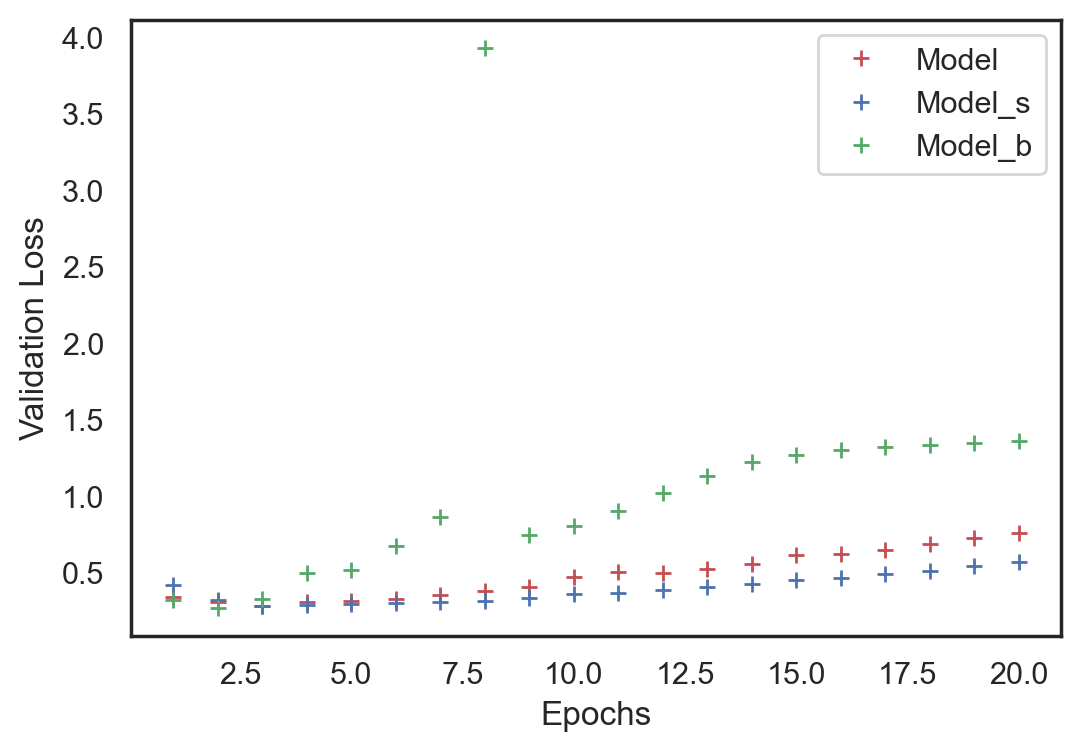

In [224]:
epochs = range(1, 21)
model_b_val_loss = model_b_hist.history["val_loss"]

plt.plot(epochs, model_val_loss, "r+", label="Model")
plt.plot(epochs, model_s_val_loss, "b+", label="Model_s")
plt.plot(epochs, model_b_val_loss, "g+", label="Model_b")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(False)
plt.show() ; 

### train loss 값 확인
- validation loss 값이 가장 작은 Model_s는 train loss 값이 서서히 줄어들지만
- validation loss 값이 가장 큰 Model_b는 train loss 값이 급격하게 줄어드는 경향
   - 어느 epoch 부터는 loss가 0이 된다.
- 즉 모델의 크기가 커지면 train acc는 커지지만 오버피팅 될 수 있다는 것   

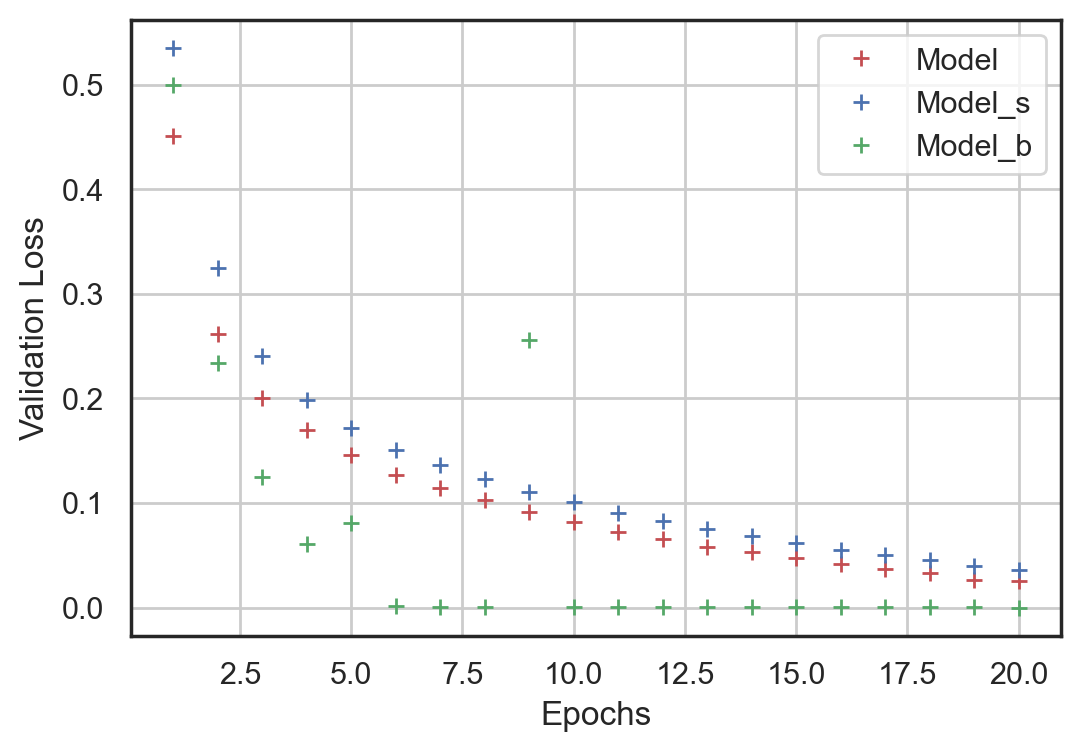

In [226]:
model_train_loss = model_hist.history["loss"]
model_s_train_loss = model_s_hist.history["loss"]
model_b_train_loss = model_b_hist.history["loss"]

plt.plot(epochs, model_train_loss, "r+", label="Model")
plt.plot(epochs, model_s_train_loss, "b+", label="Model_s")
plt.plot(epochs, model_b_train_loss, "g+", label="Model_b")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()
plt.show() ; 

# 9. 옵티마이저(Optimizer)

## 9-1. 확률적 경사하강법(Stochastic Gradient Descent, SGD)

* 전체를 한번에 계산하지 않고, **확률적**으로 일부 샘플을 뽑아 조금씩 나누어 학습을 시키는 과정  
* 반복할 때마다 다루는 데이터의 수가 적기때문에 한 번 처리하는 속도는 빠름  
* 한 번 학습할 때 필요한 메모리만 있으면 되므로 매우 큰 데이터셋에 대해서도 학습이 가능
* 확률적이기 때문에, 배치 경사하강법보다 불안정
* 손실함수의 최솟값에 이를 때까지 다소 위아래로 요동치면서 이동
* 따라서, 위와 같은 문제 때문에 **미니 배치 경사하강법**(mini-batch gradient descent)로 학습을 진행
* 요즘에는 보통 SGD라고하면 미니 배치 경사하강법을 의미하기도 함
* `SGD의 단점: 단순하지만 문제에 따라서 시간이 매우 오래걸림`
* SGD 수식

  $\quad W \leftarrow W - \gamma \frac{\partial L}{\partial W}$  
   - $\gamma :\ $ 학습률

  





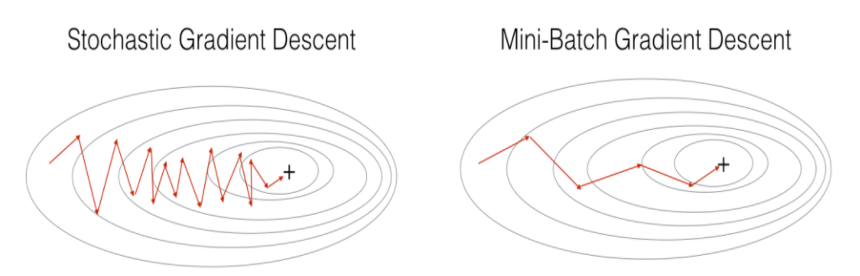

## 9-2. Momentum

- 운동량을 의미, `관성과 관련`
- 공이 그릇의 경사면을 따라서 내려가는 듯한 모습
- 이전의 속도를 유지하려는 성향
- 경사하강을 좀 더 유지하려는 성격을 지님
- `단순히 SGD만 사용하는 것보다 적게 방향이 변함`
* Momentum 수식

  $
  \qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
  \qquad W \ \leftarrow \ W \ + \ v
  $
  - $\alpha\ $ : 관성계수 
  - $v$ :  속도
  - $\gamma\ $ : 학습률
  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분




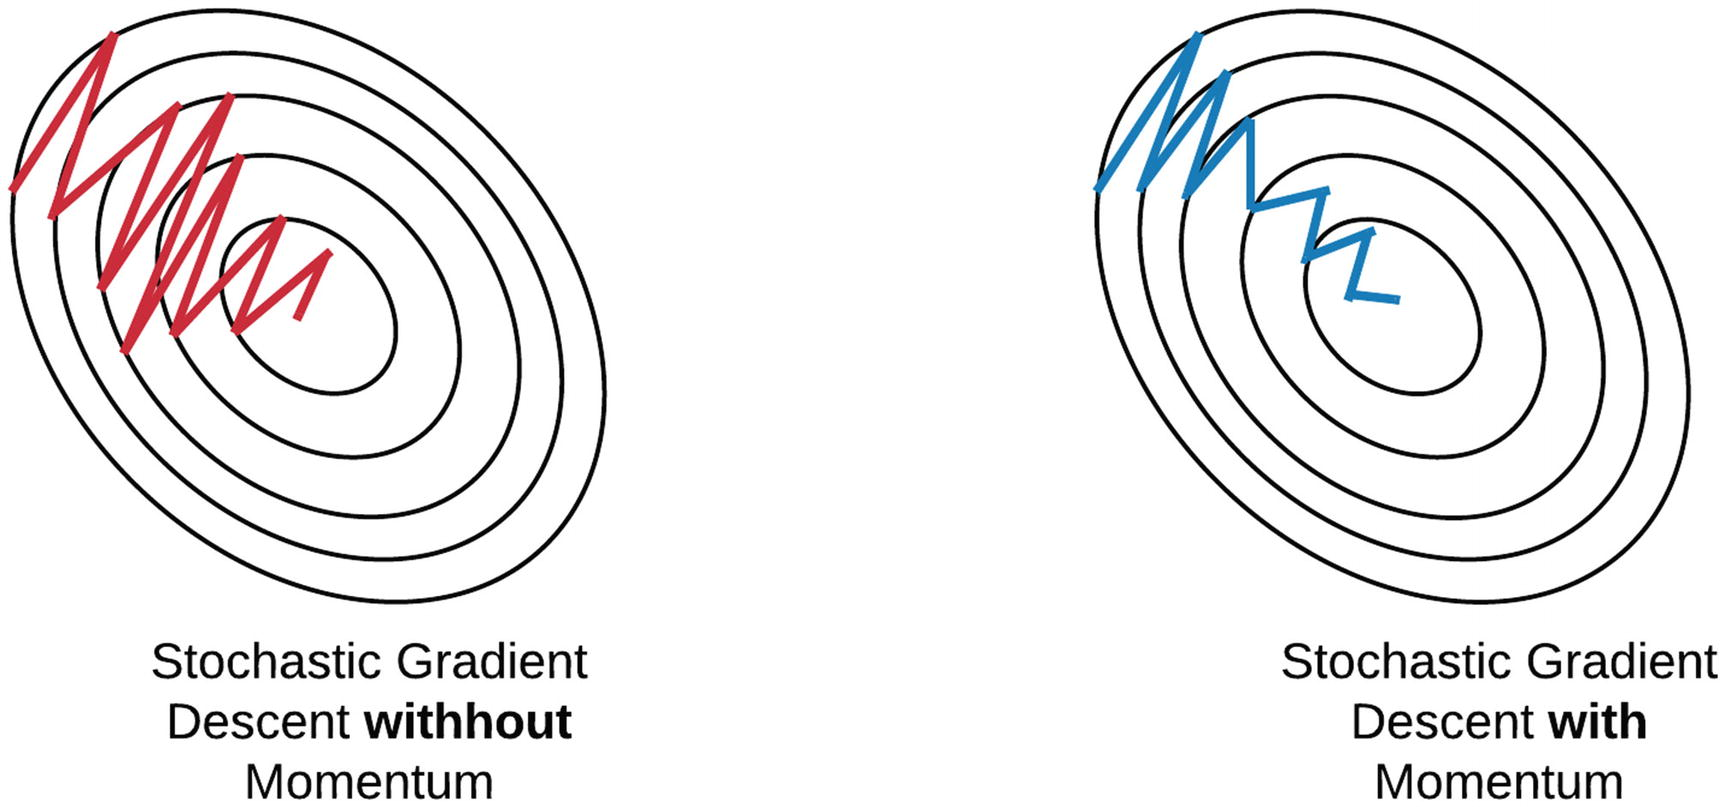

In [229]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

sgd_opt = SGD(learning_rate=0.01)
momentum_opt = SGD(learning_rate=0.01, momentum=0.9)

## 9-3. Nesterov

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함
- 시간이 지날수록 조금 더 빨리 최솟값에 도달
- Nesterov 수식

  $
  \qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
  \qquad \theta \ \leftarrow \ \theta \ + m
  $

  - $h\ $ : 기존 기울기를 제곱하여 더한 값
  - $\eta\ $ : 학습률
  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

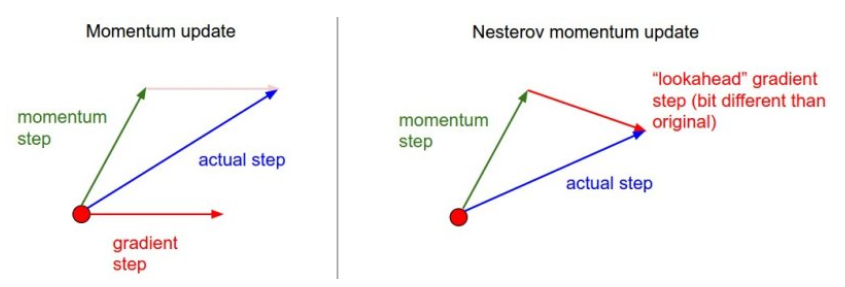

### 코드로 구현

In [230]:
nesterov_opt = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
nesterov_opt

## 9-4. AdaGrad(Adaptive Gradient)

- 가장 가파른 경사를 따라 빠르게 하강하는 방법
- 학습률을 변화시키며 진행하며 `적응적 학습률`이라고도 부름
- 경사가 급할 때는 빠르게 변화, 완만할 때는 느리게 변화
- `간단한 문제에서는 좋을 수는 있지만 딥러닝(Deep Learning)에서는 자주 쓰이지 않음`
- 학습률이 너무 감소되어 전역최소값(global minimum)에 도달하기 전에 학습이 빨리 종료될 수 있기 때문
- AdaGrad 수식

  $
  \qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
  \qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
  $
  - $h\ $ : 기존 기울기를 제곱하여 더한 값
  - $\gamma\ $ : 학습률
  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분
  - 과거의 기울기를 제곱하여 계속 더해하기 때문에 학습을 진행할수록 갱신 강도가 약해짐 ($\because \frac{1}{\sqrt h}$)    
  

### 코드로 구현

In [231]:
from tensorflow.keras.optimizers import Adagrad

adagrad_opt = Adagrad(learning_rate=0.001)
adagrad_opt

## 9-5. RMSProp (Root Mean Square Propagation)

- AdaGrad를 보완하기 위한 방법으로 등장
- `합 대신 지수의 평균값을 활용`
- `학습이 안되기 시작하면 학습률이 커져서 잘 되게하고, 학습률이 너무 크면 학습률을 다시 줄임`
- RMSProp 수식

  $
  \qquad h \ \leftarrow \  \rho \ h + (1 - \rho)\ \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
  \qquad W \ \leftarrow \ W \ + \gamma \frac{\partial L}{\partial W} / \ \sqrt{h + \epsilon}
  $
  - $h\ $ : 기존 기울기를 제곱하여 업데이트 계수를 곱한 값과 업데이트 계수를 곱한 값을 더해줌 
  - $\rho\ $ : 지수 평균의 업데이트 계수
  - $\gamma\ $ : 학습률
  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

### 코드로 구현

In [233]:
from tensorflow.keras.optimizers import RMSprop

rmsprop_opt = RMSprop(learning_rate=0.001, rho=0.9)

## 9-6. Adam (Adaptive Moment Estimation)

- `모멘텀 최적화와 RMSProp의 아이디어를 합친 것`
- 지난 그래디언트의 지수 감소 평균을 따르고(Momentum), 지난 그레디언트 제곱의 지수 감소된 평균(RMSProp)을 따름
- `가장 많이 사용되는 최적화 방법`
- Adam 수식

  $
  \qquad t \ \leftarrow \ t + 1 \\
  \qquad m_t \ \leftarrow \  \beta_1 \ m_{t-1} - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
  \qquad v_t \ \leftarrow \ \beta_2 \ v_{t-1} + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
  \qquad \hat{m_t} \ \leftarrow \frac{m_t}{1 - \beta_1^t} \\
  \qquad \hat{v_t} \ \leftarrow \frac{v_t}{1 - \beta_2^t} \\
  \qquad W_t \ \leftarrow \ W_{t-1} \ + \gamma \ \hat{m_t}\  / \sqrt{\hat{v_t} + \epsilon}
  $
  - $\beta\ $ : 지수 평균의 업데이트 계수
  - $\gamma\ $ : 학습률
  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$
  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

### 코드로 구현

In [235]:
from tensorflow.keras.optimizers import Adam

adam_opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### 최적화 Optimizer 비교
- SGD (Stochastic Gradient Descendent)
- Momentum
- Nesterov
- Adagrad (Adaptive Gradient)
- RMSProp (Root Mean Square Propagation)
- Adam (Adaptive Moment Estimation)

<img src="https://user-images.githubusercontent.com/11681225/50016682-39742a80-000d-11e9-81da-ab0406610b9c.gif" width="700">

<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F222B4F4F562BD0330EA41C">

# 10. 가중치 초기화(Weights Initialization)

* 가중치 초기화 시각화: https://www.deeplearning.ai/ai-notes/initialization/

## 10-1. 가중치 소실(Gradient Vanishing)

- 활성화함수가 Sigmoid 함수 일 때, 은닉층의 갯수가 늘어 날수록 가중치가 역전파되면서 가중치 소실문제 발생
  - 0 ~ 1 사이의 값으로 출력되면서 0 또는 1에 가중치 값이 퍼짐  
    이는 <u>미분값이 점점 0에 가까워짐</u>을 의미하기도 함
  - **ReLU 함수 등장(비선형 함수)**

- 가중치 초기화 문제(은닉층의 활성화값 분포)
  - 가중치의 값이 일부 값으로 치우치게 되면, 활성화 함수를 통과한 값이 치우치게 되고, 표현할 수 있는 신경망의 수가 적어짐
  - 따라서, 활성화값이 골고루 분포되는 것이 중요

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F278186%2Fd158ec3585bc1551d9f3a03ae13a3a73%2Fvanishing%20gradient%20problem.png?generation=1574233763365617&alt=media)

## 10-2.  선형 함수에서 가중치 초기화 - 초기값 : 0 (zeros)
- 학습이 올바르게 진행되지 않음
- 0으로 설정하면 오차역전파법에서 모든 가중치의 값이 똑같이 갱신됨

In [13]:
import numpy as np

def sigmoid(x) : 
    
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers) : 
    if i != 0 :        
        x = activation_values[i-1]
    
    # 가중치 초기값    
    w = np.zeros((nodes, nodes))
    a = np.dot(x, w)
    z = sigmoid(a)
    activation_values[i] = z

In [14]:
activation_values

{0: array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        ...,
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]]),
 1: array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        ...,
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]]),
 2: array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        ...,
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]]),
 3: array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]

In [8]:
%matplotlib inline

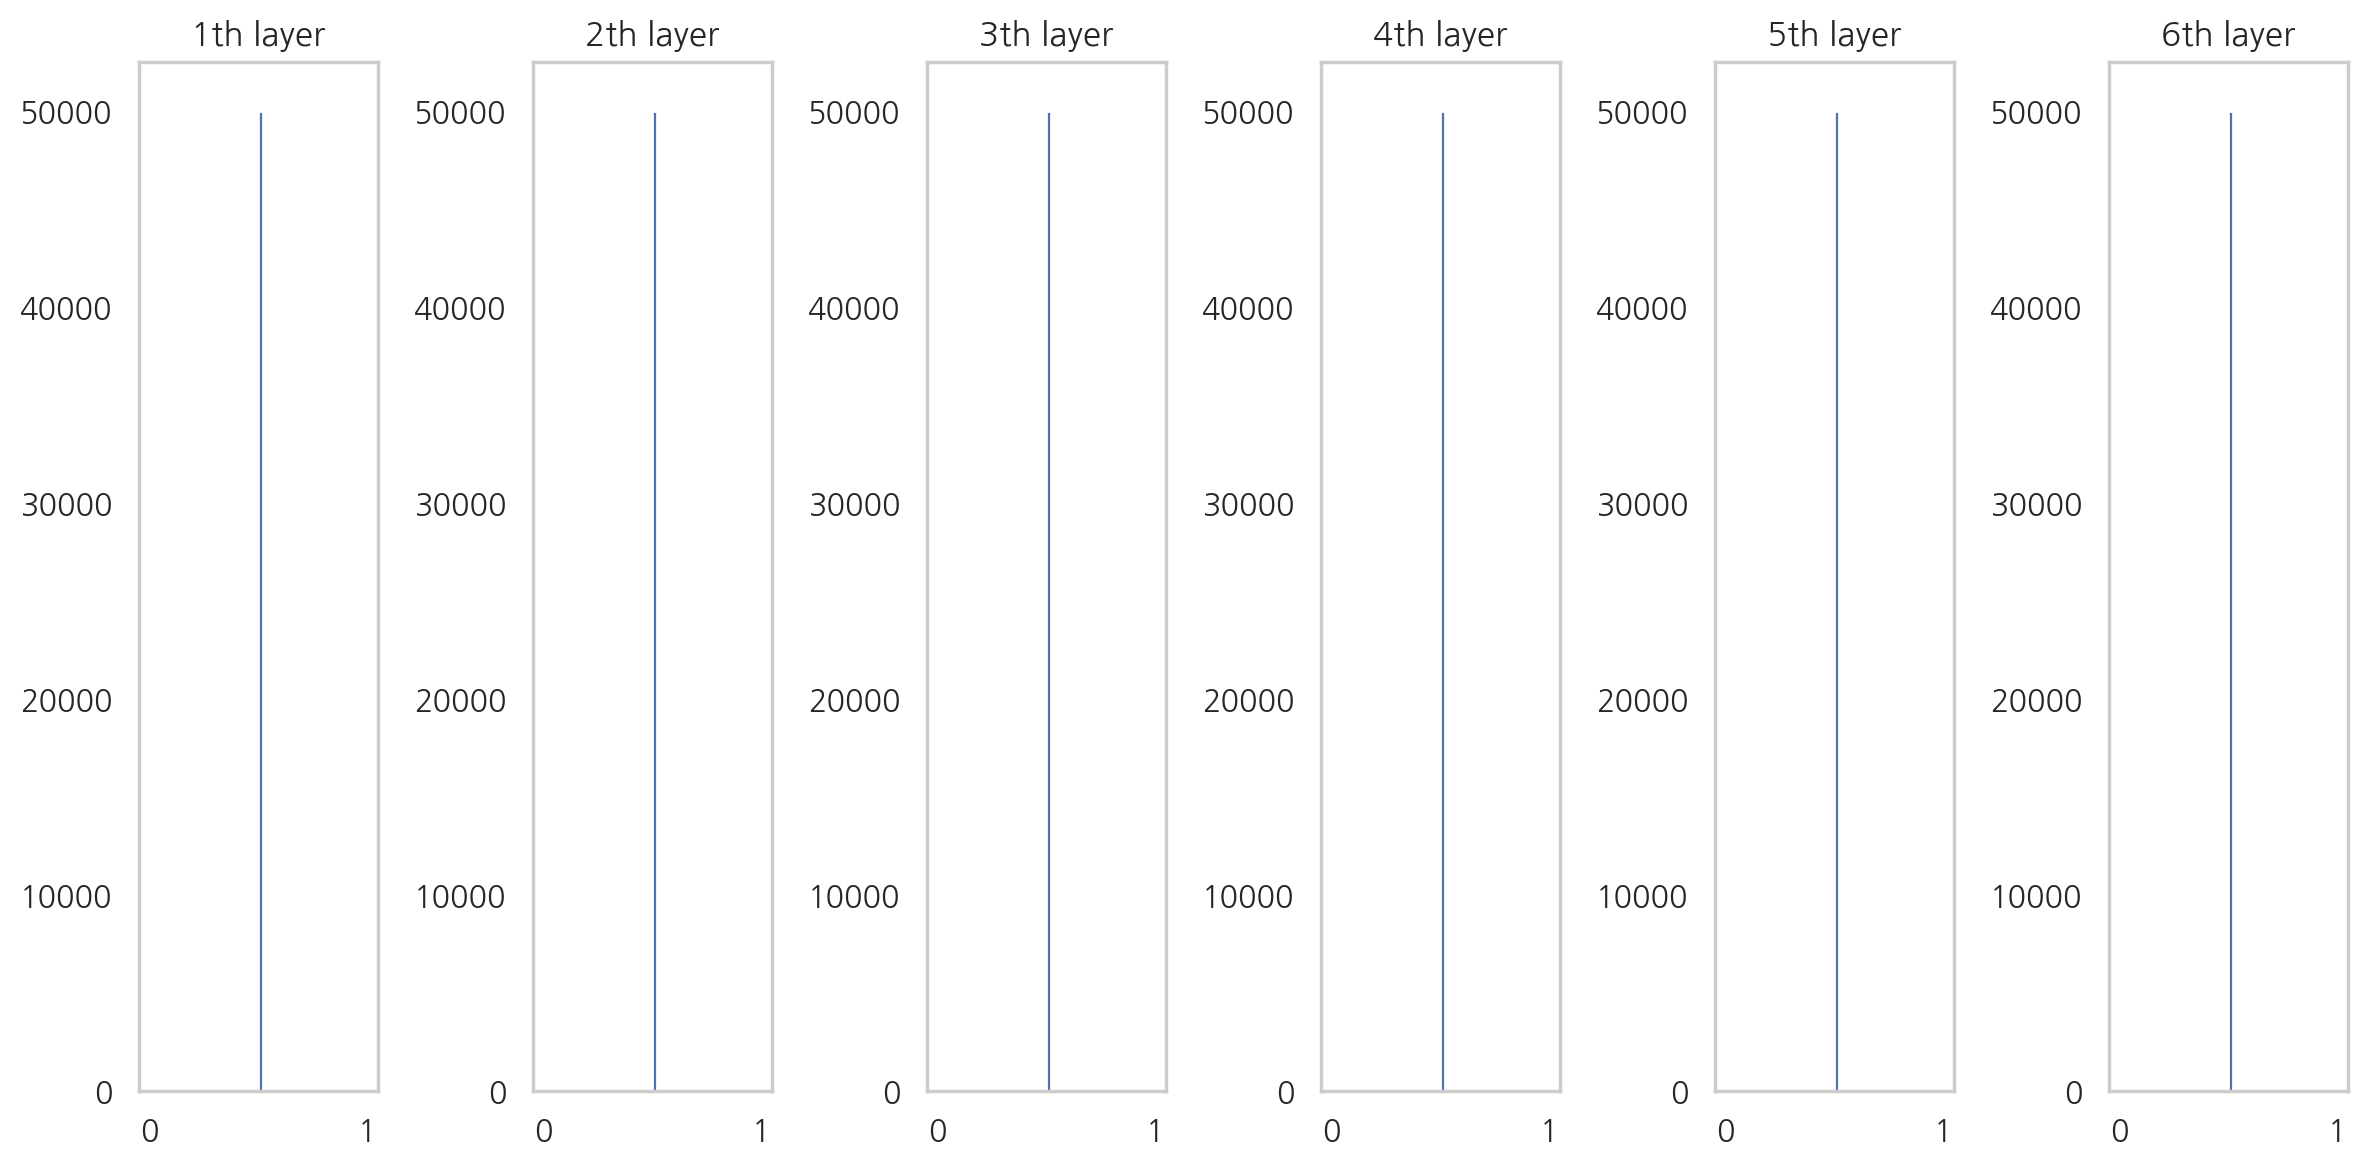

In [21]:
plt.figure(figsize=(12, 6))

for i, a in activation_values.items() : 
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i + 1) + "th layer")
    plt.hist(a.flatten(), bins=50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.grid(False)

plt.tight_layout()
plt.show() ; 

In [20]:
activation_values[0].flatten()

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

## 10-3.  선형 함수에서 가중치 초기화 - 초기값 : 균일분포(Uniform) 
- 활성화 값이 균일하지 않음(활성화함수 : sigmoid)
- 역전파로 전해지는 기울기값이 사라짐

In [22]:
def sigmoid(x) : 
    
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers) : 
    if i != 0 :        
        x = activation_values[i-1]
    
    # 가중치 초기값    
    w = np.random.uniform(1, 10, (nodes, nodes))
    a = np.dot(x, w)
    z = sigmoid(a)
    activation_values[i] = z

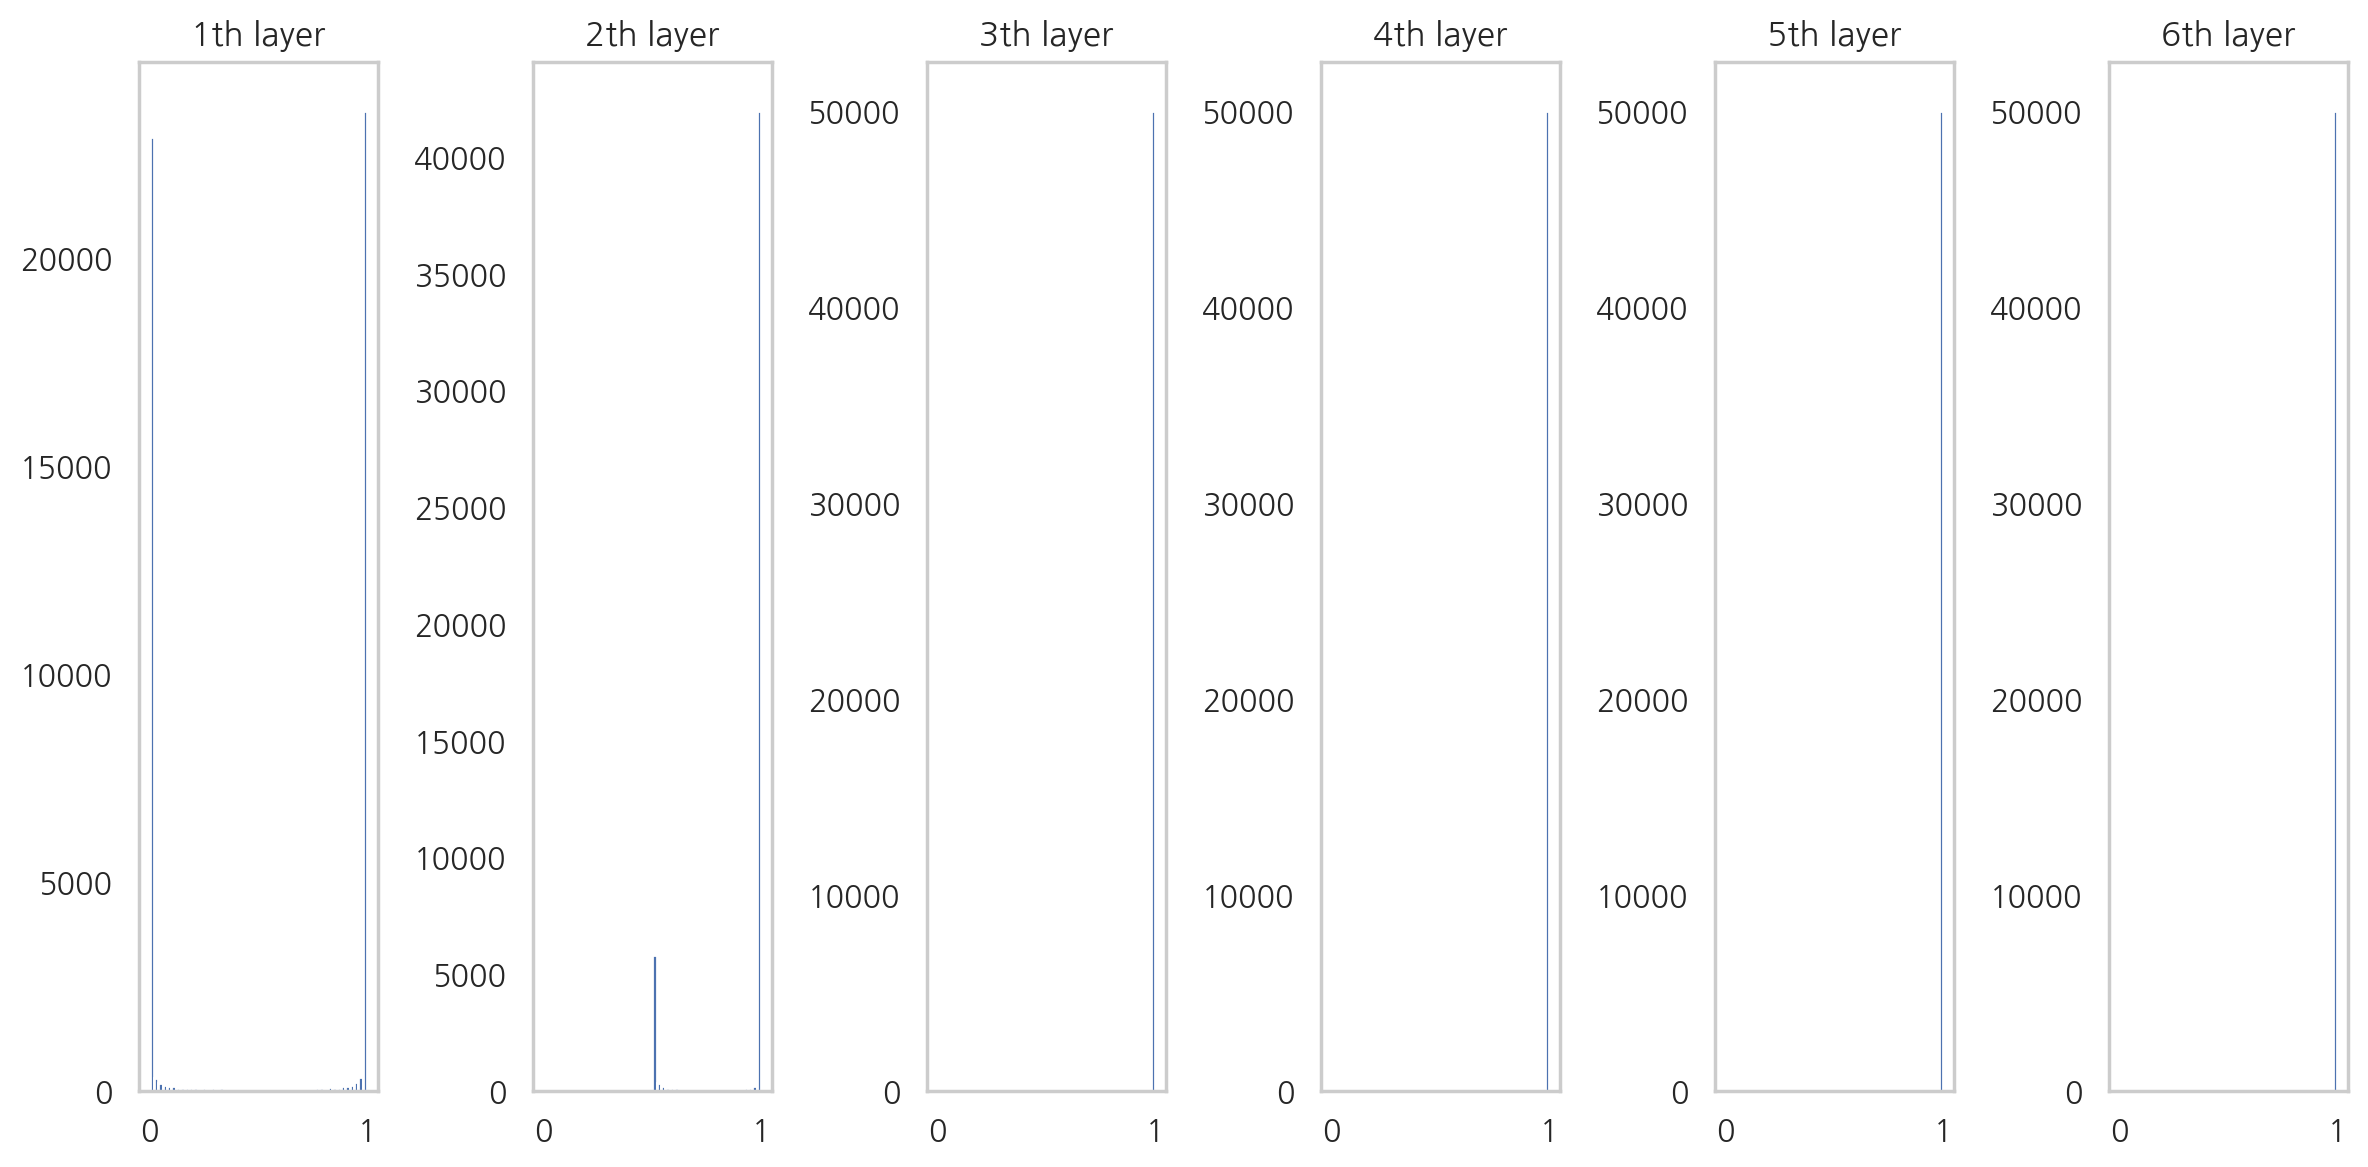

In [23]:
plt.figure(figsize=(12, 6))

for i, a in activation_values.items() : 
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i + 1) + "th layer")
    plt.hist(a.flatten(), bins=50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.grid(False)

plt.tight_layout()
plt.show() ; 

## 10-4.  선형 함수에서 가중치 초기화 - 초기값 : 정규분포(nomalization)
- 활성화함수를 통과하면 양쪽으로 퍼짐
- 0과 1에 퍼지면서 기울기 소실문제(gradient vanishing) 발생

In [24]:
def sigmoid(x) : 
    
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers) : 
    if i != 0 :        
        x = activation_values[i-1]
    
    # 가중치 초기값    
    w = np.random.randn(nodes, nodes)
    a = np.dot(x, w)
    z = sigmoid(a)
    activation_values[i] = z

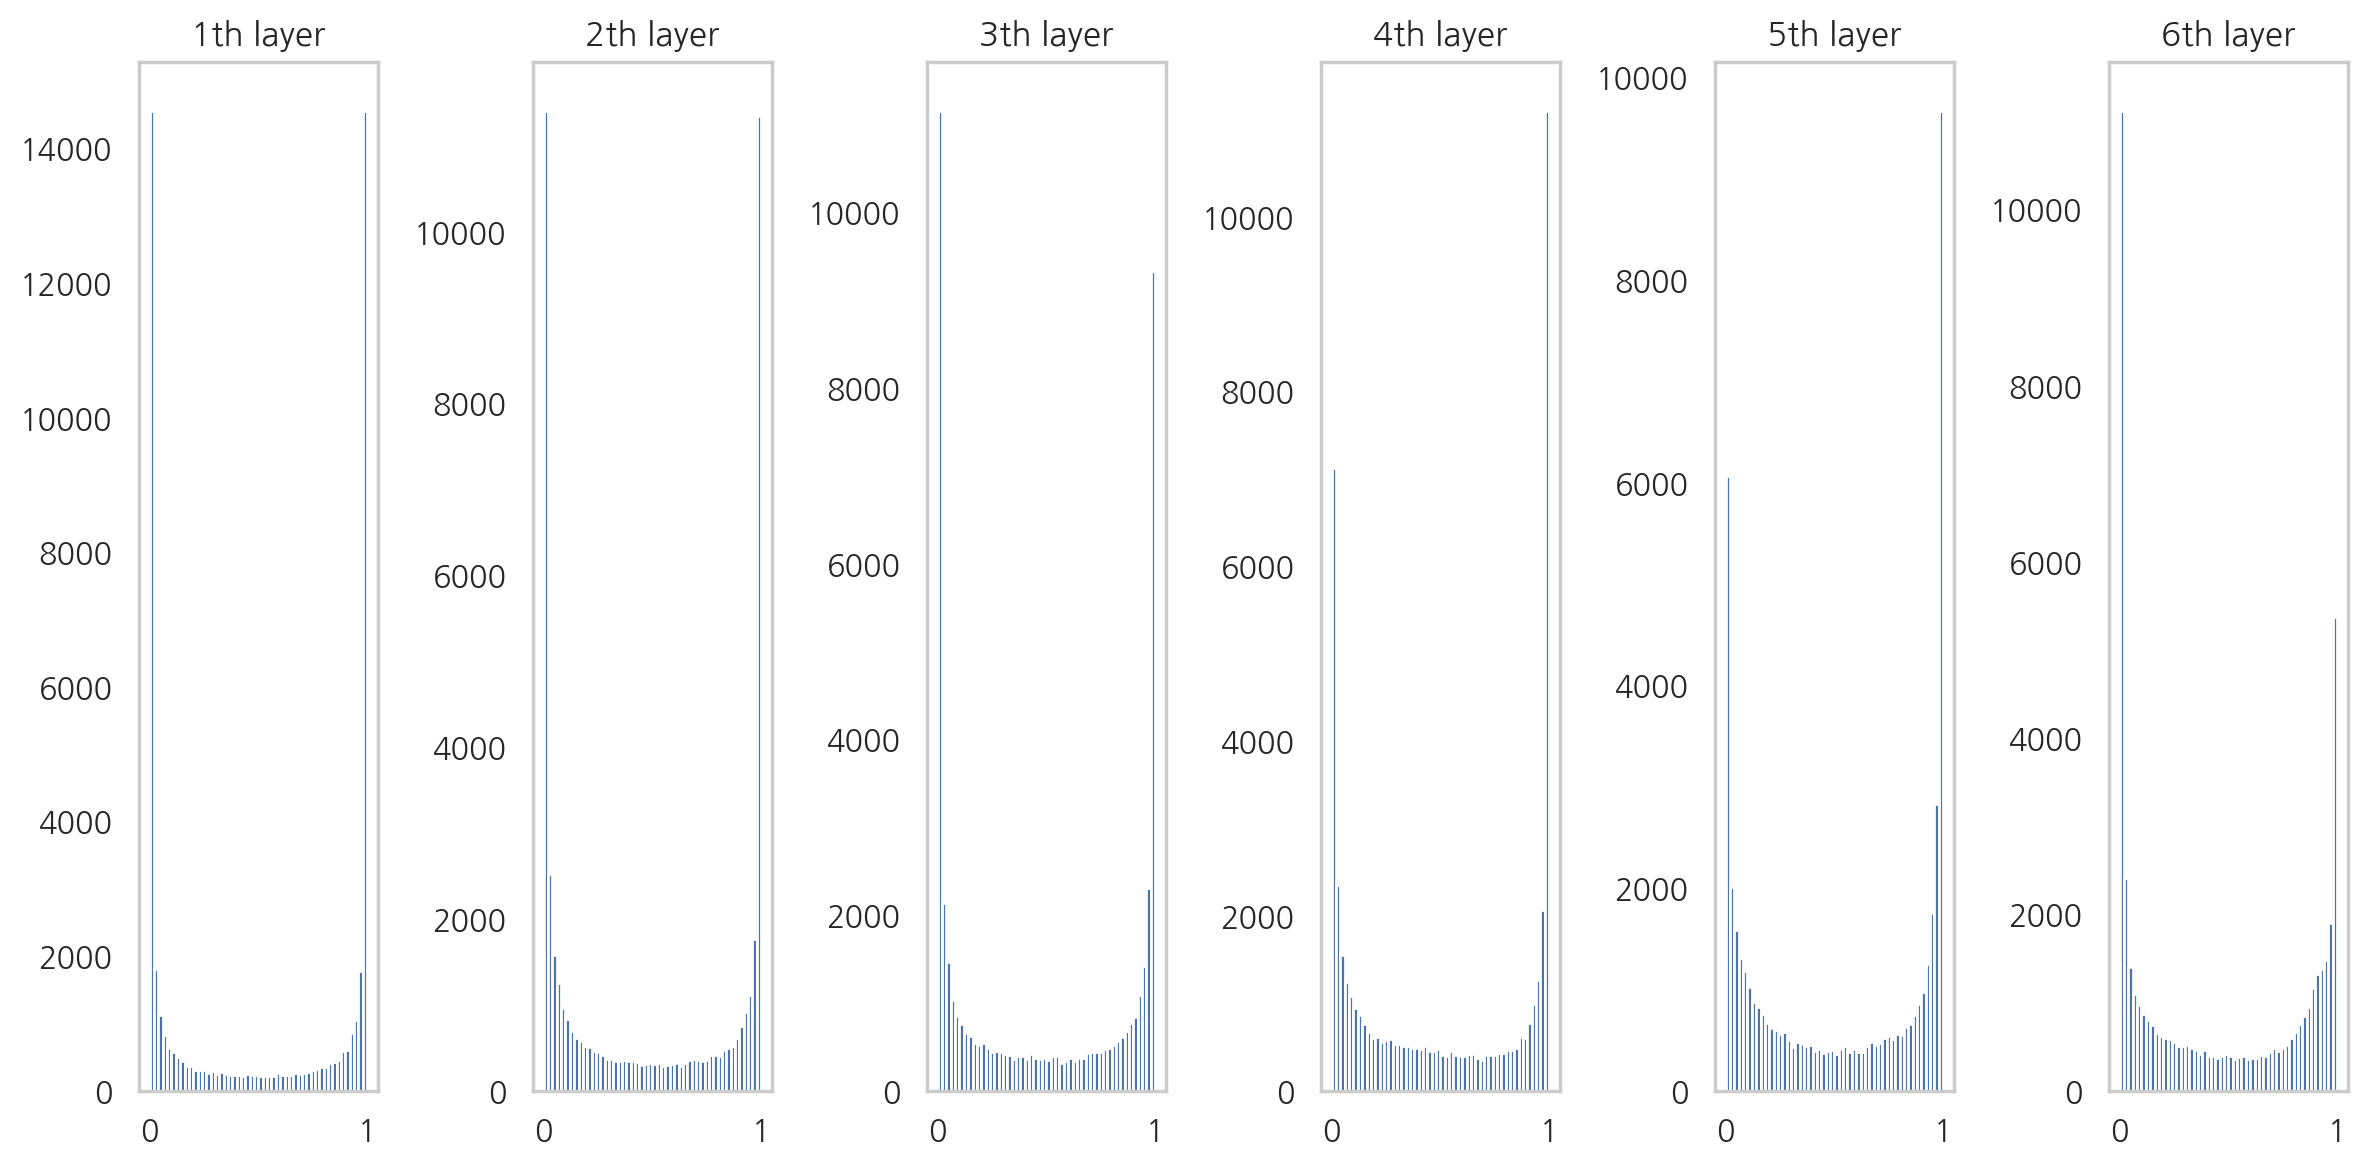

In [25]:
plt.figure(figsize=(12, 6))

for i, a in activation_values.items() : 
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i + 1) + "th layer")
    plt.hist(a.flatten(), bins=50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.grid(False)

plt.tight_layout()
plt.show() ; 

#### 아주 작은 정규분포값으로 가중치 초기화 하면?
  - 0과 1로 퍼치지는 않았고, 한 곳에 치우쳐 짐
  - 해당 신경망이 표현할 수 있는 문제가 제한됨

In [26]:
def sigmoid(x) : 
    
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers) : 
    if i != 0 :        
        x = activation_values[i-1]
    
    # 가중치 초기값    
    w = np.random.randn(nodes, nodes) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activation_values[i] = z

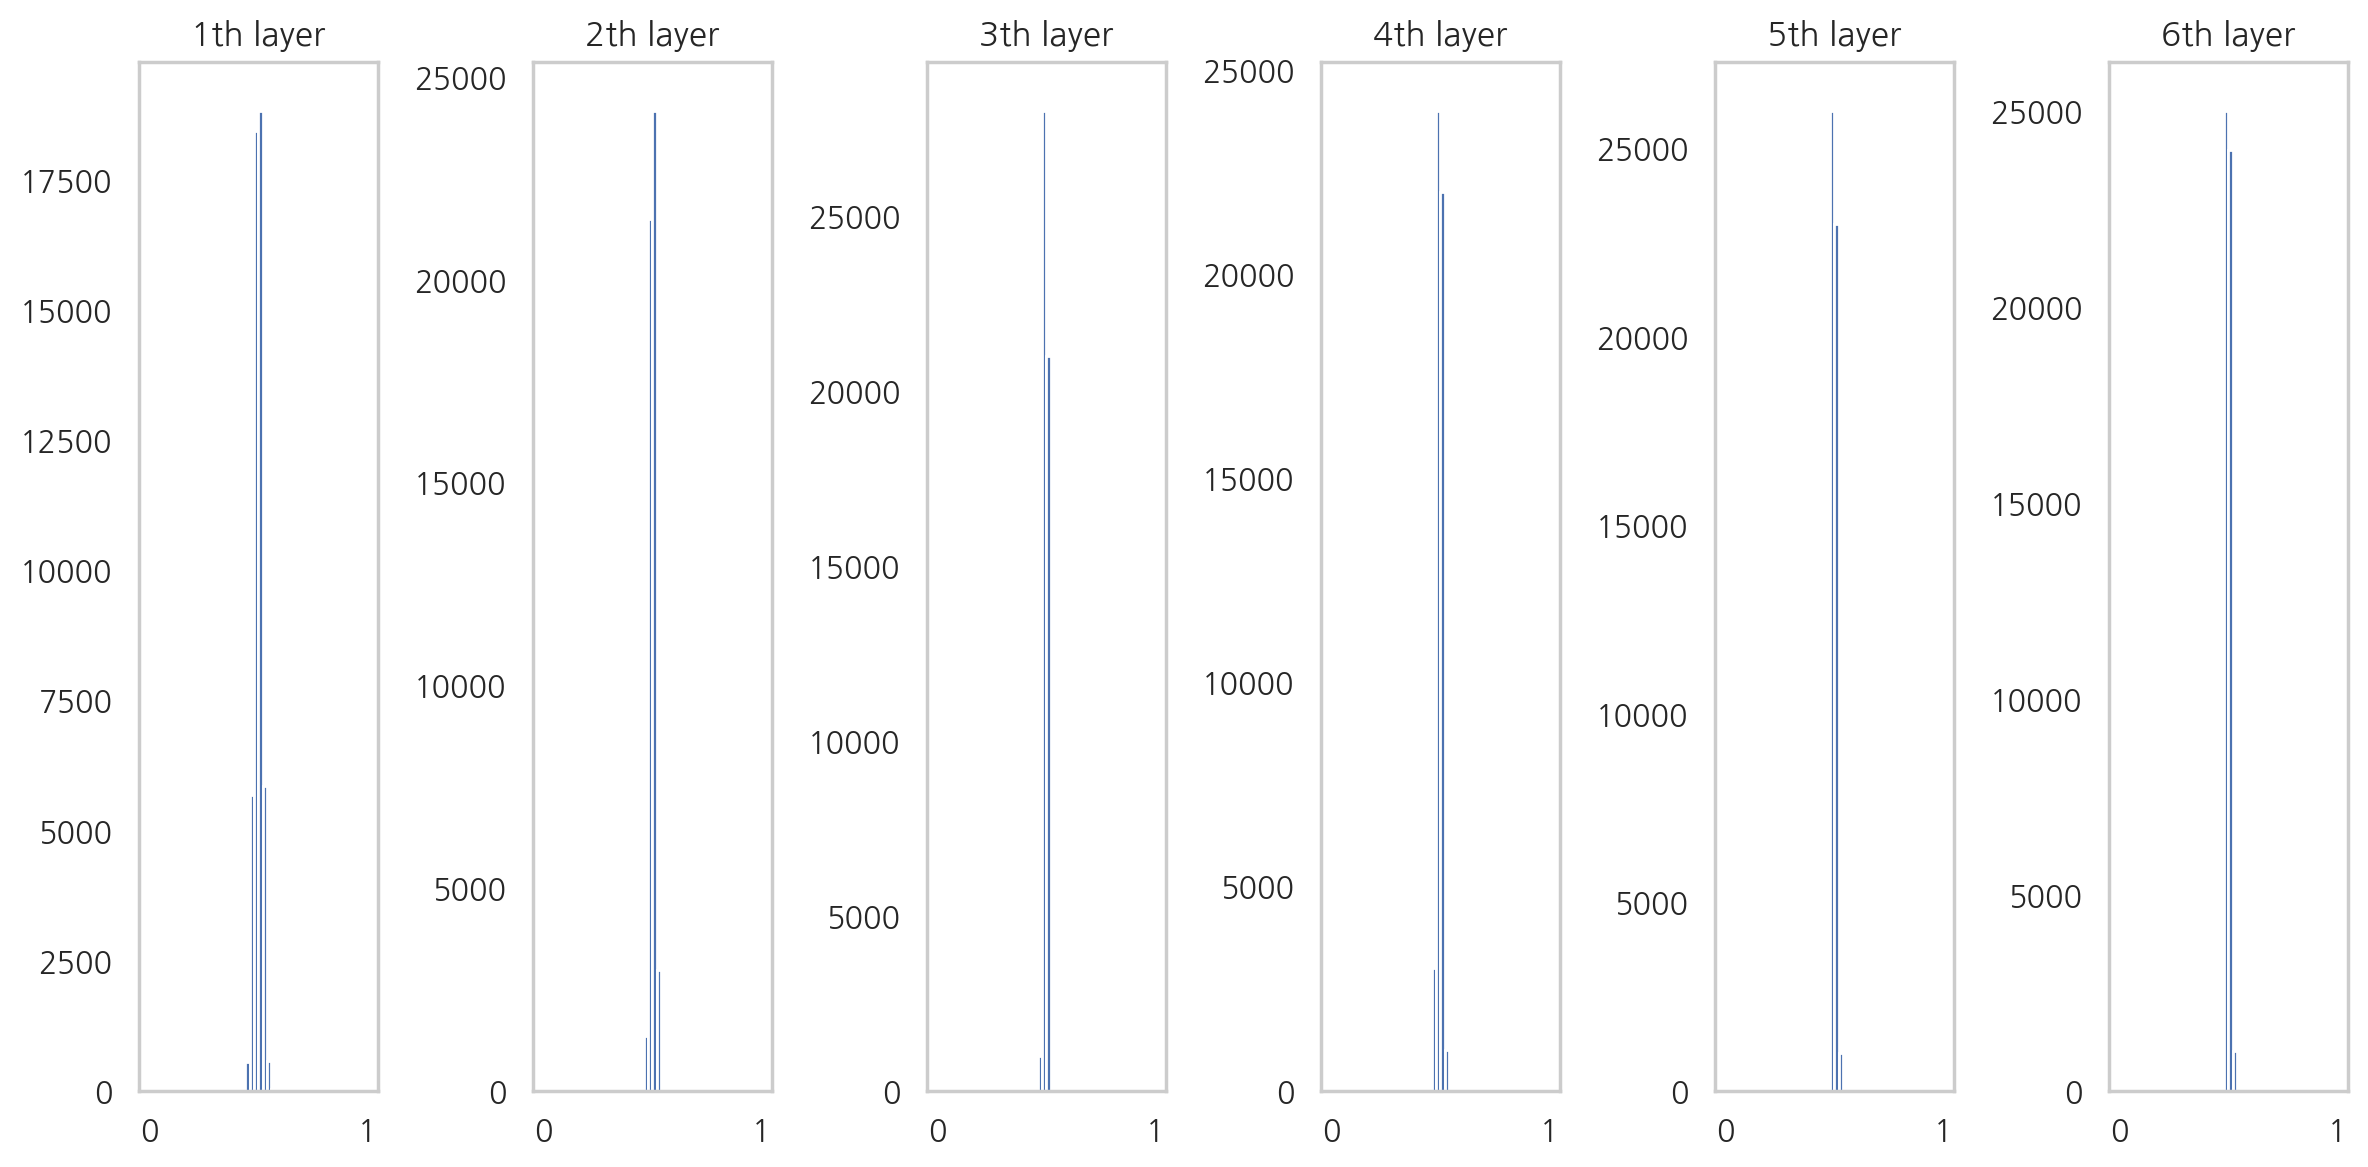

In [27]:
plt.figure(figsize=(12, 6))

for i, a in activation_values.items() : 
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i + 1) + "th layer")
    plt.hist(a.flatten(), bins=50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.grid(False)

plt.tight_layout()
plt.show() ; 

## 10-5.  선형 함수에서 가중치 초기화 - 초기값 : Xavier (Glorot) : 자비에르 (글로롯)
- 은닉층의 노드의 수가 n이라면 표준편차가 $\frac{1}{\sqrt{n}}$인 분포
- 더 많은 가중치에 역전파가 전달 가능하고, 비교적 많은 문제를 표현할 수 있음
- 활성화 함수가 **선형**인 함수일 때 매우 적합

```
<Note>
- 글로롯 방법이 많이 사용된다.
```

In [25]:
def sigmoid(x) : 
    
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers) : 
    if i != 0 :        
        x = activation_values[i-1]
    
    # 가중치 초기값 : 자비에르의 글로롯 방법
    w = np.random.randn(nodes, nodes) / np.sqrt(nodes)
    a = np.dot(x, w)
    z = sigmoid(a)
    activation_values[i] = z

#### 0, 1에 치우ㅊ지 않고, 가중치 소실 현상도 줄어듦
- 가중치 소실 : gradient vanishing

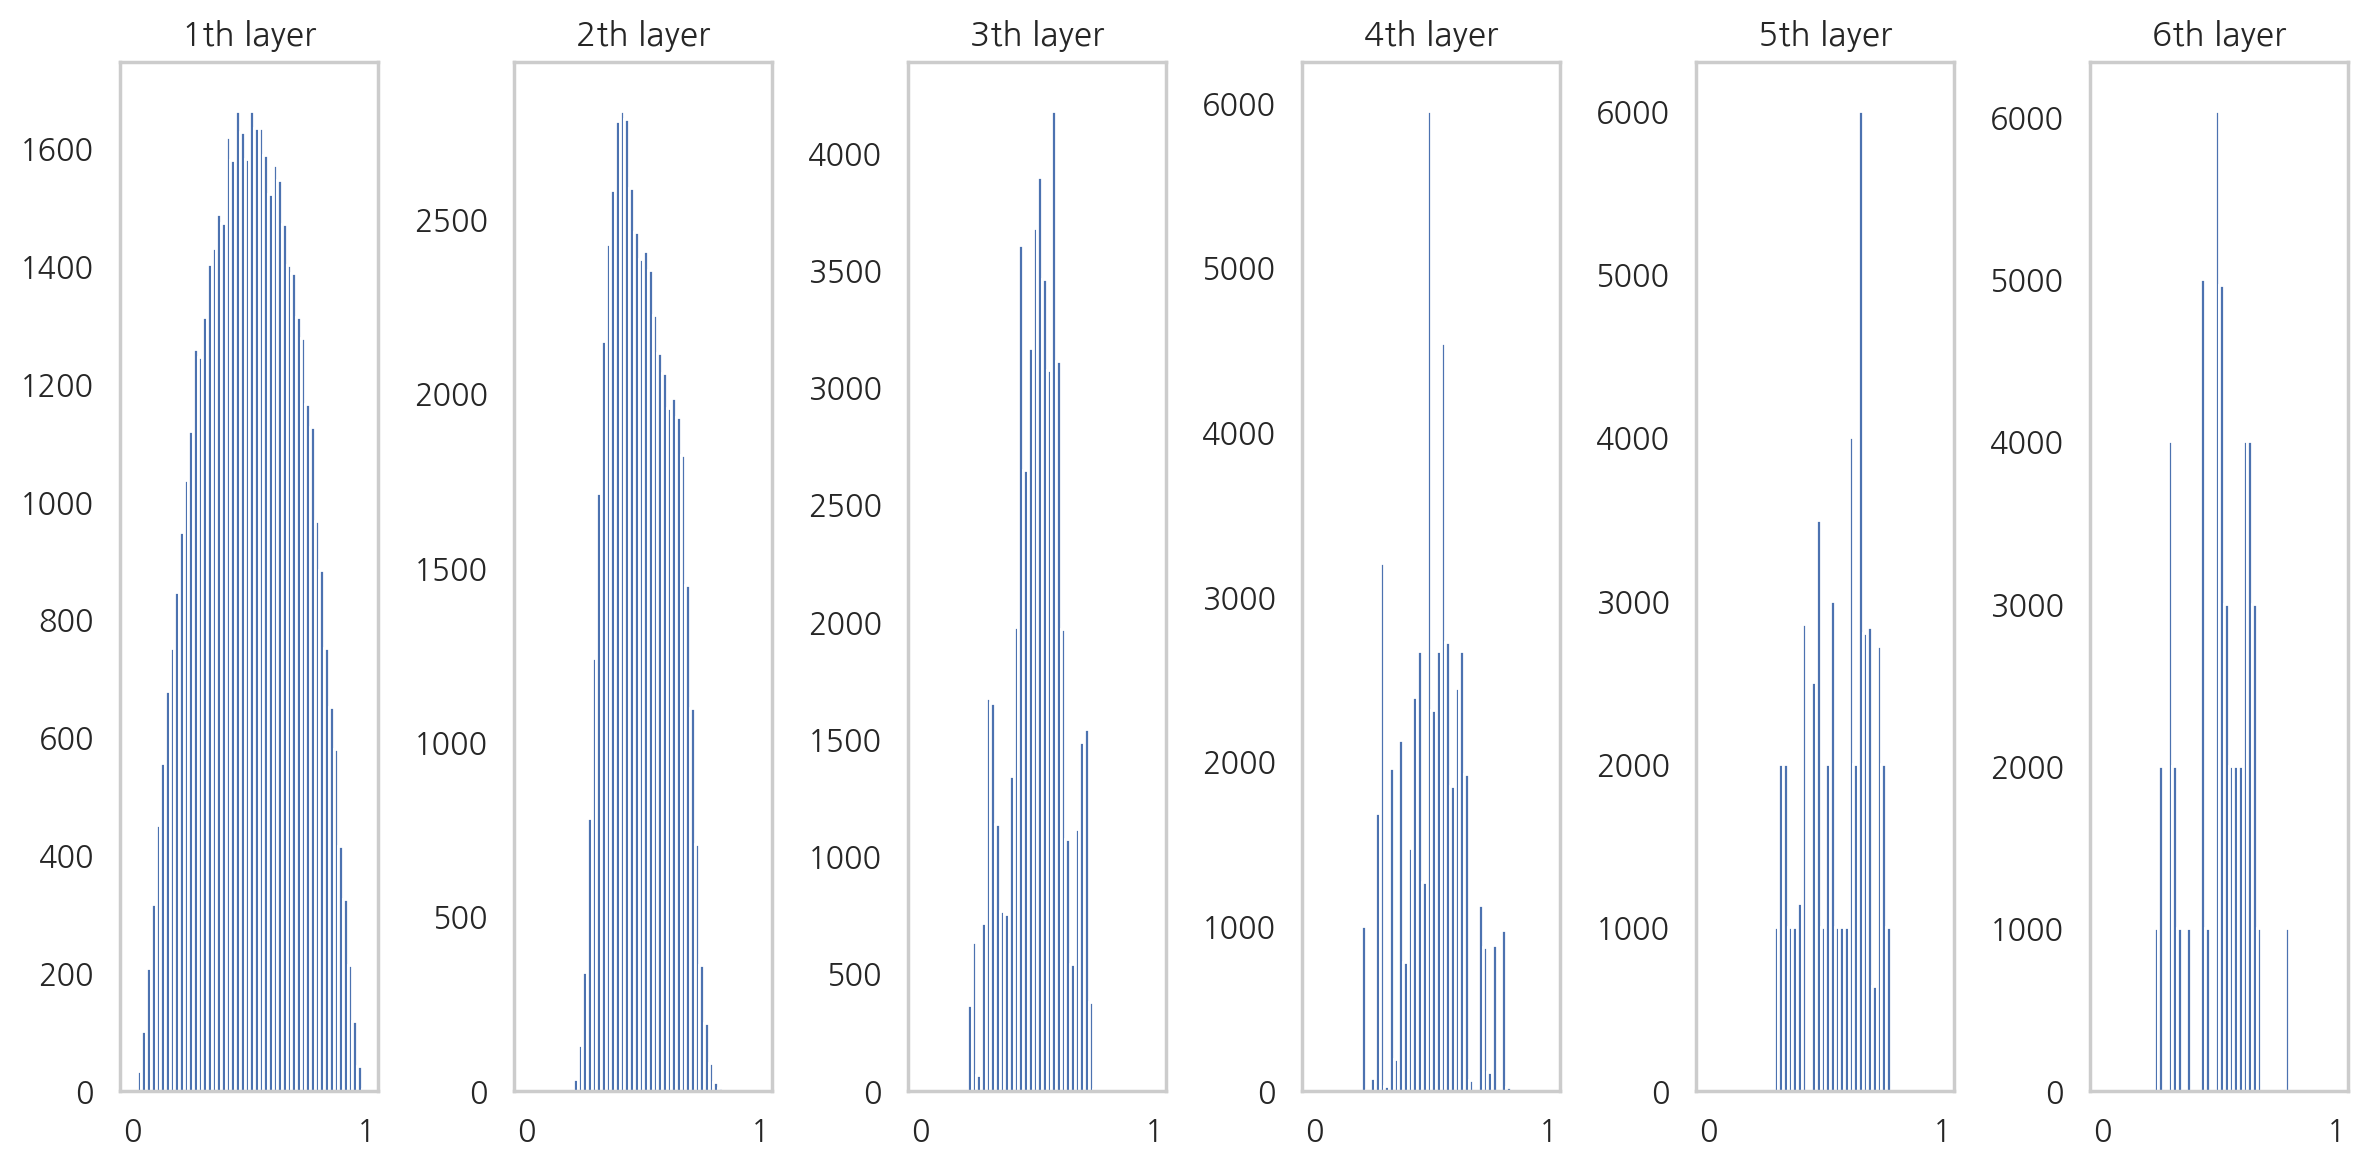

In [29]:
plt.figure(figsize=(12, 6))

for i, a in activation_values.items() : 
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i + 1) + "th layer")
    plt.hist(a.flatten(), bins=50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.grid(False)

plt.tight_layout()
plt.show() ; 

## 10-6.  선형 함수에서 가중치 초기화 - 초기값 : Xavier (Glorot) - tanh
- 활성화 함수: tanh
- sigmoid 함수보다 더 깔끔한 종모양으로 분포  


In [31]:
# activation function

def tahn(x) : 
    
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers) : 
    if i != 0 :        
        x = activation_values[i-1]
    
    # 가중치 초기값 : 자비에르의 글로롯 방법
    w = np.random.randn(nodes, nodes) / np.sqrt(nodes)
    a = np.dot(x, w)
    z = tahn(a)
    activation_values[i] = z

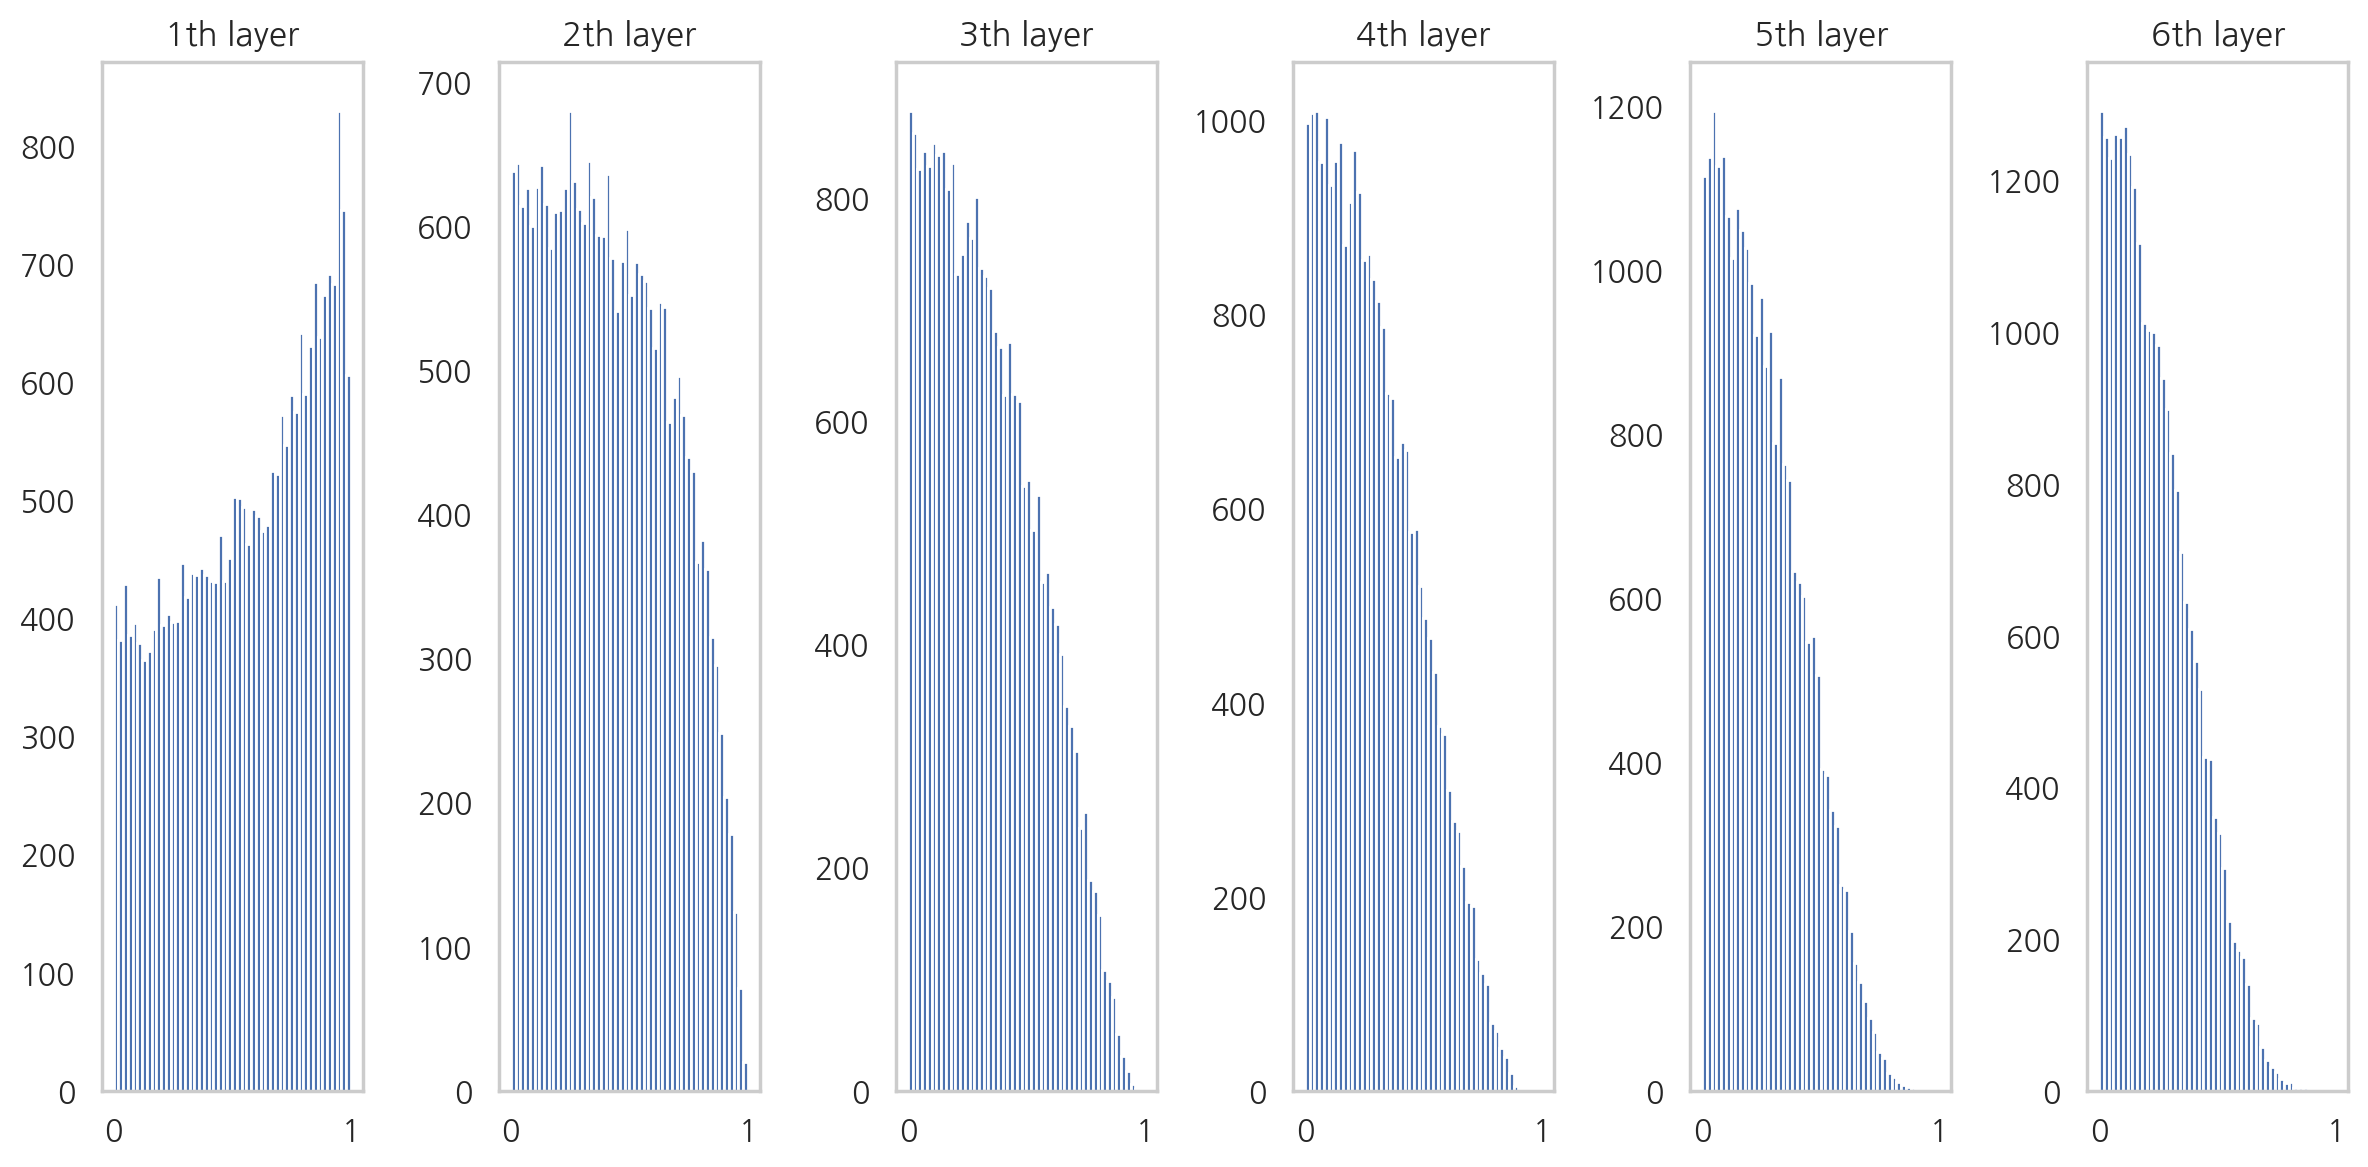

In [32]:
plt.figure(figsize=(12, 6))

for i, a in activation_values.items() : 
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i + 1) + "th layer")
    plt.hist(a.flatten(), bins=50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.grid(False)

plt.tight_layout()
plt.show() ; 

## 10-7.  비선형 함수에서 가중치 초기화 - 초기값 : 0 (Zeros)
- 활성화함수: ReLU
- 학습이 제대로 안 된다는 것을 알 수 있음

In [36]:
def relu(x) : 
    
    return np.maximum(0, x)

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers) : 
    if i != 0 : 
        x = activation_values[i-1]
    
    w = np.zeros((nodes, nodes))
    a = np.dot(x, w)
    z = relu(a)
    activation_values[i] = z

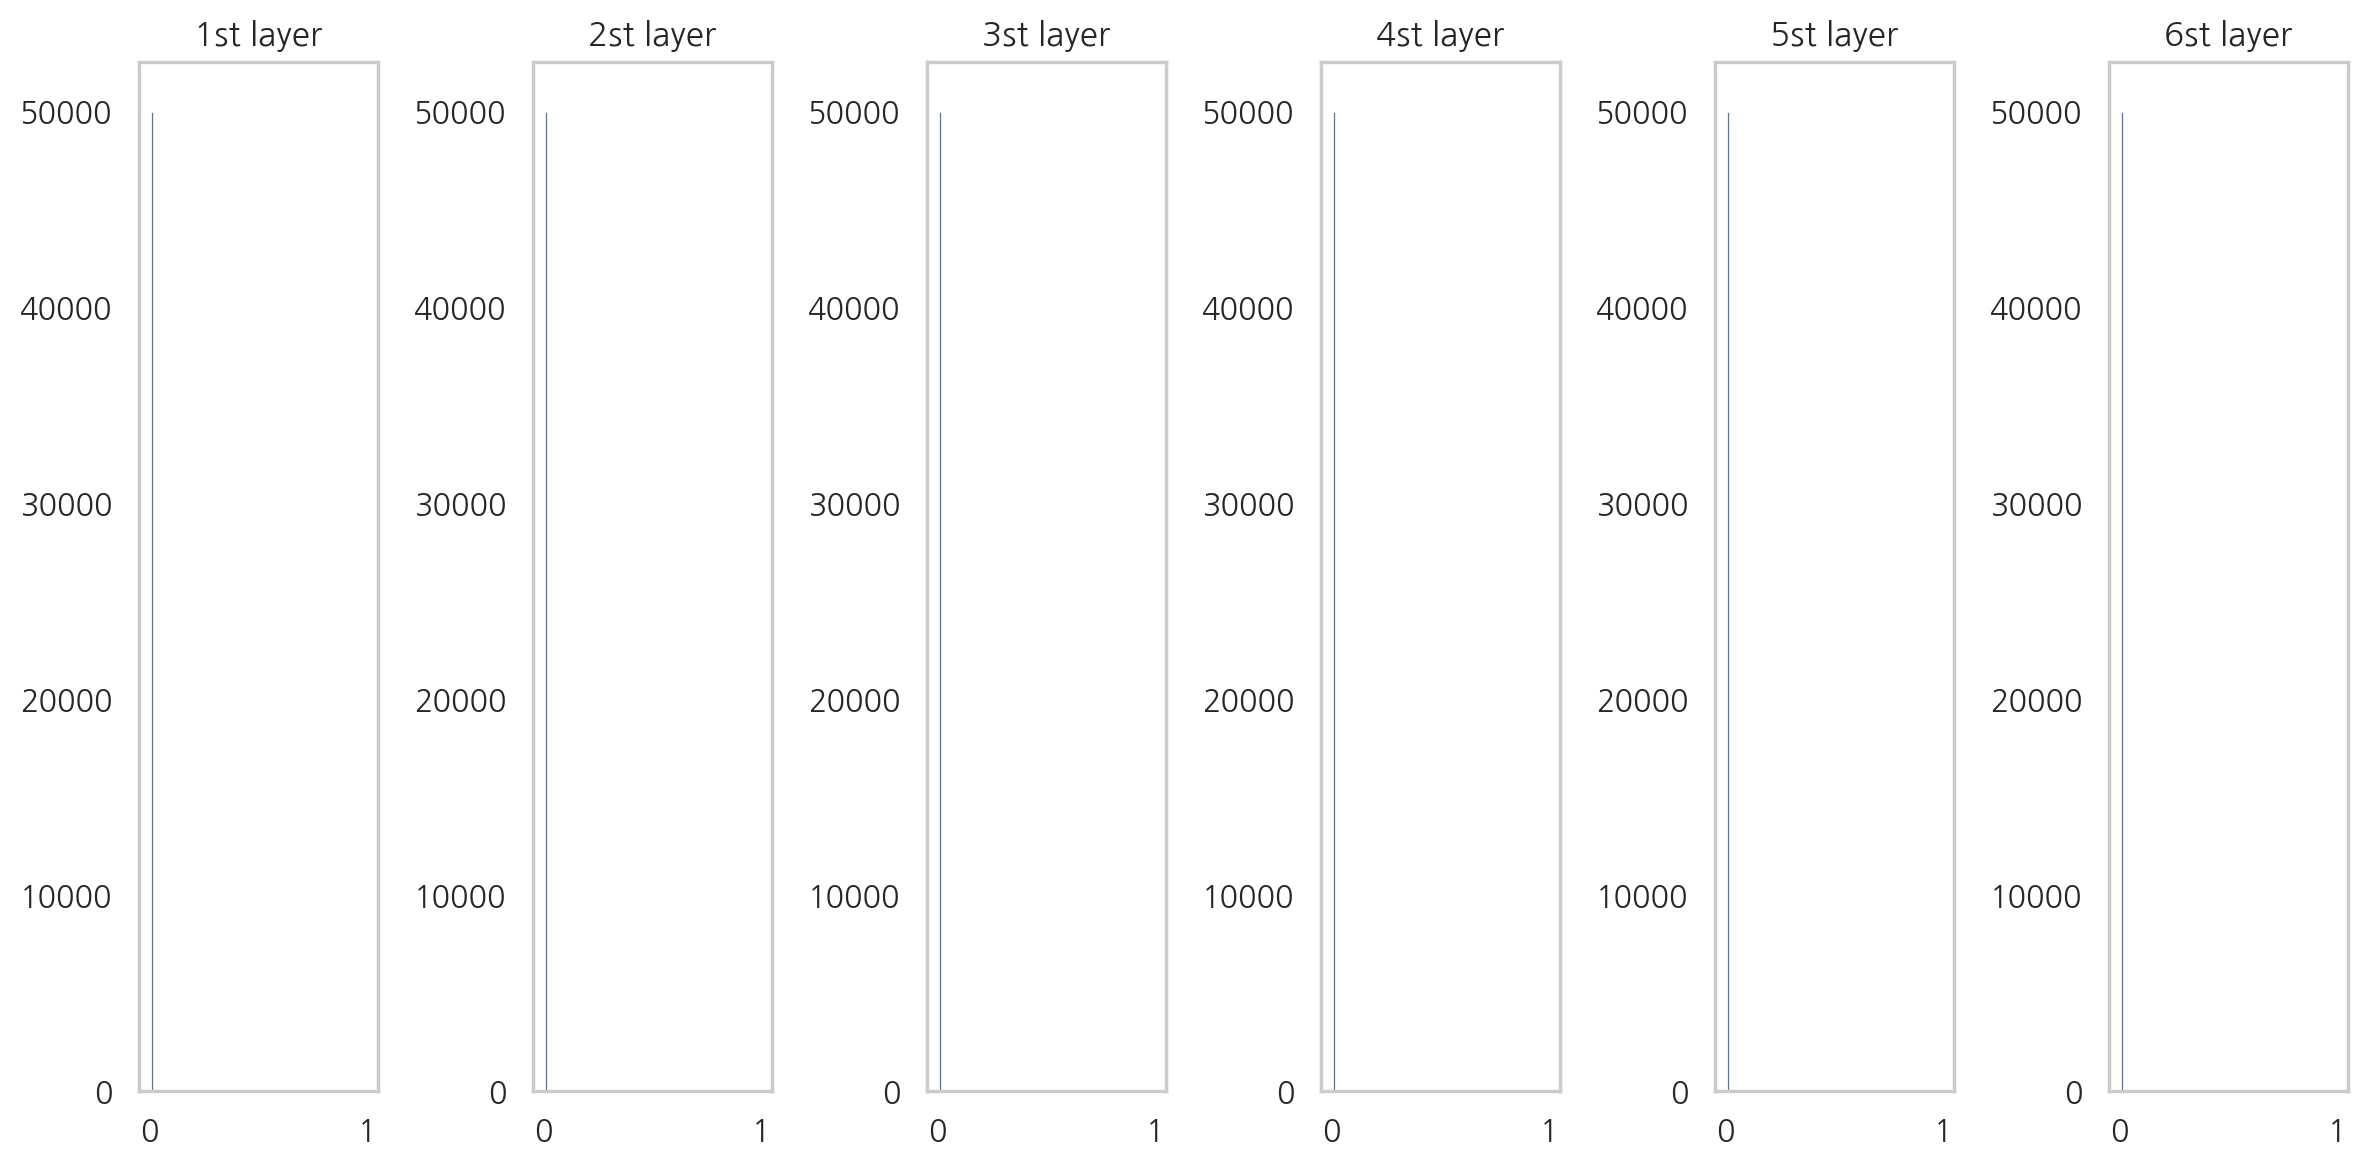

In [42]:
plt.figure(figsize=(12, 6))

for i, a in activation_values.items() : 
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i+1) + "st layer")
    plt.hist(a.flatten(), bins=50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.grid(False)
    
plt.tight_layout()
plt.show() ; 

## 10-7.  비선형 함수에서 가중치 초기화 - 초기값: 정규분포(Nomalization)
- 활성화함수 : ReLU

In [44]:
def relu(x) : 
    
    return np.maximum(0, x)

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers) : 
    if i != 0 : 
        x = activation_values[i-1]
    
    w = np.random.randn(nodes, nodes)
    a = np.dot(x, w)
    z = relu(a)
    activation_values[i] = z

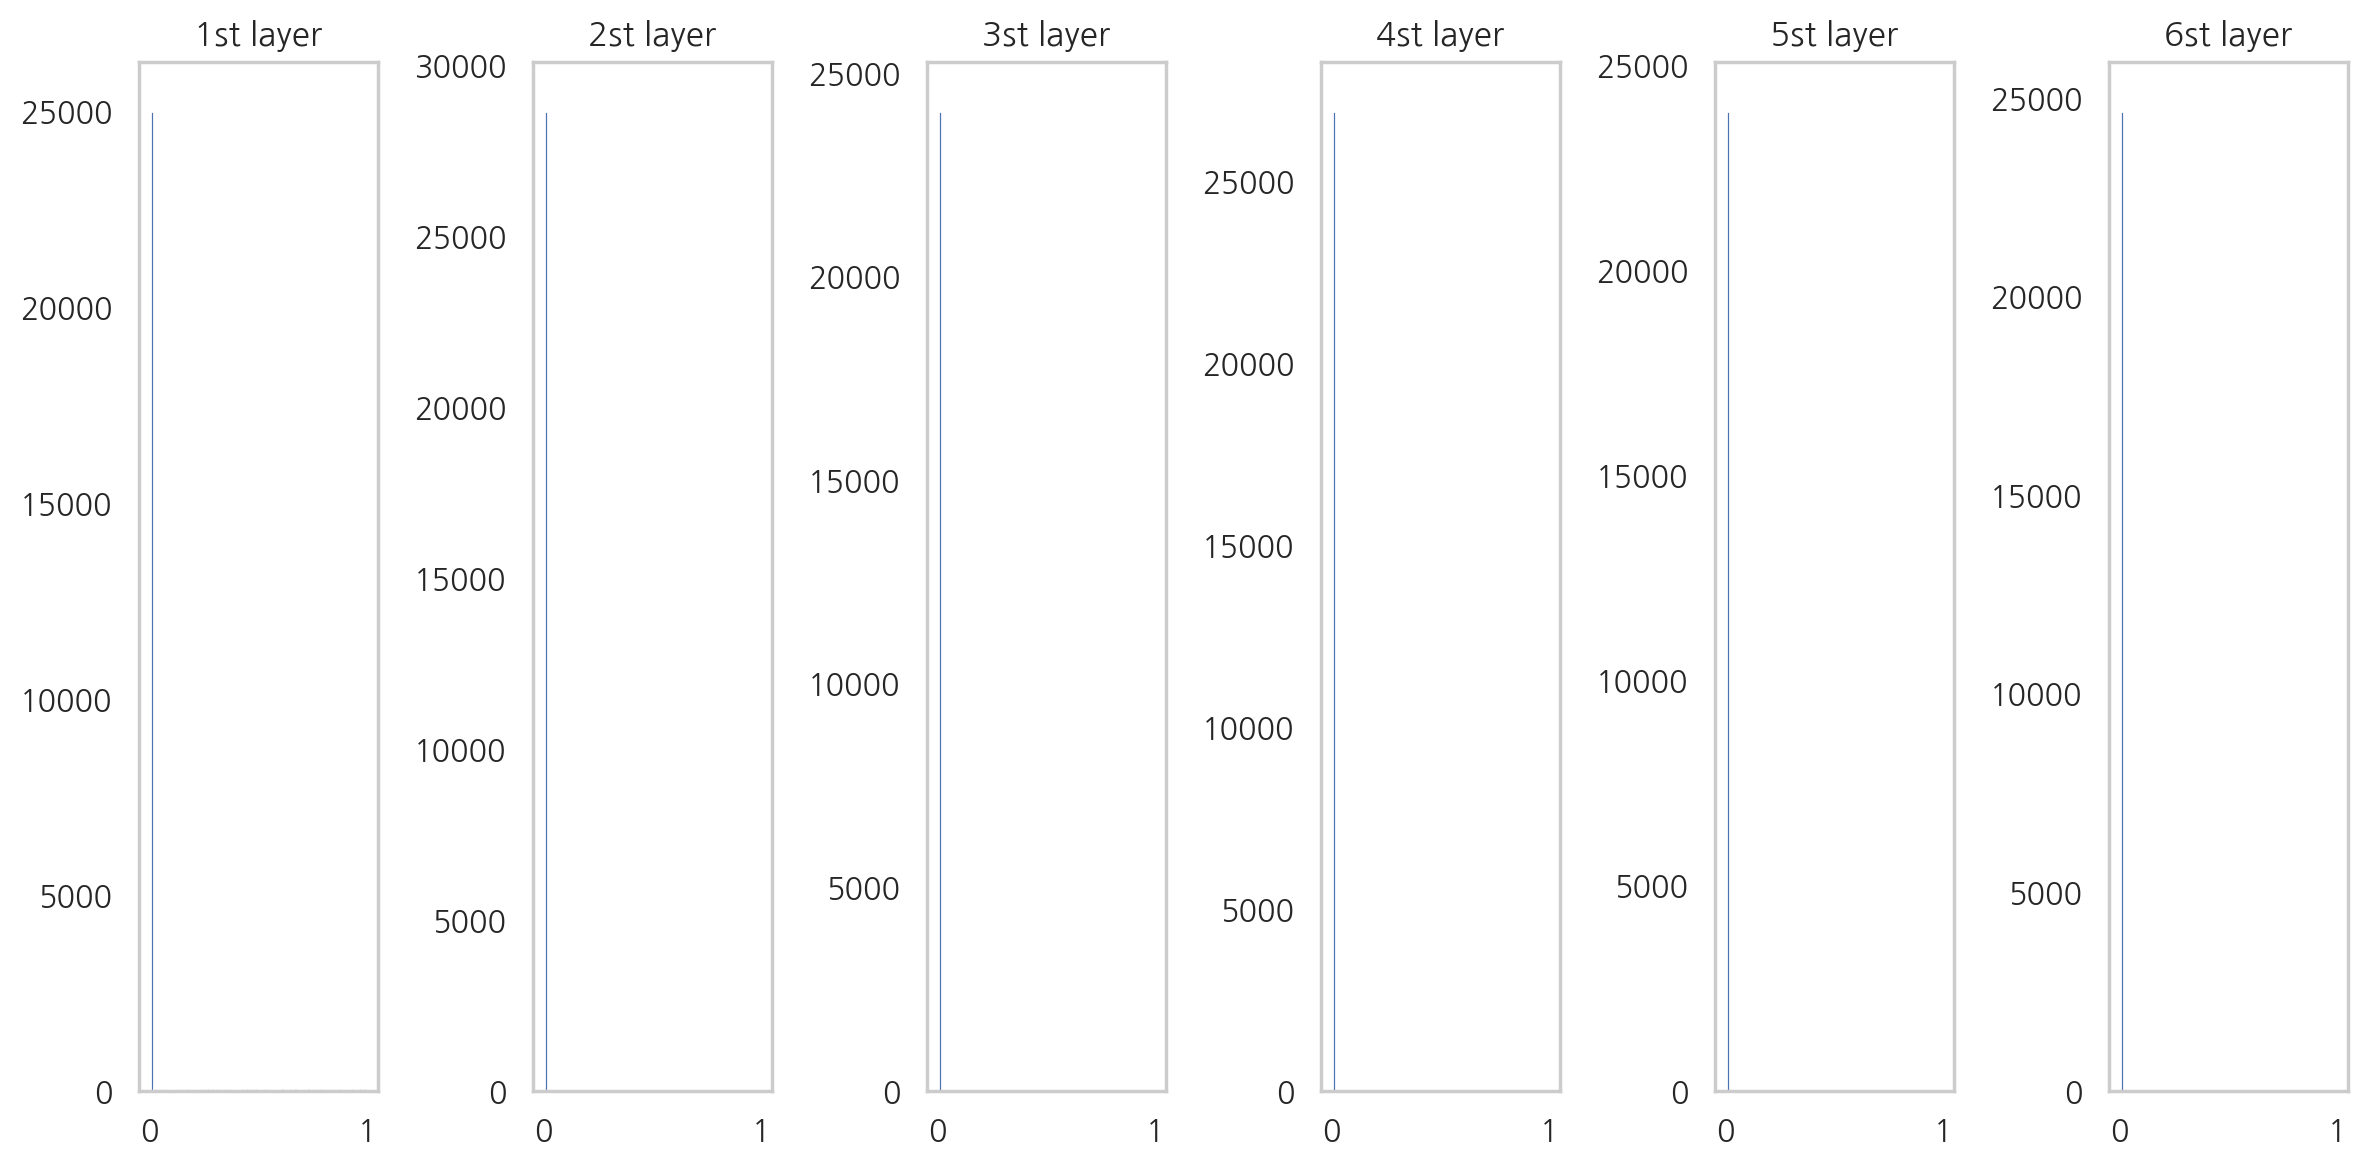

In [45]:
plt.figure(figsize=(12, 6))

for i, a in activation_values.items() : 
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i+1) + "st layer")
    plt.hist(a.flatten(), bins=50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.grid(False)
    
plt.tight_layout()
plt.show() ; 

#### 표준편차 0.01을 적용한 경우

In [46]:
def relu(x) : 
    
    return np.maximum(0, x)

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers) : 
    if i != 0 : 
        x = activation_values[i-1]
    
    w = np.random.randn(nodes, nodes) * 0.01
    a = np.dot(x, w)
    z = relu(a)
    activation_values[i] = z

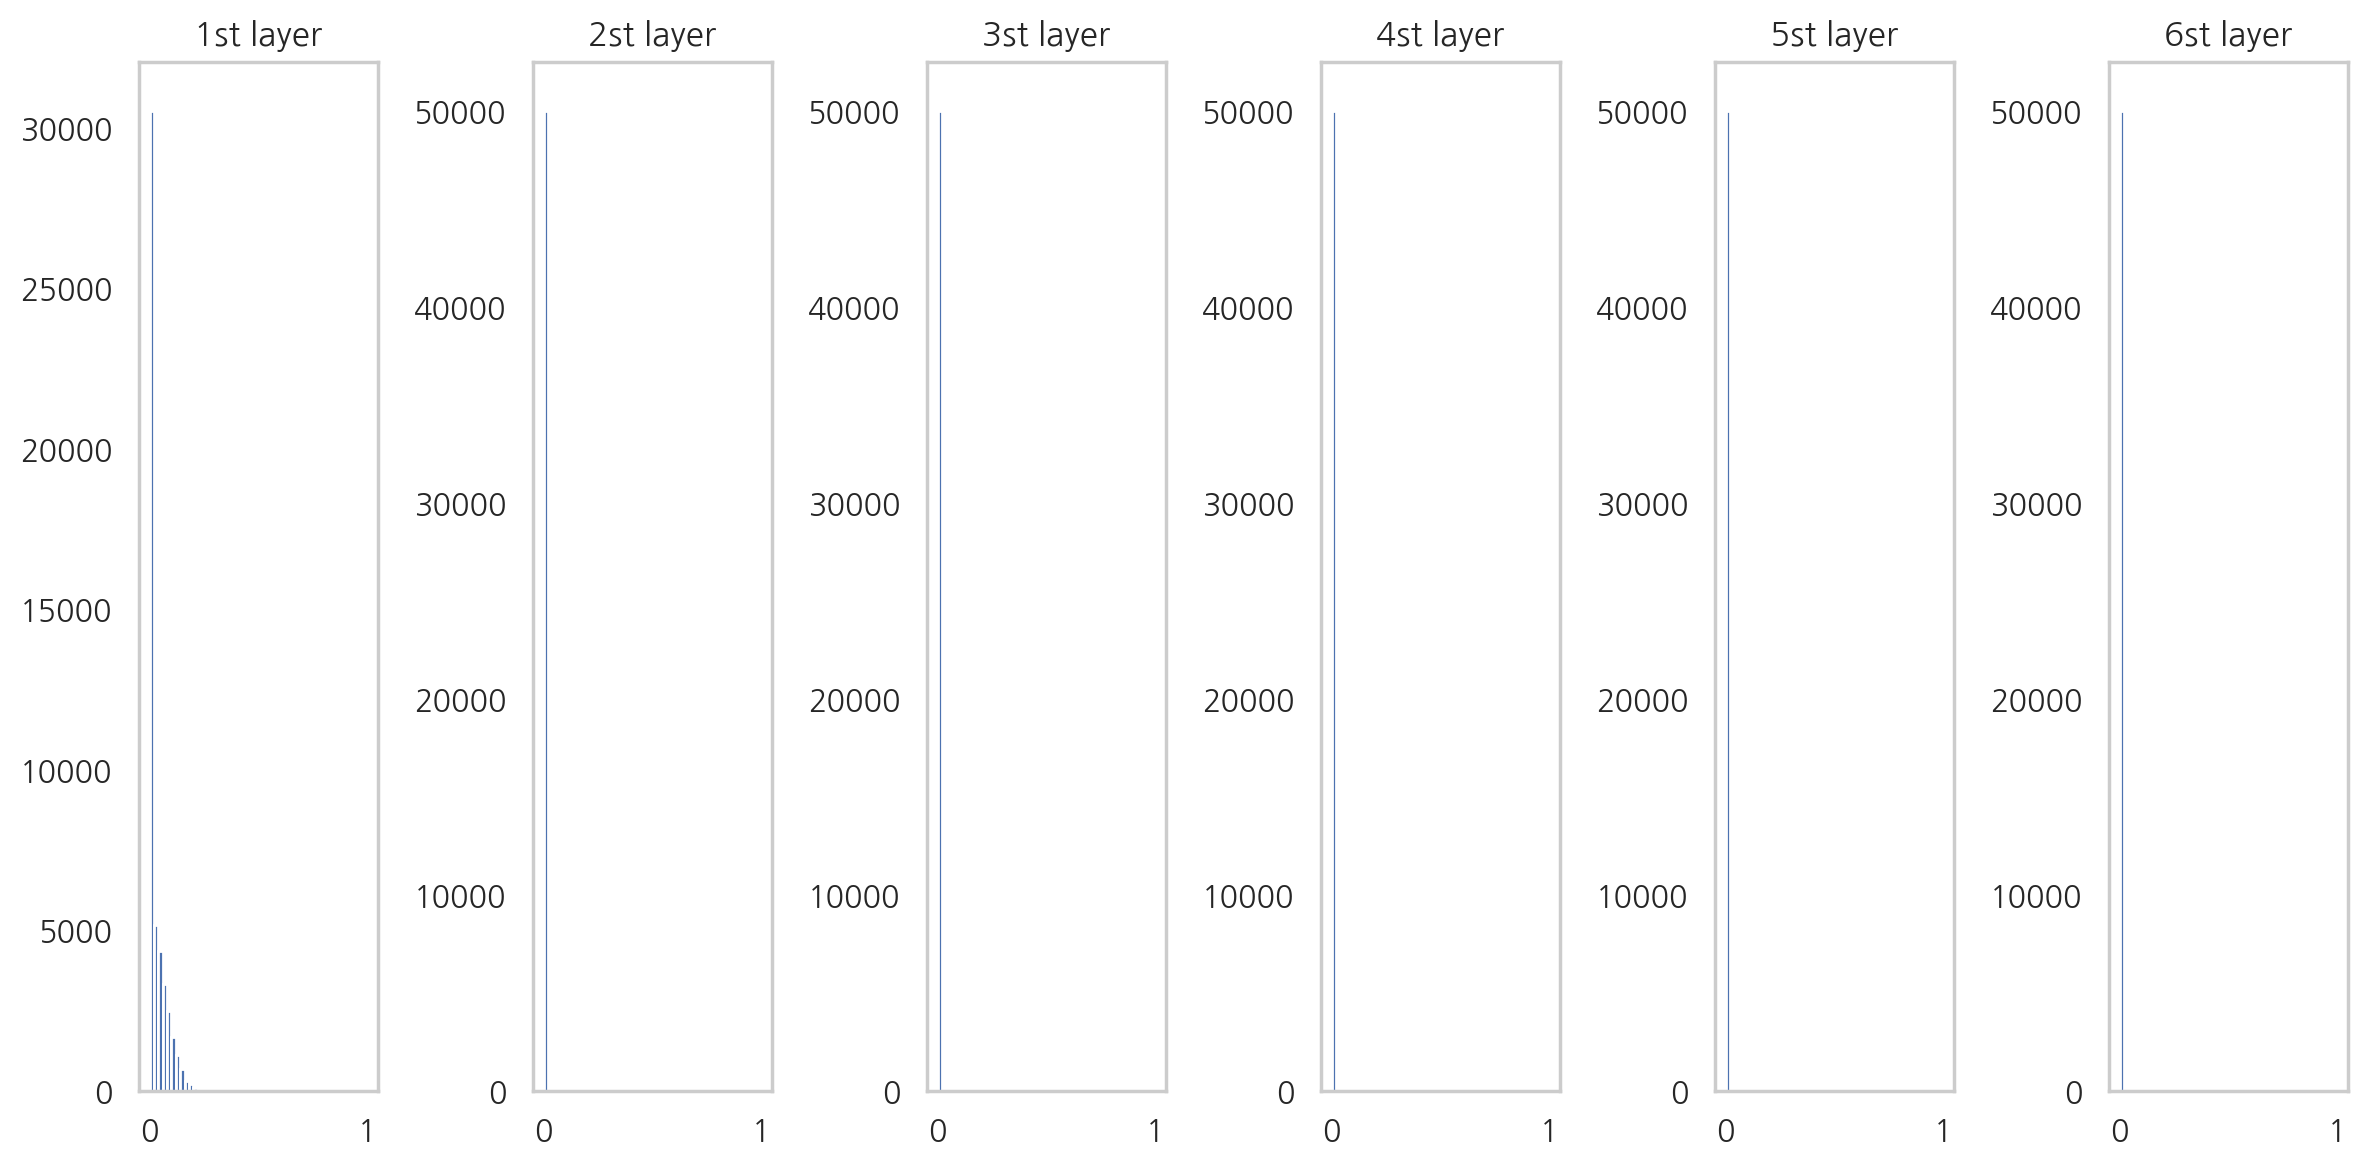

In [47]:
plt.figure(figsize=(12, 6))

for i, a in activation_values.items() : 
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i+1) + "st layer")
    plt.hist(a.flatten(), bins=50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.grid(False)
    
plt.tight_layout()
plt.show() ; 

## 10-8. 비선형 함수에서 가중치 초기화 - 초기값 : Xavier (Glorot)

In [48]:
def relu(x) : 
    
    return np.maximum(0, x)

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers) : 
    if i != 0 : 
        x = activation_values[i-1]
    
    w = np.random.randn(nodes, nodes) / np.sqrt(nodes)
    a = np.dot(x, w)
    z = relu(a)
    activation_values[i] = z

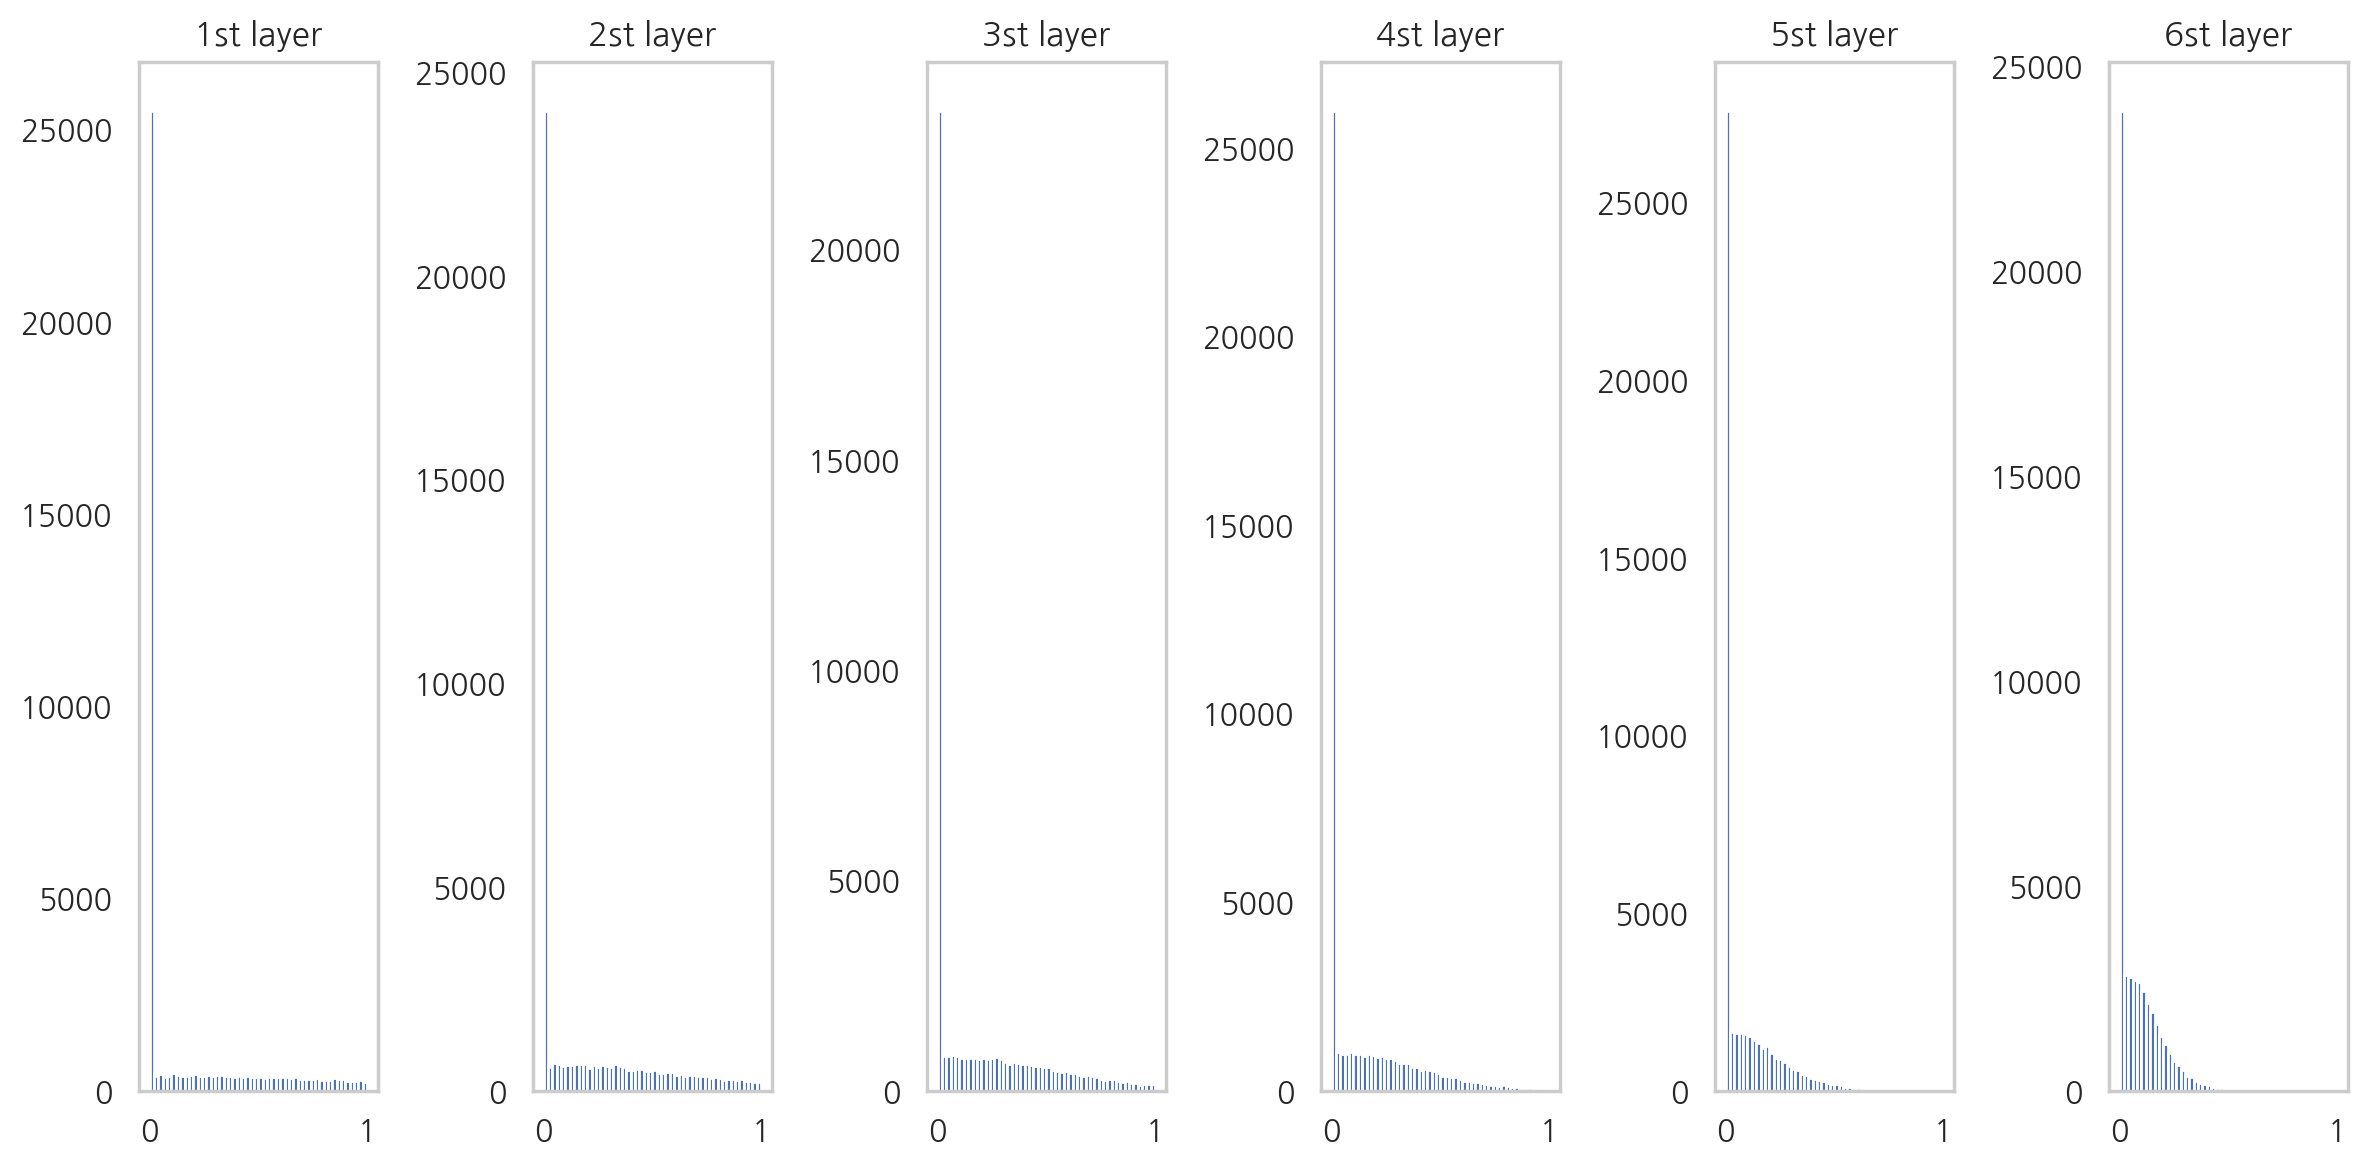

In [49]:
plt.figure(figsize=(12, 6))

for i, a in activation_values.items() : 
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i+1) + "st layer")
    plt.hist(a.flatten(), bins=50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.grid(False)
    
plt.tight_layout()
plt.show() ; 

## 10-8. 비선형 함수에서 가중치 초기화 - 초기값 : He (허)
- 표준편차가 $\sqrt{\frac{2}{n}}$인 분포
- 활성화값 분포가 균일하게 분포되어 있음
- 활성화함수가 ReLU와 같은 **비선형**함수 일 때 더 적합하다고 알려진 분포

In [50]:
def relu(x) : 
    
    return np.maximum(0, x)

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers) : 
    if i != 0 : 
        x = activation_values[i-1]
    
    w = np.random.randn(nodes, nodes) * np.sqrt(2 / nodes)
    a = np.dot(x, w)
    z = relu(a)
    activation_values[i] = z

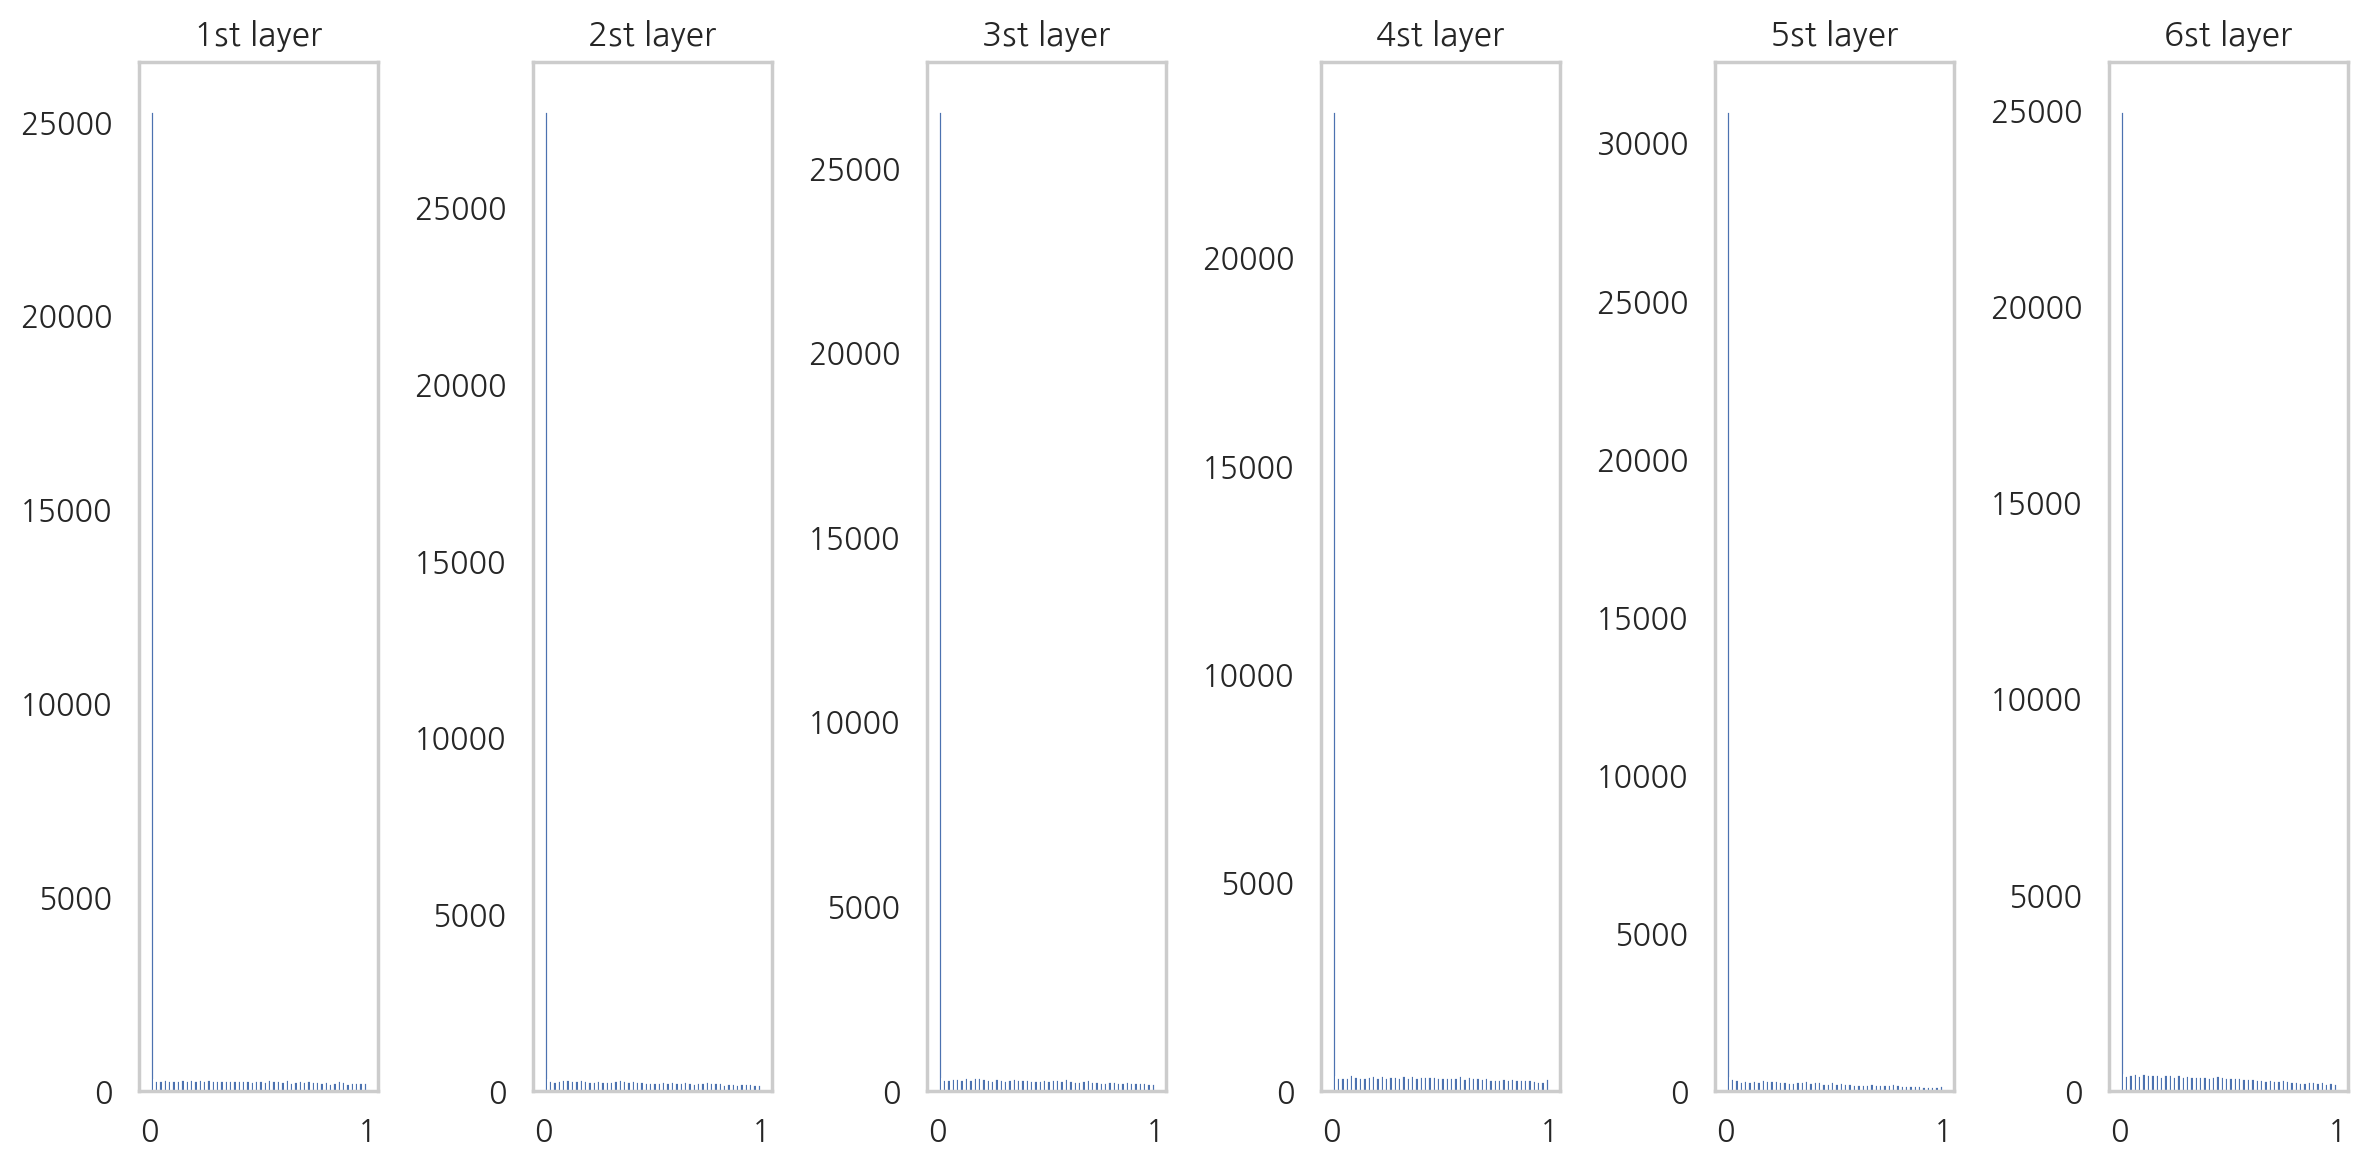

In [51]:
plt.figure(figsize=(12, 6))

for i, a in activation_values.items() : 
    plt.subplot(1, len(activation_values), i + 1)
    plt.title(str(i+1) + "st layer")
    plt.hist(a.flatten(), bins=50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.grid(False)
    
plt.tight_layout()
plt.show() ; 

## 10-9. 가중치 초기화 전략

- Glorot Initialization (Xavier)
  - 활성화 함수  
    - 없음
    - tanh
    - sigmoid
    - softmax
   - w = np.random.randn(nodes, nodes) / np.sqrt(nodes)

- He Initialization 
  - 활성화 함수  
    - ReLU
    - LeakyReLU
    - ELU 등
   - w = np.random.randn(nodes, nodes) * np.sqrt(2 / nodes)

```
<Note>
- weights_initialization에 사용하면 좋은 조합들
```
    

## 10-10. keras를 사용하여 weight initializer 설정 가능
- kernel_initailizer 인수 설정
- layer로 activation layer를 사용할 수 있다. 
   - LeakyReLu

In [53]:
from tensorflow.keras.layers import Dense, Activation, LeakyReLU
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(30, kernel_initializer="he_normal", input_shape=(10, 10)),
    LeakyReLU(alpha=0.2),
    Dense(1, kernel_initializer="he_normal"),
    Activation("softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10, 30)            330       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10, 30)            0         
                                                                 
 dense_1 (Dense)             (None, 10, 1)             31        
                                                                 
 activation (Activation)     (None, 10, 1)             0         
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


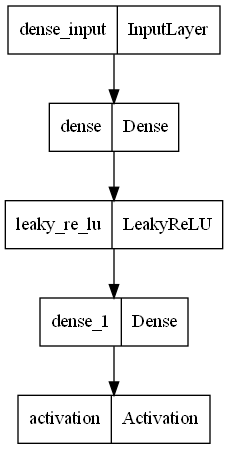

In [58]:
from tensorflow.keras.utils import plot_model

plot_model(model)

# 11. 배치 정규화 (Batch Normalization)

- 모델에 주입되는 샘플들을 균일하게 만드는 방법
- 가중치의 활성화값이 적당히 퍼지게끔 '강제'로 적용시키는 것
- 미니배치 단위로 데이터의 평균이 0, 표준편차가 1로 정규화
- 학습을 빨리 진행할 수 있음
- 학습 후 새로운 데이터에 잘 일반화 할 수 있도록 도와줌
- 초기값에 크게 의존하지 않아도 됨
- 과대적합 방지
- 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 layer에 들어갔다는 보장이 없음
- 주로 **Dense** 또는 **Conv2D** Layer 후, **활성화 함수**이전에 놓임

![](https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2018-01-23-at-2.27.20-PM.png)

```
<Note>
- 매우 강력한 기능이다.
   - 초기값 의존 x
   - 과대적합 방지
   - 학습 속도 증가
```

In [61]:
from tensorflow.keras.layers import BatchNormalization, Dense, Activation
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Dense(32, input_shape=(28 * 28, ), kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
Total params: 25,248
Trainable params: 25,184
Non-trainable params: 64
_________________________________________________________________


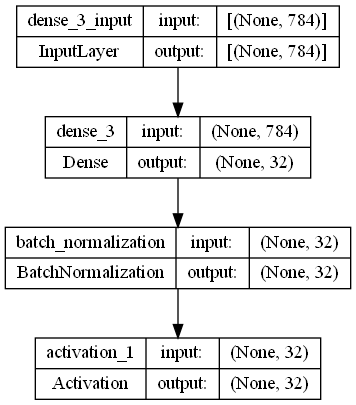

In [63]:
plot_model(model, show_shapes=True)

# 12. 규제화(Regularization) - 가중치 감소

- 과대적합(Overfitting, 오버피팅)을 방지하는 방법 중 하나
- 과대적합은 가중치의 매개변수 값이 커서 발생하는 경우가 많음  
  이를 방지하기 위해 **큰 가중치 값에 큰 규제를 가하는 것**
- 규제란 가중치의 절댓값을 가능한 작게 만드는 것으로, 가중치의 모든 원소를 0에 가깝게 하여 모든 특성이 출력에 주는 영향을 최소한으로 만드는 것(기울기를 작게 만드는 것)을 의미
- 가중치의 분포가 더 균일하게 됨
- 복잡한 네트워크 일수록 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 함
- 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미
- 적절한 규제값을 찾는 것이 중요

- 네트워크 손실함수에 큰 가중치와 연관된 비용을 추가
  - L1 규제: 가중치의 절댓값에 비례하는 비용이 추가
  - L2 규제: 가중치의 제곱에 비례하는 비용이 추가(흔히 가중치 감쇠라고도 불림)
  - 위 두 규제가 합쳐진 경우도 존재


## 12-1. L2 규제

- `가중치의 제곱합`
- 손실 함수일정 값을 더함으로써 과적합을 방지
- $\lambda$ 값이 크면 가중치 감소가 커지고, 작으면 가하는 규제가 적어진다.
- `더 Robust한 모델을 생성하므로 L1보다 많이 사용됨`

  $\qquad Cost = \frac{1}{n} \sum{^n}_{i=1} {L(y_i, \hat{y_i}) + \frac{\lambda}{2}w^2}$

  $\quad L(y_i, \hat{y_i})$ : 기존 Cost Function

### 영화평가 데이터로 실험
- 모델에 l2 규제 적용

In [76]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 16)                160016    
                                                                 
 dense_20 (Dense)            (None, 16)                272       
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


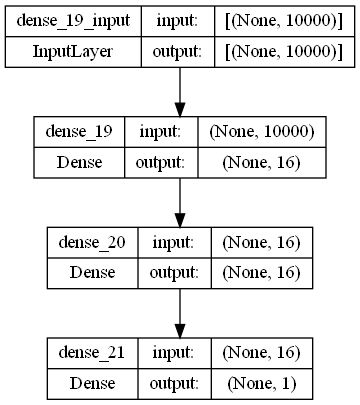

In [96]:
l2_model = Sequential([
    Dense(16, kernel_regularizer=l2(0.001), activation="relu", input_shape=(10000,)),
    Dense(16, kernel_regularizer=l2(0.001), activation="relu"),
    Dense(1, activation="sigmoid")
])

l2_model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["acc"])

l2_model.summary()

plot_model(l2_model, show_shapes=True)

In [97]:
l2_model_hist = l2_model.fit(x_train, 
                             y_train, 
                             epochs=20, 
                             batch_size=512, 
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 52ms/step - loss: 0.5048 - acc: 0.8150 - val_loss: 0.3806 - val_acc: 0.8806
Epoch 2/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3133 - acc: 0.9072 - val_loss: 0.3365 - val_acc: 0.8874
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2684 - acc: 0.9219 - val_loss: 0.3442 - val_acc: 0.8799
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2509 - acc: 0.9271 - val_loss: 0.3554 - val_acc: 0.8760
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2350 - acc: 0.9356 - val_loss: 0.3391 - val_acc: 0.8849
Epoch 6/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2279 - acc: 0.9382 - val_loss: 0.3861 - val_acc: 0.8665
Epoch 7/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2229 - acc: 0.9394 - val_loss: 0.3786 - val_acc: 0.8736
Epoch 8/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2152 - a

### epoch와 val_loss 그래프
- l2 규제를 적용한 모델의 val_loss가 기본 모델보다 더 낮다.

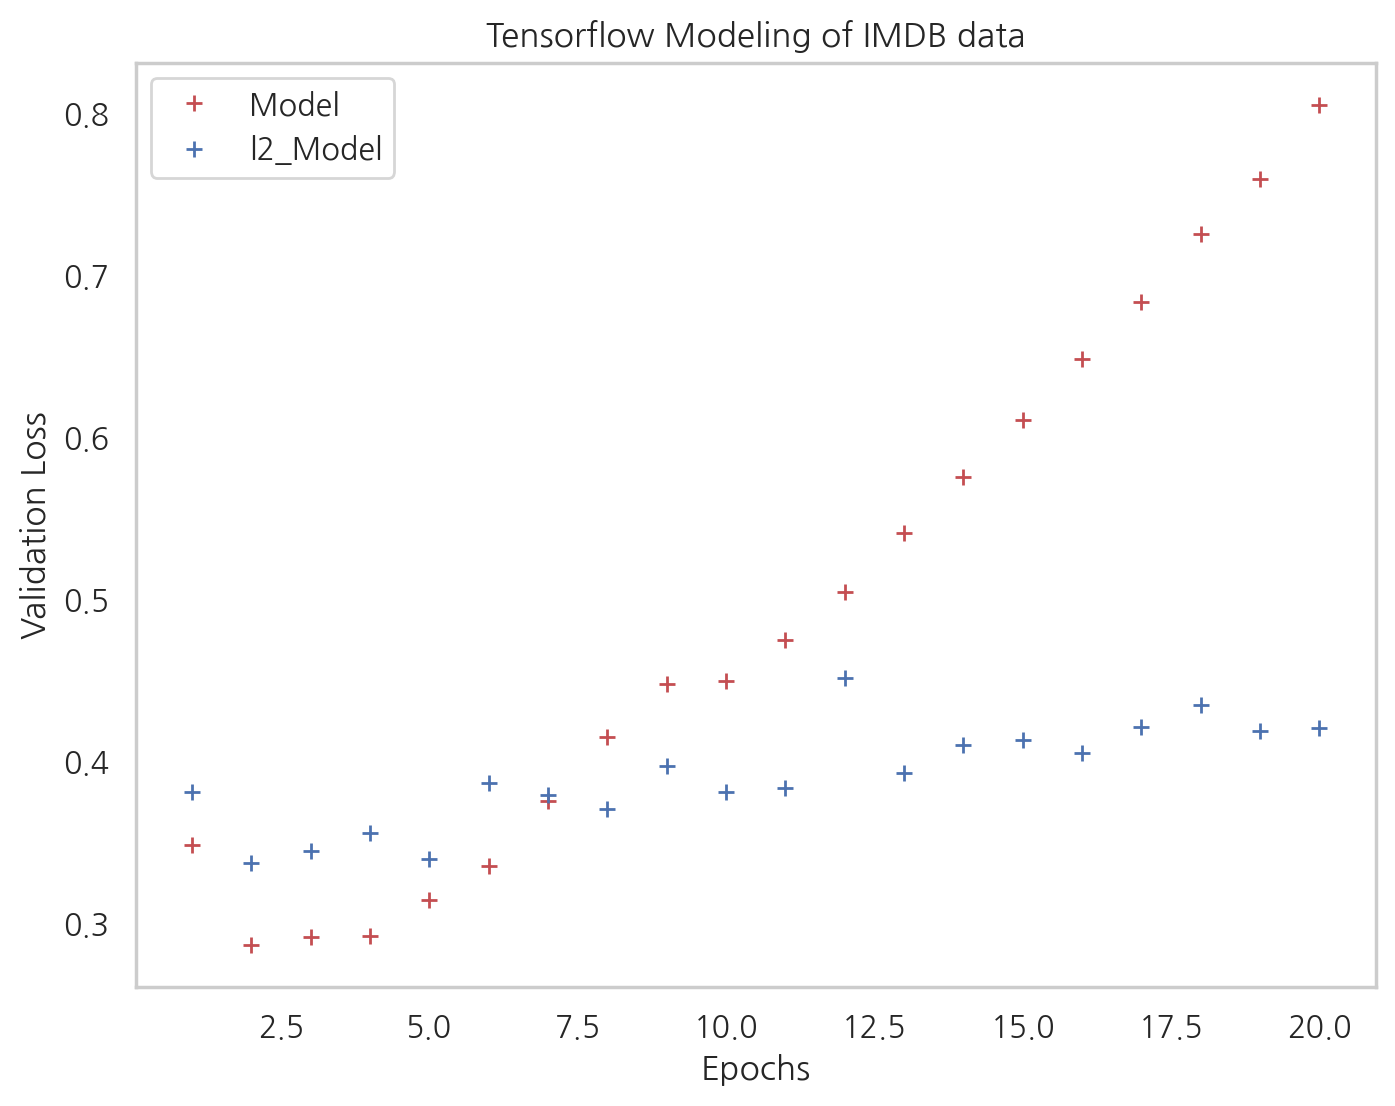

In [98]:
l2_model_val_loss = l2_model_hist.history["val_loss"]
epochs = range(1, 21)

plt.figure(figsize=(8, 6))
plt.plot(epochs, model_val_loss, "r+", label="Model")
plt.plot(epochs, l2_model_val_loss, "b+", label="l2_Model")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Tensorflow Modeling of IMDB data")
plt.legend()
plt.grid(False)
plt.show() ; 

## 12-2. L1 규제

- `가중치의 절대값합`
- L2 규제와 달리 어떤 가중치는 0이 되는데 이는 모델이 가벼워짐을 의미

  $\qquad Cost = \frac{1}{n} \sum{^n}_{i=1} {L(y_i, \hat{y_i}) + \frac{\lambda}{2}|w|}$

  $\quad L(y_i, \hat{y_i})$ : 기존 Cost Function
  
```
<Note>
- l1 규제값은 l2 규제값 보다 더 작다.
- 0.0001 
```

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 16)                160016    
                                                                 
 dense_26 (Dense)            (None, 16)                272       
                                                                 
 dense_27 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


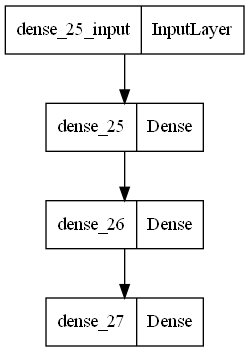

In [101]:
l1_model = Sequential([
    Dense(16, kernel_regularizer=l1(0.0001), activation="relu", input_shape=(10000,)),
    Dense(16, kernel_regularizer=l1(0.0001), activation="relu"),
    Dense(1, activation="sigmoid")
])

l1_model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["acc"])

l1_model.summary()

plot_model(l1_model)

In [102]:
l1_model_hist = l1_model.fit(x_train,
                         y_train,
                         epochs=20,
                         batch_size=512,
                         validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 26ms/step - loss: 0.5665 - acc: 0.8111 - val_loss: 0.4274 - val_acc: 0.8761
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 0.3759 - acc: 0.8932 - val_loss: 0.3756 - val_acc: 0.8869
Epoch 3/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3354 - acc: 0.9052 - val_loss: 0.3612 - val_acc: 0.8897
Epoch 4/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3188 - acc: 0.9116 - val_loss: 0.3618 - val_acc: 0.8875
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.3074 - acc: 0.9164 - val_loss: 0.3906 - val_acc: 0.8763
Epoch 6/20
49/49 [==============================] - 1s 13ms/step - loss: 0.3006 - acc: 0.9163 - val_loss: 0.4334 - val_acc: 0.8580
Epoch 7/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2962 - acc: 0.9204 - val_loss: 0.3725 - val_acc: 0.8843
Epoch 8/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2913 - a

### epoch와 val_loss 그래프
- 기본 모델보다 l1, l2 규제를 적용한 모델의 val_loss가 대체로 더 낮다.
- l1 규제 모델 보다 l2 규제 모델의 val_loss가 좀 더 낮다.

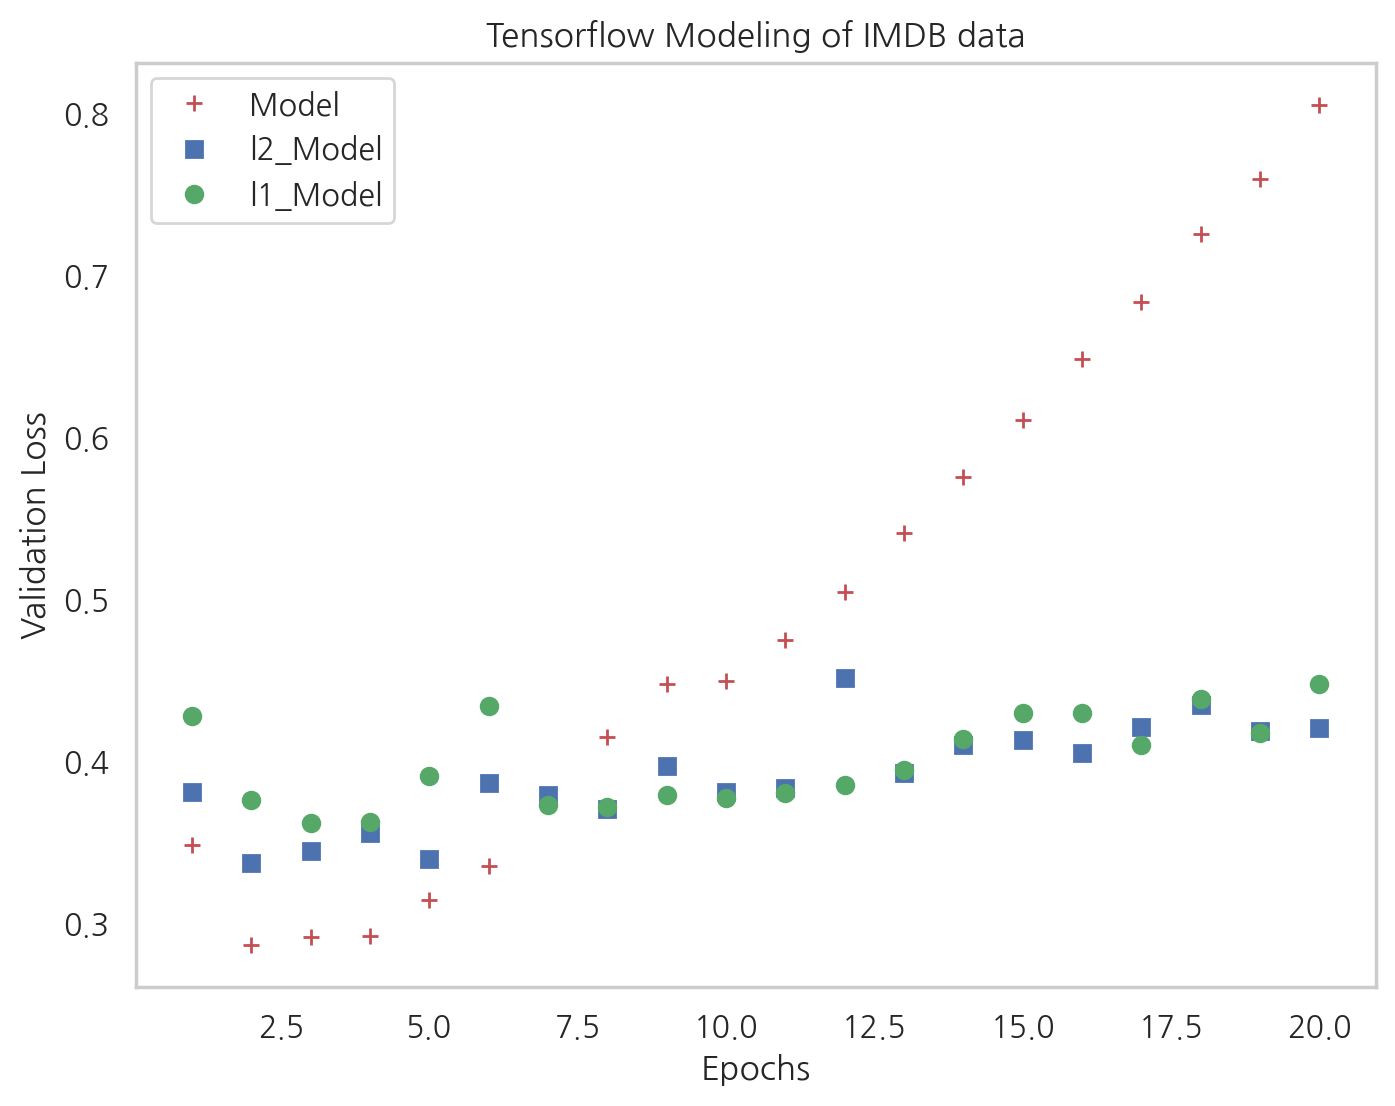

In [106]:
l1_model_val_loss = l1_model_hist.history["val_loss"]
epochs = range(1, 21)

plt.figure(figsize=(8, 6))
plt.plot(epochs, model_val_loss, "r+", label="Model")
plt.plot(epochs, l2_model_val_loss, "bs", label="l2_Model")
plt.plot(epochs, l1_model_val_loss, "go", label="l1_Model")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Tensorflow Modeling of IMDB data")
plt.legend()
plt.grid(False)
plt.show() ; 

## 12-3. L1, L2 동시 규제
- l1은 가중치의 절대값합을 규제
- l2는 가중치의 제곱합을 규제

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 16)                160016    
                                                                 
 dense_34 (Dense)            (None, 16)                272       
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


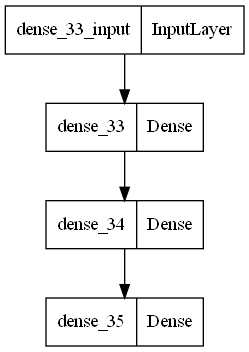

In [111]:
l1_l2_model = Sequential([
    Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), 
          activation="relu", input_shape=(10000, )),
    Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), activation="relu"),
    Dense(1, activation="sigmoid")
])

l1_l2_model.compile(optimizer="rmsprop",
                   loss="binary_crossentropy",
                   metrics=["acc"])

l1_l2_model.summary()
plot_model(l1_l2_model)

In [112]:
l1_l2_model_hist = l1_l2_model.fit(x_train,
                                   y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 53ms/step - loss: 0.6005 - acc: 0.8166 - val_loss: 0.4677 - val_acc: 0.8668
Epoch 2/20
49/49 [==============================] - 1s 17ms/step - loss: 0.4068 - acc: 0.8823 - val_loss: 0.3892 - val_acc: 0.8822
Epoch 3/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3539 - acc: 0.8944 - val_loss: 0.3673 - val_acc: 0.8837
Epoch 4/20
49/49 [==============================] - 1s 13ms/step - loss: 0.3321 - acc: 0.9019 - val_loss: 0.3594 - val_acc: 0.8871
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.3199 - acc: 0.9082 - val_loss: 0.3835 - val_acc: 0.8775
Epoch 6/20
49/49 [==============================] - 1s 13ms/step - loss: 0.3115 - acc: 0.9119 - val_loss: 0.3775 - val_acc: 0.8768
Epoch 7/20
49/49 [==============================] - 1s 13ms/step - loss: 0.3044 - acc: 0.9151 - val_loss: 0.3738 - val_acc: 0.8795
Epoch 8/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2982 - a

### eopch와 val_loss 그래프
- l1_l2 규제를 모두 적용한 모델의 val_loss 값이 가장 낮다.

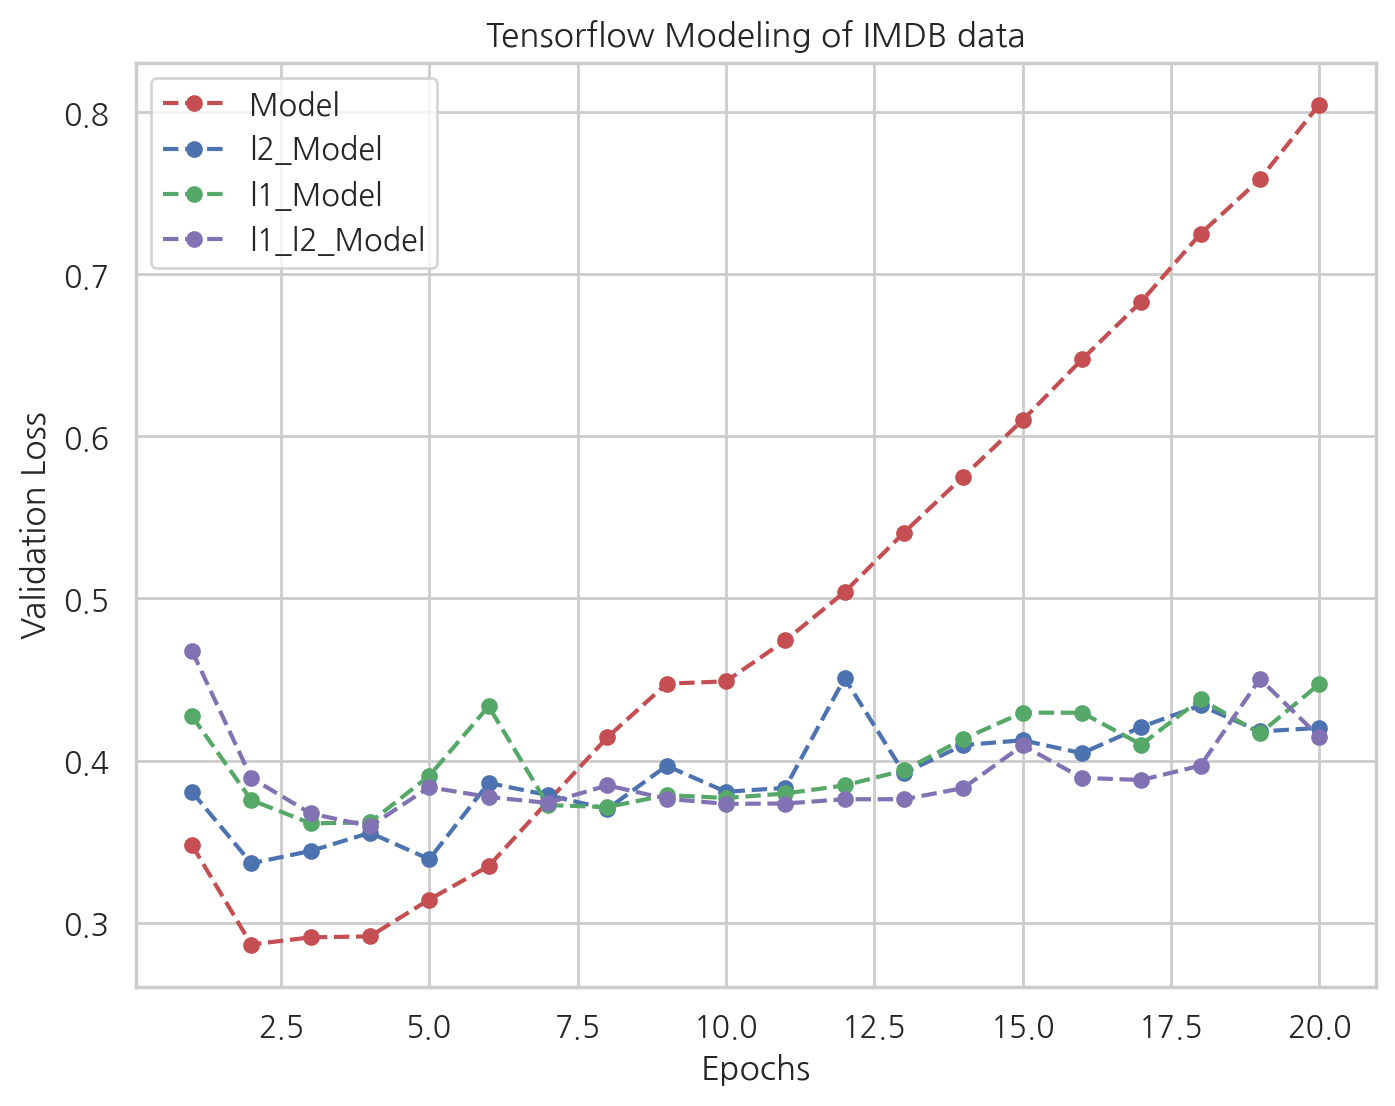

In [119]:
l1_l2_model_val_loss = l1_l2_model_hist.history["val_loss"]
epochs = range(1, 21)

plt.figure(figsize=(8, 6))
plt.plot(epochs, model_val_loss, "ro--", ms=5, label="Model")
plt.plot(epochs, l2_model_val_loss, "bo--", ms=5, label="l2_Model")
plt.plot(epochs, l1_model_val_loss, "go--", ms=5, label="l1_Model")
plt.plot(epochs, l1_l2_model_val_loss, "mo--", ms=5, label="l1_l2_Model")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Tensorflow Modeling of IMDB data")
plt.legend()
plt.show() ; 

# 13. 드롭아웃(Dropout)

- `신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법`
   - 모델 축소
   - 가중치 초기화
   - 배치 정규화
   - 드롭 아웃
- 과적합을 방지하기 위한 방법
- `학습할 때 사용하는 노드의 수를 전체 노드 중에서 일부만을 사용`
- 신경망의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
  - 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면 **무작위로 0으로 바뀜** $\rightarrow$ [0, 3.2, 0.6, 0.8, 0]
  - `보통 0.2 ~ 0.5 사이의 비율로 지정됨`
- 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않고, 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌

  <img src="https://miro.medium.com/max/981/1*EinUlWw1n8vbcLyT0zx4gw.png" width="600">
  
```
<Note>
- Dense() 사이에 Dropout() 레이어를 배치한다.
```

In [120]:
from tensorflow.keras.layers import Dropout

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                160016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_37 (Dense)            (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_38 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


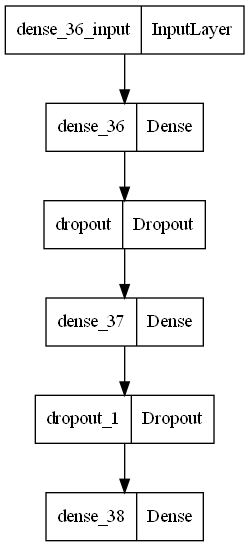

In [121]:
dropout_model = Sequential([
    Dense(16, activation="relu", input_shape=(10000,)),
    Dropout(0.5),
    Dense(16, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")    
])

dropout_model.compile(optimizer="rmsprop",
                     loss="binary_crossentropy",
                     metrics=["acc"])

dropout_model.summary()
plot_model(dropout_model)

In [122]:
dropout_model_hist = dropout_model.fit(x_train,
                                      y_train,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 36ms/step - loss: 0.6023 - acc: 0.6664 - val_loss: 0.4515 - val_acc: 0.8627
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.4566 - acc: 0.8004 - val_loss: 0.3342 - val_acc: 0.8820
Epoch 3/20
49/49 [==============================] - 1s 17ms/step - loss: 0.3648 - acc: 0.8561 - val_loss: 0.2929 - val_acc: 0.8878
Epoch 4/20
49/49 [==============================] - 1s 15ms/step - loss: 0.3029 - acc: 0.8894 - val_loss: 0.2799 - val_acc: 0.8870
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2646 - acc: 0.9068 - val_loss: 0.2811 - val_acc: 0.8879
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2263 - acc: 0.9217 - val_loss: 0.3009 - val_acc: 0.8831
Epoch 7/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2035 - acc: 0.9316 - val_loss: 0.3050 - val_acc: 0.8876
Epoch 8/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1854 - a

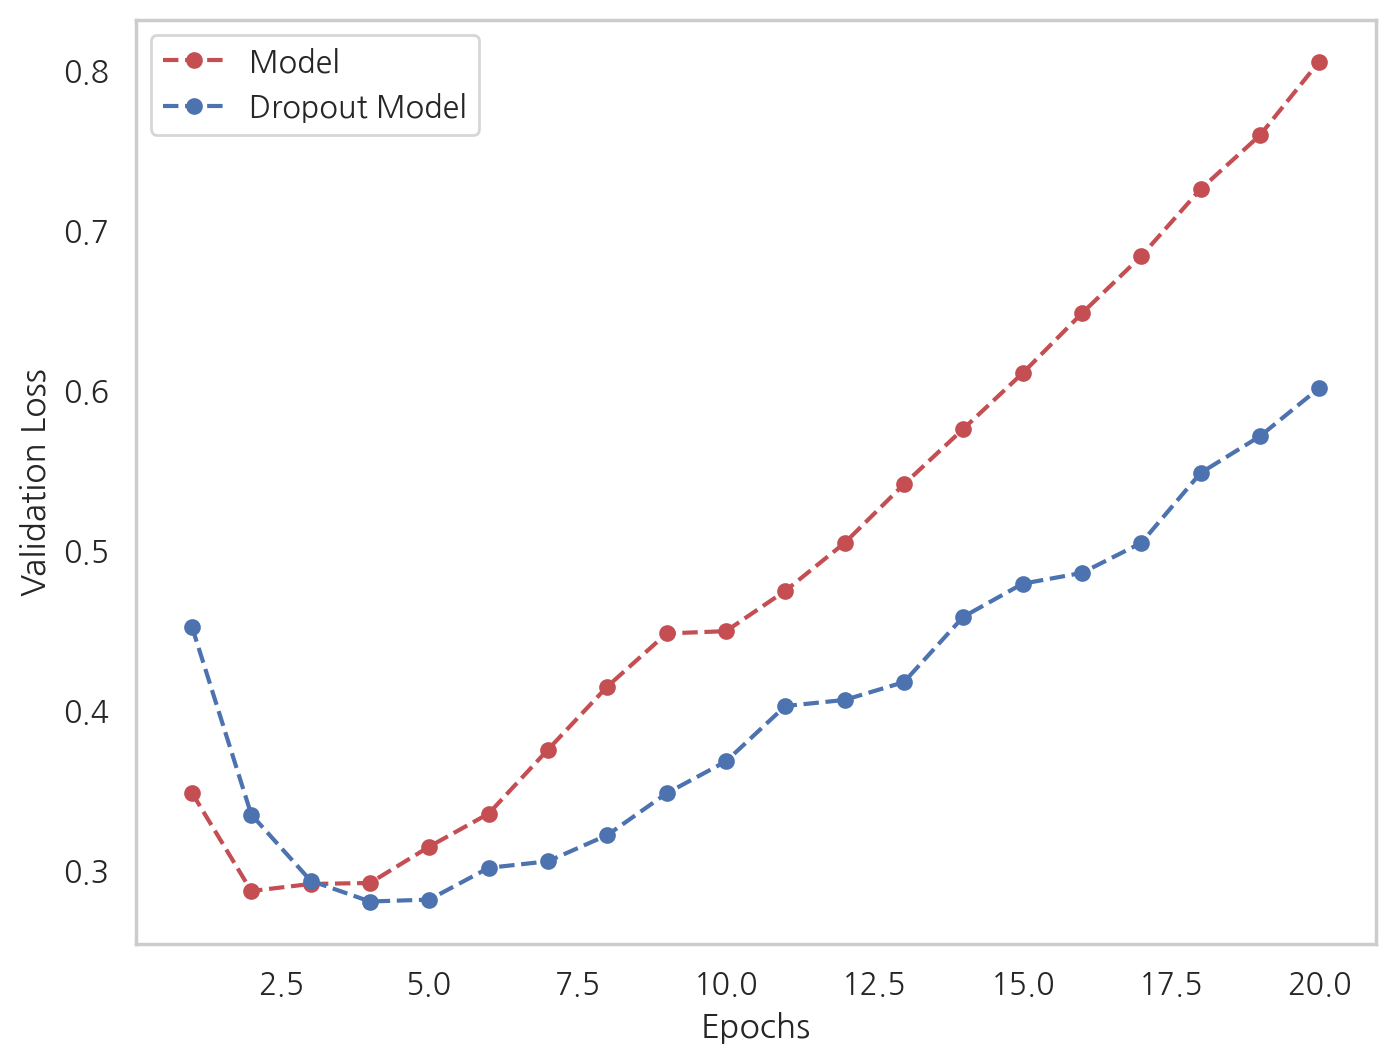

In [126]:
dropout_model_val_loss = dropout_model_hist.history["val_loss"]
epochs = range(1, 21)

plt.figure(figsize=(8, 6))
plt.plot(epochs, model_val_loss, "ro--", ms=5, label="Model")
plt.plot(epochs, dropout_model_val_loss, "bo--", ms=5, label="Dropout Model")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()
plt.show() ; 

# 14. 하이퍼 파라미터(Hyper Parameter)

- 사람이 직접 설정해야하는 매개변수
- 학습이 되기전 미리 설정되어 상수취급

## 14-1. 학습률(Learning Rate)
- 학습률에 따라 학습정도가 달라짐
- 적절한 학습률을 찾는 것이 핵심

## 14-2. 학습 횟수(Epochs)
- 학습 횟수를 너무 작게, 또는 너무 크게 지정하면 과소적합 또는 과대적합 발생
- 여러번 진행하면서 최적의 학습 횟수(epochs)값을 찾아야함

## 14-3. 미니배치 크기(Mini Batch Size)
- 미니 배치 학습
  - 한번 학습할 때 메모리의 부족현상을 막기 위해 전체 데이터의 일부를 여러번 학습하는 방식
- 한번 학습할 때마다 얼마만큼의 미니배치 크기를 사용할지 결정
- 배치 크기가 작을수록 학습 시간이 많이 소요되고, 클수록 학습 시간이 학습 시간은 적게 소요된다.  
  

## 14-4. 검증데이터(Validation Data)
- 주어진 데이터를 학습 + 검증 + 테스트 데이터로 구분하여 과적합을 방지
- 일반적으로 전체 데이터의 2~30%를 테스트 데이터, 나머지에서 20%정도를 검증용 데이터, 남은 부분을 학습용 데이터로 사용

  <img src="https://miro.medium.com/max/1400/1*4G__SV580CxFj78o9yUXuQ.png" width="600">


# 15. Fashion MNIST 모델 데이터 분석

<img src="https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png?hl=ko" width="500">


## 15-1. 모듈 임포트

In [130]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Activation
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split

## 15-2. 데이터 로드

In [220]:
(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train_full.shape, y_train_full.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [221]:
tf.random.set_seed(111)

x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                 y_train_full,
                                                 test_size=0.3,
                                                 random_state=111)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((42000, 28, 28), (18000, 28, 28), (42000,), (18000,))

In [222]:
print(f'''
* full train data : {x_train_full.shape}, full label data : {y_train_full.shape}
* full test data : {x_test.shape}, full label test data : {y_test.shape}
* split train data : {x_train.shape}, split label train data : {y_train.shape}
* split test data : {x_val.shape}, split label test data : {y_val.shape}
''')


* full train data : (60000, 28, 28), full label data : (60000,)
* full test data : (10000, 28, 28), full label test data : (10000,)
* split train data : (42000, 28, 28), split label train data : (42000,)
* split test data : (18000, 28, 28), split label test data : (18000,)



## 15-3. 데이터 확인

### 라벨 데이터 정리

In [223]:
label_mapper = {
    0 : "T-shirt/top ",
    1 : "Trouser",     
    2 : "Pullover",    
    3 : "Dress",       
    4 : "Coat",        
    5 : "Sandal",      
    6 : "Shirt",       
    7 : "Sneaker",     
    8 : "Bag",         
    9 : "Ankle boot"
}
label_mapper

{0: 'T-shirt/top ',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

### 데이터 이미지 확인

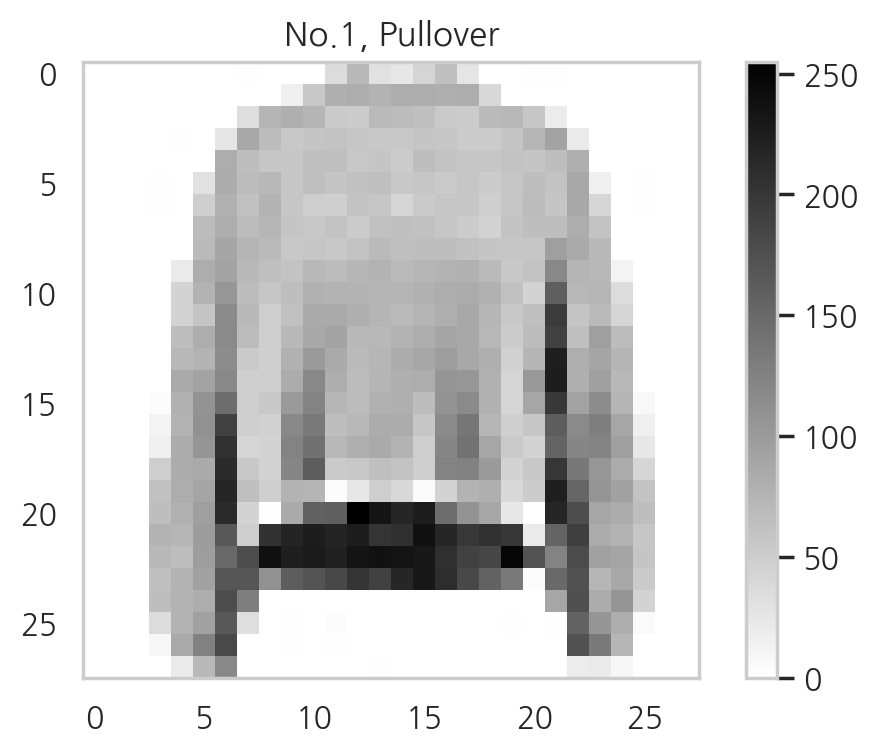

In [224]:
plt.figure(figsize=(6, 4))
plt.imshow(x_train[0], cmap="binary")
plt.colorbar()
plt.title(f"No.{1}, {label_mapper[y_train[0]]}")
plt.grid(False)
plt.show()

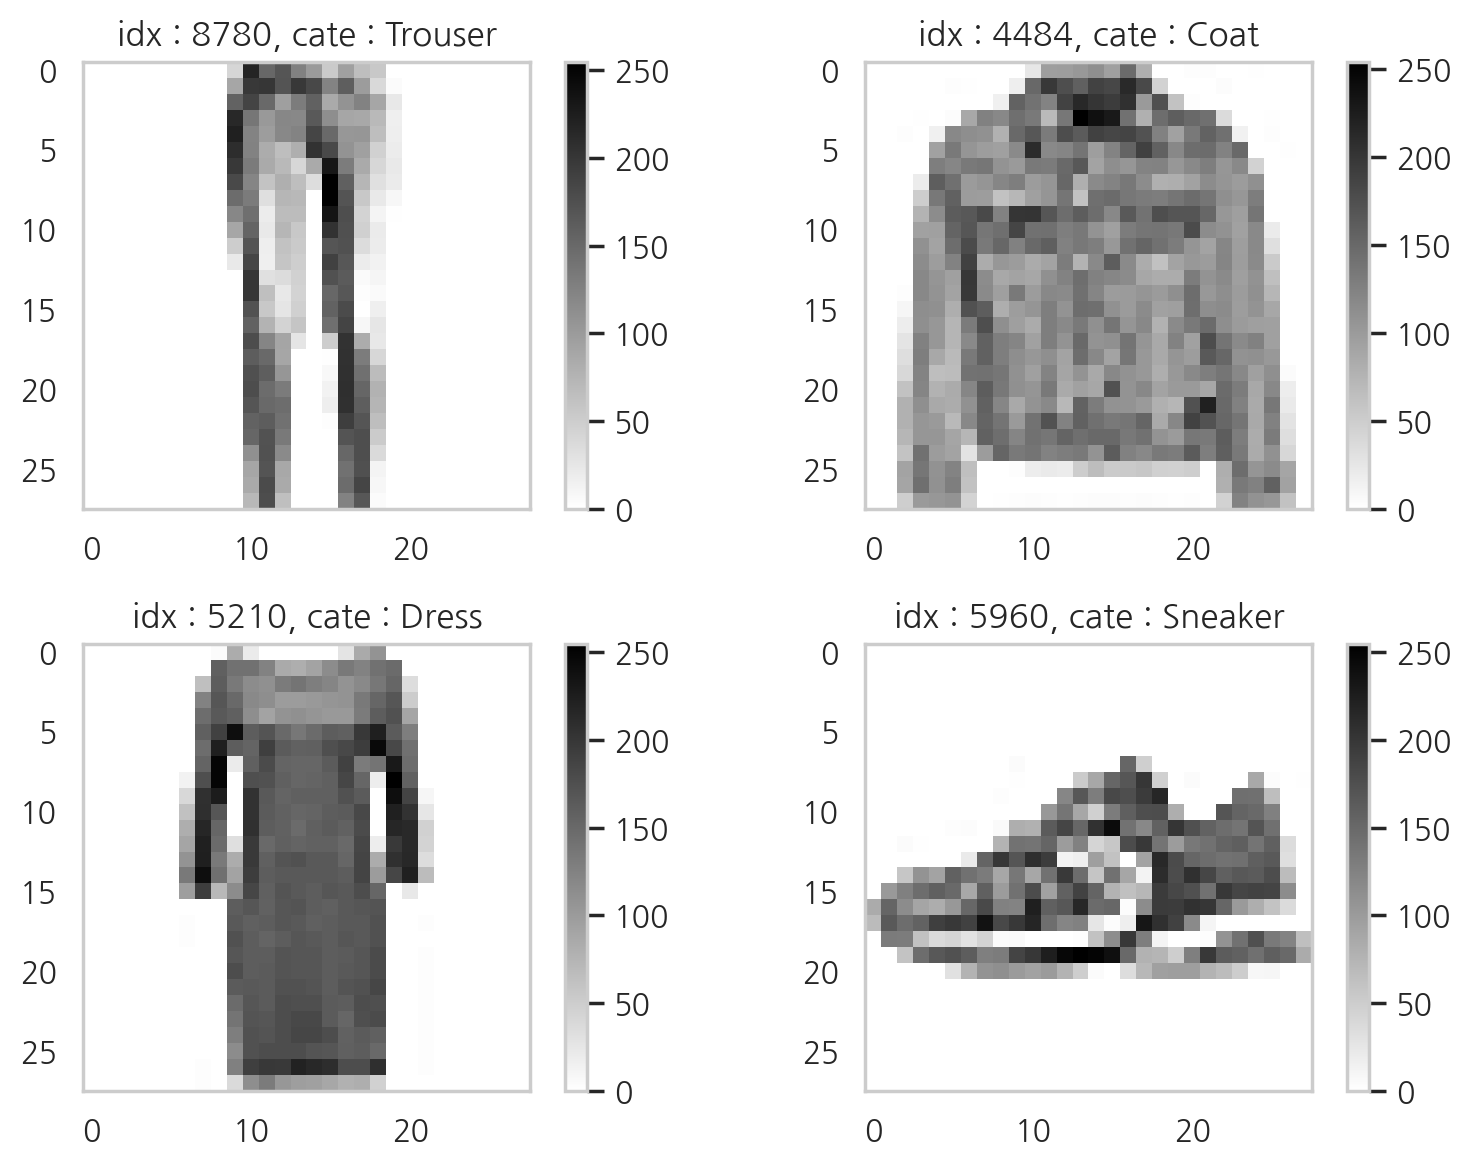

In [225]:
samples = np.random.choice(10000, 4)

plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, idx in enumerate(samples) : 
    plt.subplot(2, 2, i + 1)
    plt.imshow(x_train[idx], cmap="binary")
    plt.colorbar()
    plt.title(f"idx : {idx}, cate : {label_mapper[y_train[idx]]}")
    plt.grid(False)
    
plt.tight_layout()
plt.show() ; 

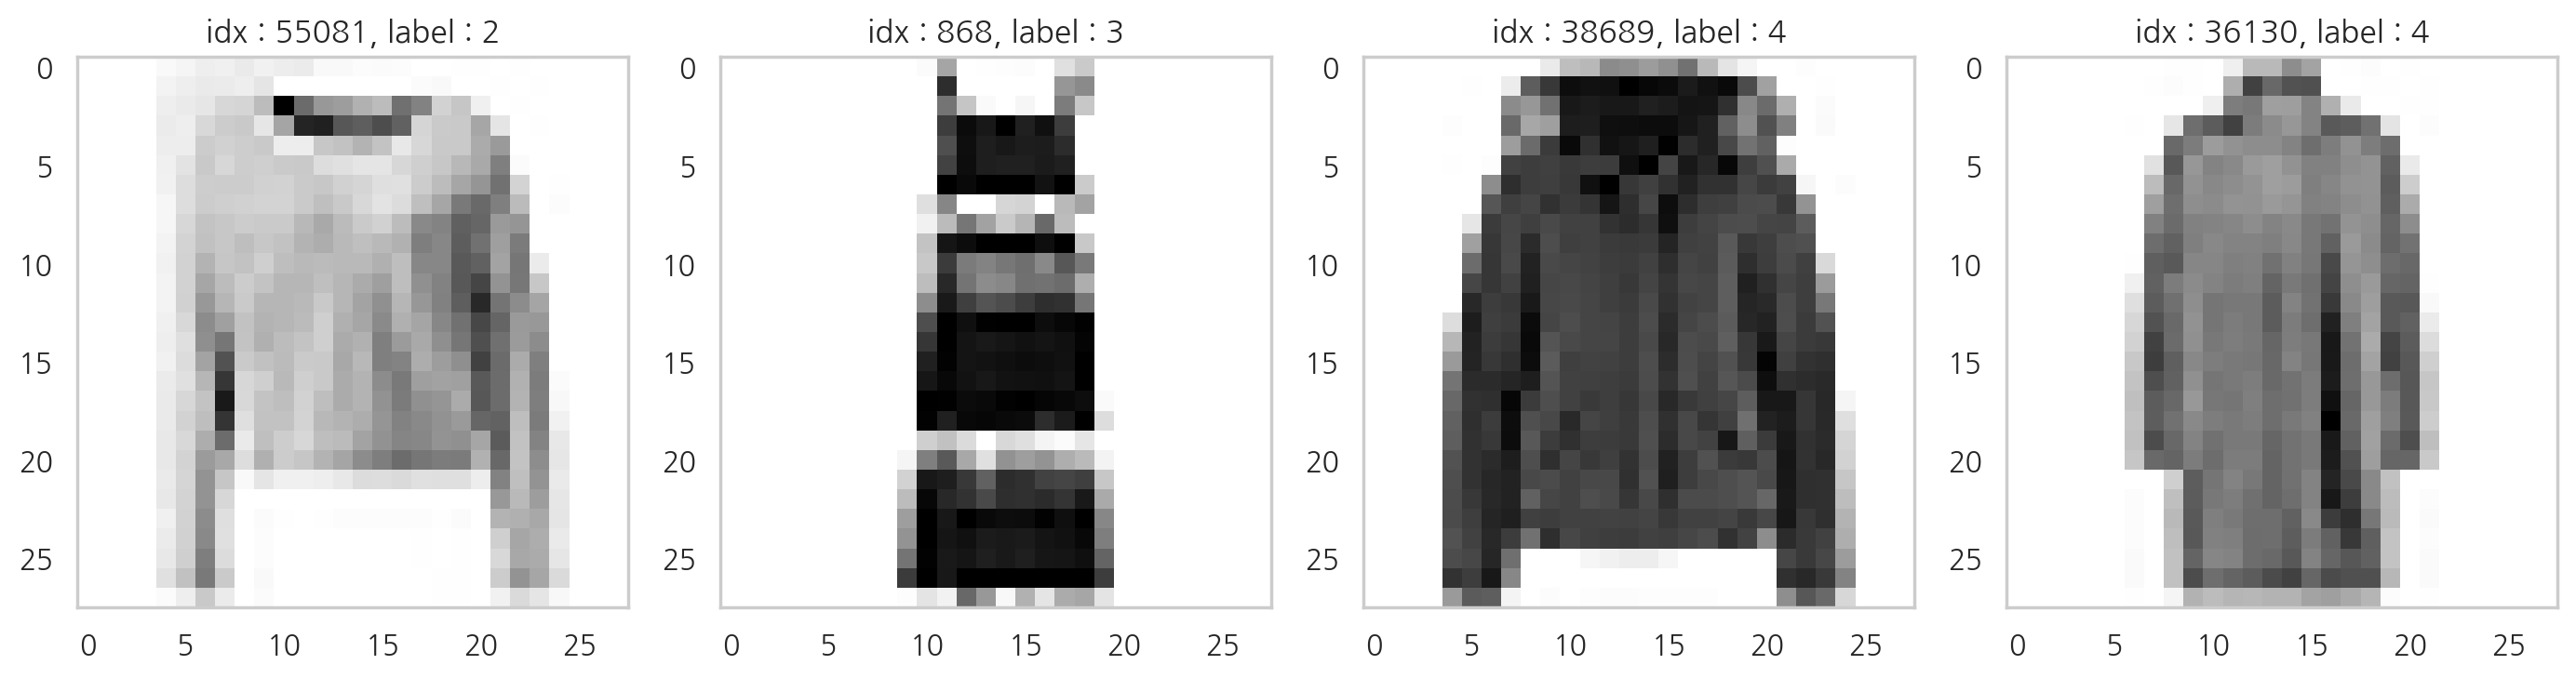

In [226]:
num_samples = 4
random_idx = np.random.randint(60000, size=num_samples)

plt.figure(figsize=(14, 10))

for i, idx in enumerate(random_idx) : 
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(image, cmap="binary")
    plt.title("idx : {}, label : {}".format(idx, label))
    plt.grid(False)
    
plt.tight_layout()
plt.show() ; 

## 15-4. 데이터 전처리

- Normalization : 맥스값으로 나눠주기, 0~1 사이의 값으로 바뀐다.
- Flatten : reshape 사용
- loss='sparse_categorical_crossentropy' : 모델 컴파일에서 loss 인수의 값으로 설정한다.

In [185]:
x_train.shape

(42000, 28, 28)

In [227]:
x_train = (x_train.reshape(-1, 28 * 28)) / 255.
x_val = (x_val.reshape(-1, 28 * 28)) / 255.
x_test = (x_test.reshape(-1, 28 * 28)) / 255.

x_train.shape, x_val.shape, x_test.shape

((42000, 784), (18000, 784), (10000, 784))

## 15-5. 모델 구성 (함수형 API)

In [228]:
input_ = Input(shape=(784, ), name="input")
hidden1 = Dense(512, activation="relu", name="hidden1")(input_)
hidden2 = Dense(256, activation="relu", name="hidden2")(hidden1)
hidden3 = Dense(128, activation="relu", name="hidden3")(hidden2)
hidden4 = Dense(64, activation="relu", name="hidden4")(hidden3)
hidden5 = Dense(32, activation="relu", name="hidden5")(hidden4)
output = Dense(10, activation="softmax", name="output")(hidden5)

f_model = Model(inputs=[input_], outputs=[output])
f_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hidden1 (Dense)             (None, 512)               401920    
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 hidden4 (Dense)             (None, 64)                8256      
                                                                 
 hidden5 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330 

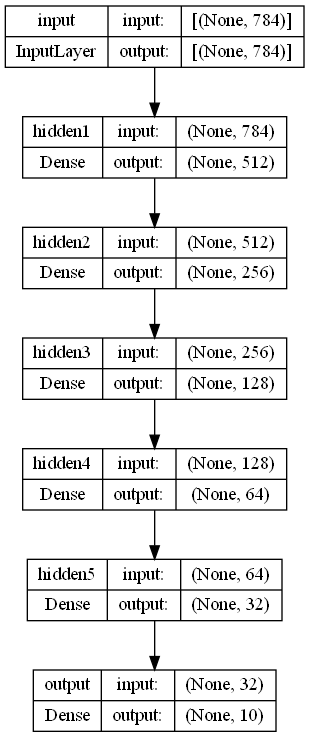

In [229]:
plot_model(f_model, show_shapes=True)

## 15-6. 모델 컴파일 및 학습
- loss="sparse_categorical_crossentropy" : 0, 1, 2, 3, ... 등으로 이루어진 클래스인 경우

In [230]:
f_model.compile(loss="sparse_categorical_crossentropy",
               optimizer=Adam(learning_rate=0.01),
               metrics=["acc"])

f_model_hist = f_model.fit(x_train,
                           y_train,
                           epochs=40,
                           batch_size=512,
                           validation_data=(x_val, y_val))

Epoch 1/40
83/83 [==============================] - 2s 15ms/step - loss: 0.9926 - acc: 0.6620 - val_loss: 0.5605 - val_acc: 0.7962
Epoch 2/40
83/83 [==============================] - 1s 11ms/step - loss: 0.4608 - acc: 0.8334 - val_loss: 0.4952 - val_acc: 0.8232
Epoch 3/40
83/83 [==============================] - 1s 12ms/step - loss: 0.4018 - acc: 0.8536 - val_loss: 0.4752 - val_acc: 0.8367
Epoch 4/40
83/83 [==============================] - 1s 11ms/step - loss: 0.3777 - acc: 0.8607 - val_loss: 1.2851 - val_acc: 0.7198
Epoch 5/40
83/83 [==============================] - 1s 11ms/step - loss: 0.4004 - acc: 0.8586 - val_loss: 0.3960 - val_acc: 0.8594
Epoch 6/40
83/83 [==============================] - 1s 11ms/step - loss: 0.3657 - acc: 0.8693 - val_loss: 0.4431 - val_acc: 0.8389
Epoch 7/40
83/83 [==============================] - 1s 11ms/step - loss: 0.3353 - acc: 0.8778 - val_loss: 0.4671 - val_acc: 0.8309
Epoch 8/40
83/83 [==============================] - 1s 11ms/step - loss: 0.3320 - a

## 15-7. epoch와 val_loss, accuracy 그래프

In [231]:
f_model_hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

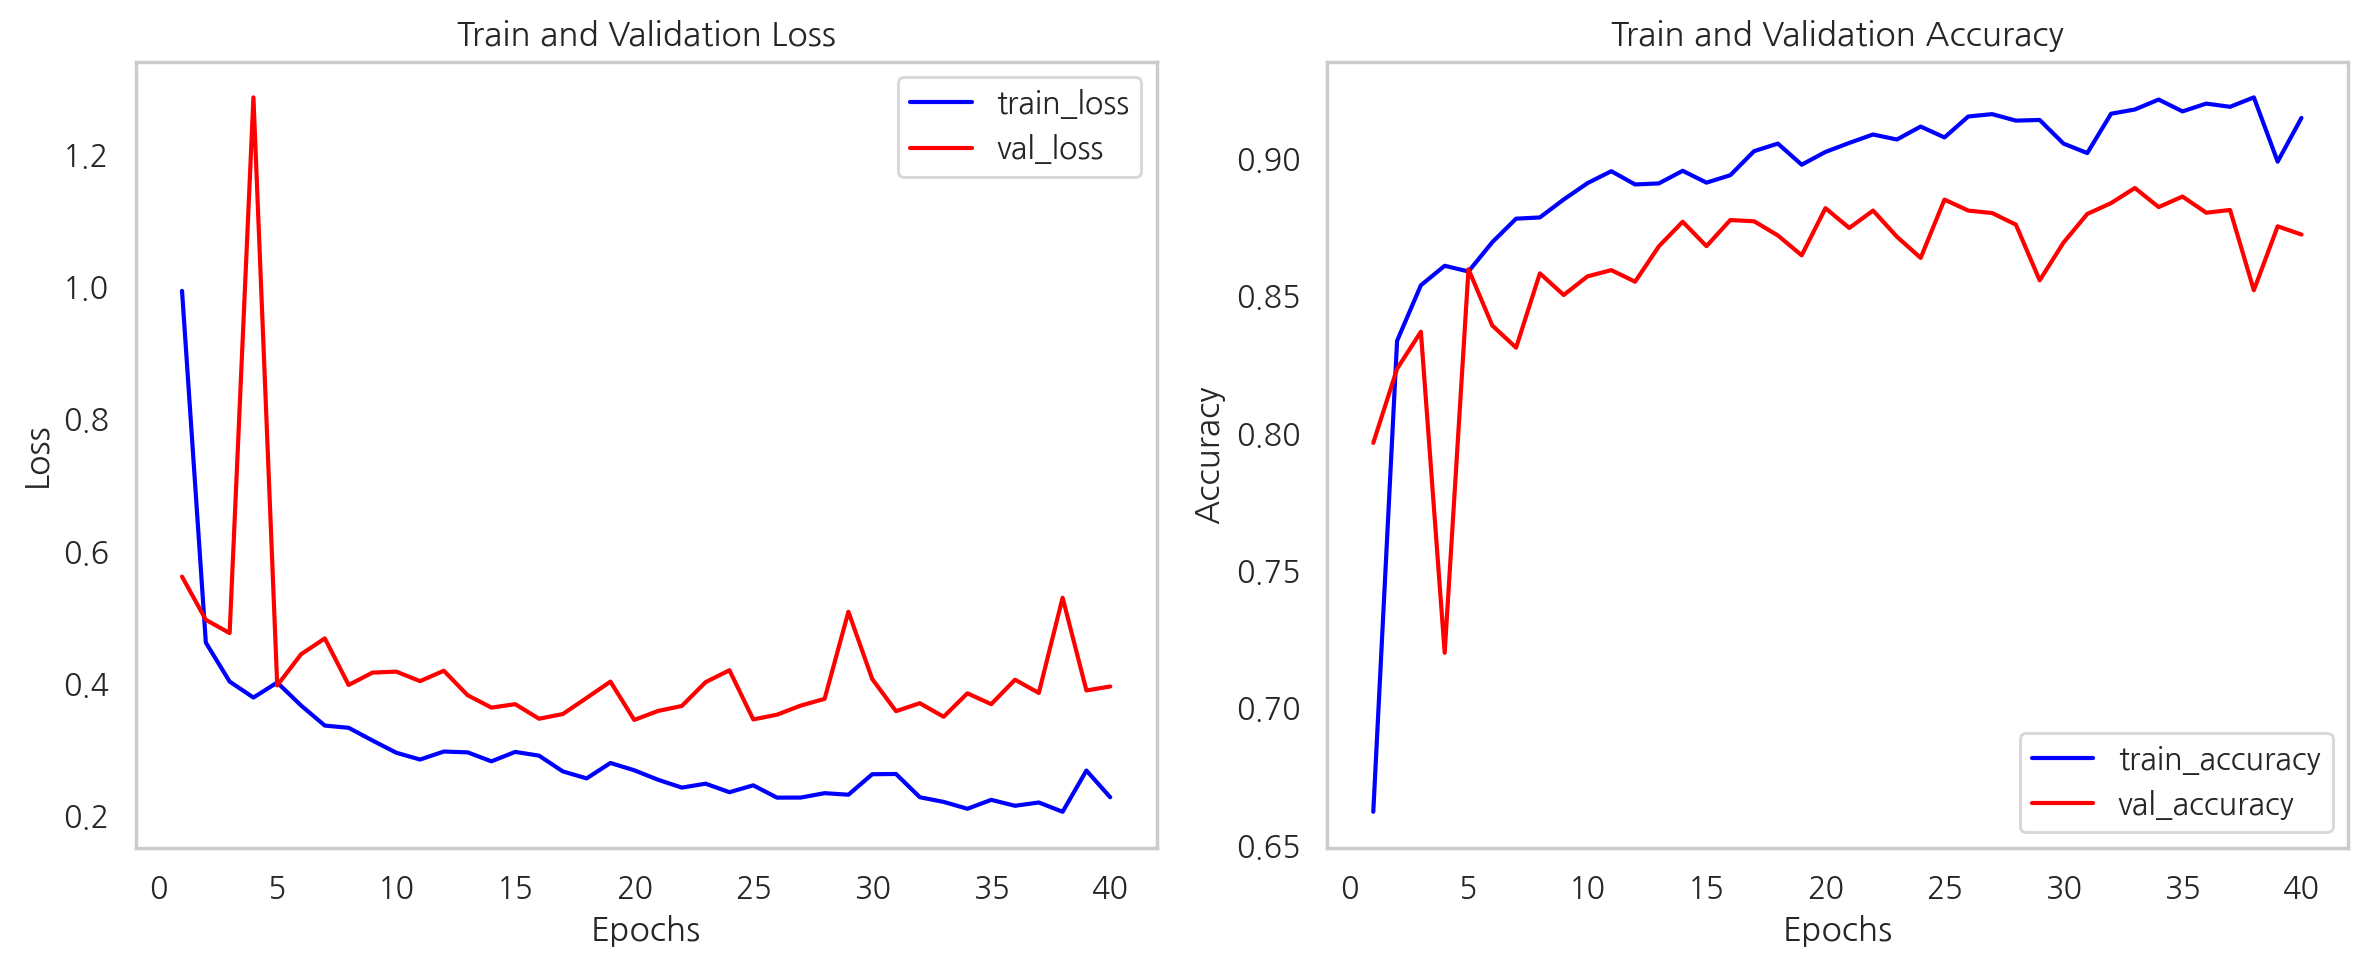

In [232]:
history_dict = f_model_hist.history
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

loss, val_loss = history_dict["loss"], history_dict["val_loss"]
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color="blue", label="train_loss")
ax1.plot(epochs, val_loss, color="red", label="val_loss")
ax1.set_title("Train and Validation Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.grid(False)
ax1.legend()

accuracy, val_accuracy = history_dict["acc"], history_dict["val_acc"]
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color="blue", label="train_accuracy")
ax2.plot(epochs, val_accuracy, color="red", label="val_accuracy")
ax2.set_title("Train and Validation Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.grid(False)
ax2.legend()

plt.tight_layout()
plt.show() ; 

## 15-8. 모델 평가 및 예측

In [233]:
f_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4260 - acc: 0.8584


[0.42599809169769287, 0.8583999872207642]

In [234]:
pred_y = f_model.predict(x_test)

print(pred_y.shape)
np.set_printoptions(precision=7)
print(pred_y[0])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[1.2999416e-06 1.0817738e-05 2.0081510e-05 2.2179754e-07 7.7804930e-07
 1.9295023e-05 5.5057139e-06 1.9976778e-01 2.4801919e-05 8.0014944e-01]


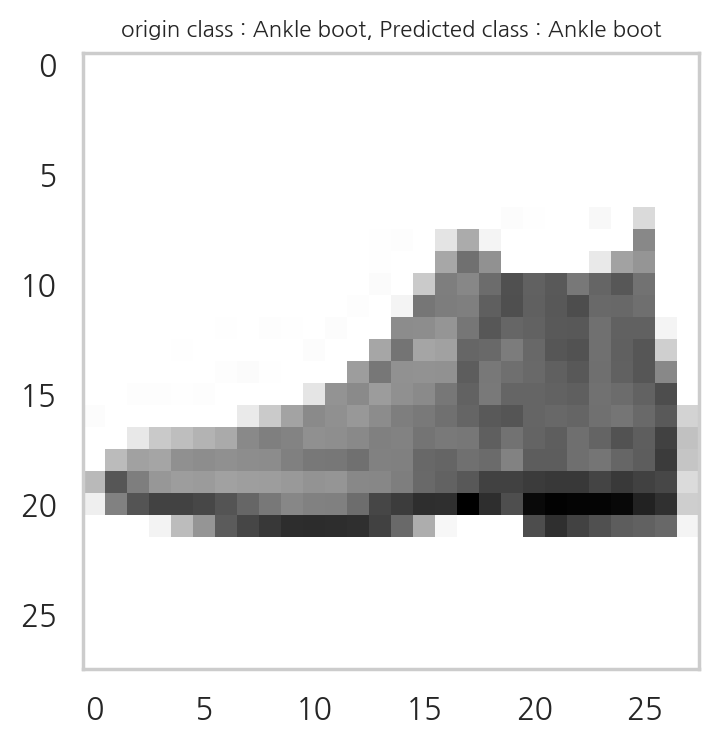

In [239]:
arg_pred_y = np.argmax(pred_y, axis=1)
plt.imshow(x_test[0].reshape(-1, 28), cmap="binary")
plt.title("origin class : {}, Predicted class : {}"\
          .format(label_mapper[y_test[0]], label_mapper[arg_pred_y[0]]),
         fontsize=8)
plt.grid(False)
plt.show() ; 

## 15-9. 실제 이미지와 예측값의 비교

In [323]:
def plot_image(i, all_pred_y, all_y_test, all_img) : 
    
    pred_y, y_test, img = all_pred_y[i], all_y_test[i], all_img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap="binary")
    predicted_label = np.argmax(pred_y)
    if predicted_label == y_test : 
        color="blue"
    else : 
        color="red"
        
    plt.xlabel("{} {:2.0f}% ({})".format(label_mapper[predicted_label],
                                         100 * np.max(pred_y),
                                         label_mapper[y_test]), color=color, fontsize=10)
    
def plot_value_array(i, all_pred_y, all_true_label, fontsize=8) : 
    
    pred_y, true_label = all_pred_y[i], all_true_label[i]
    thisplot = plt.bar(range(10), pred_y, color="pink")
    
    predicted_label = np.argmax(pred_y)
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")
    
    plt.grid(False)
    plt.xticks(range(0, 10), label_mapper.values(), rotation=60, fontsize=fontsize)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xlim(-1, 10)
    plt.ylim(0, 1.1)

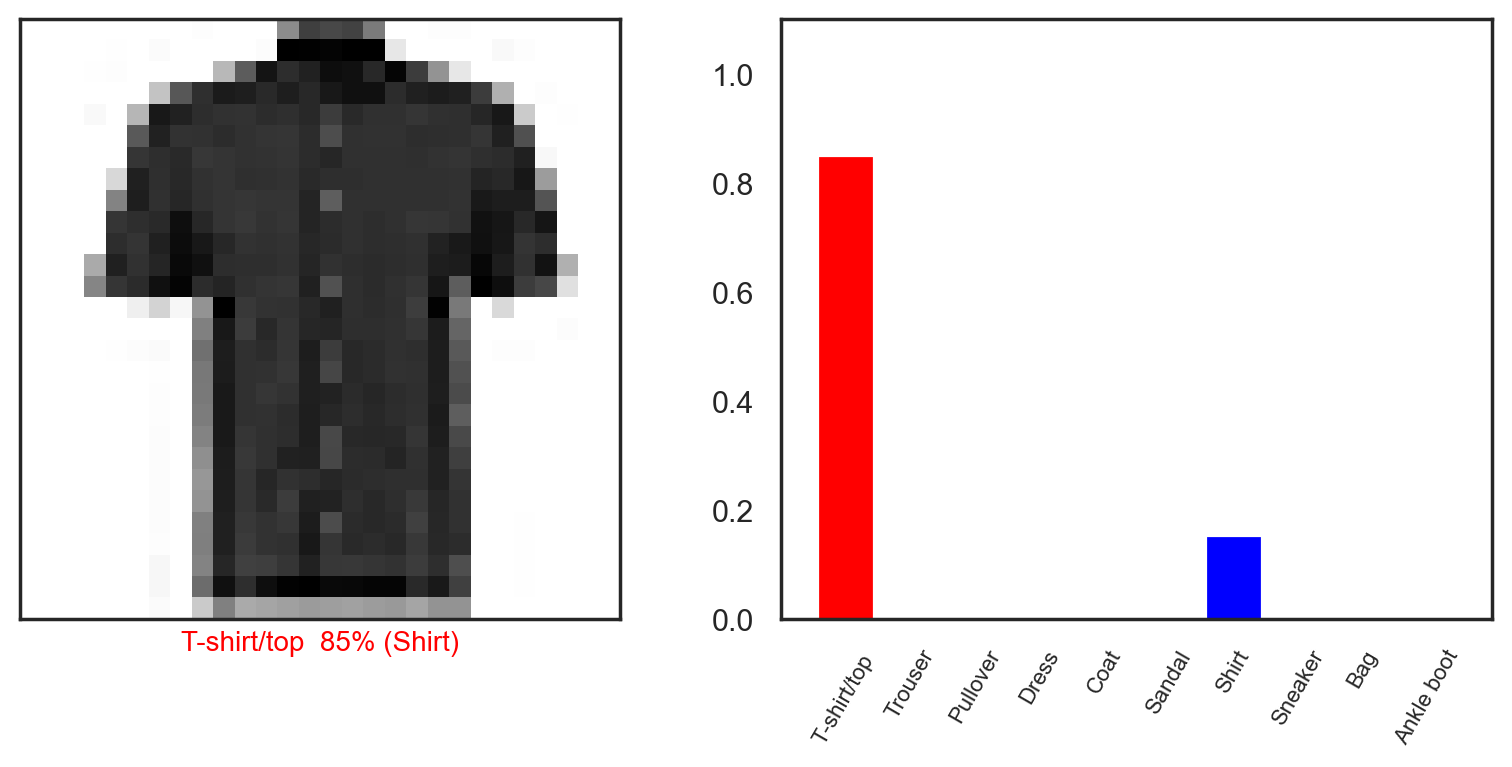

In [324]:
i = 40
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_y, y_test, x_test.reshape(-1, 28, 28))

plt.subplot(1, 2, 2)
plot_value_array(i, pred_y, y_test)

plt.tight_layout()
plt.show() ; 

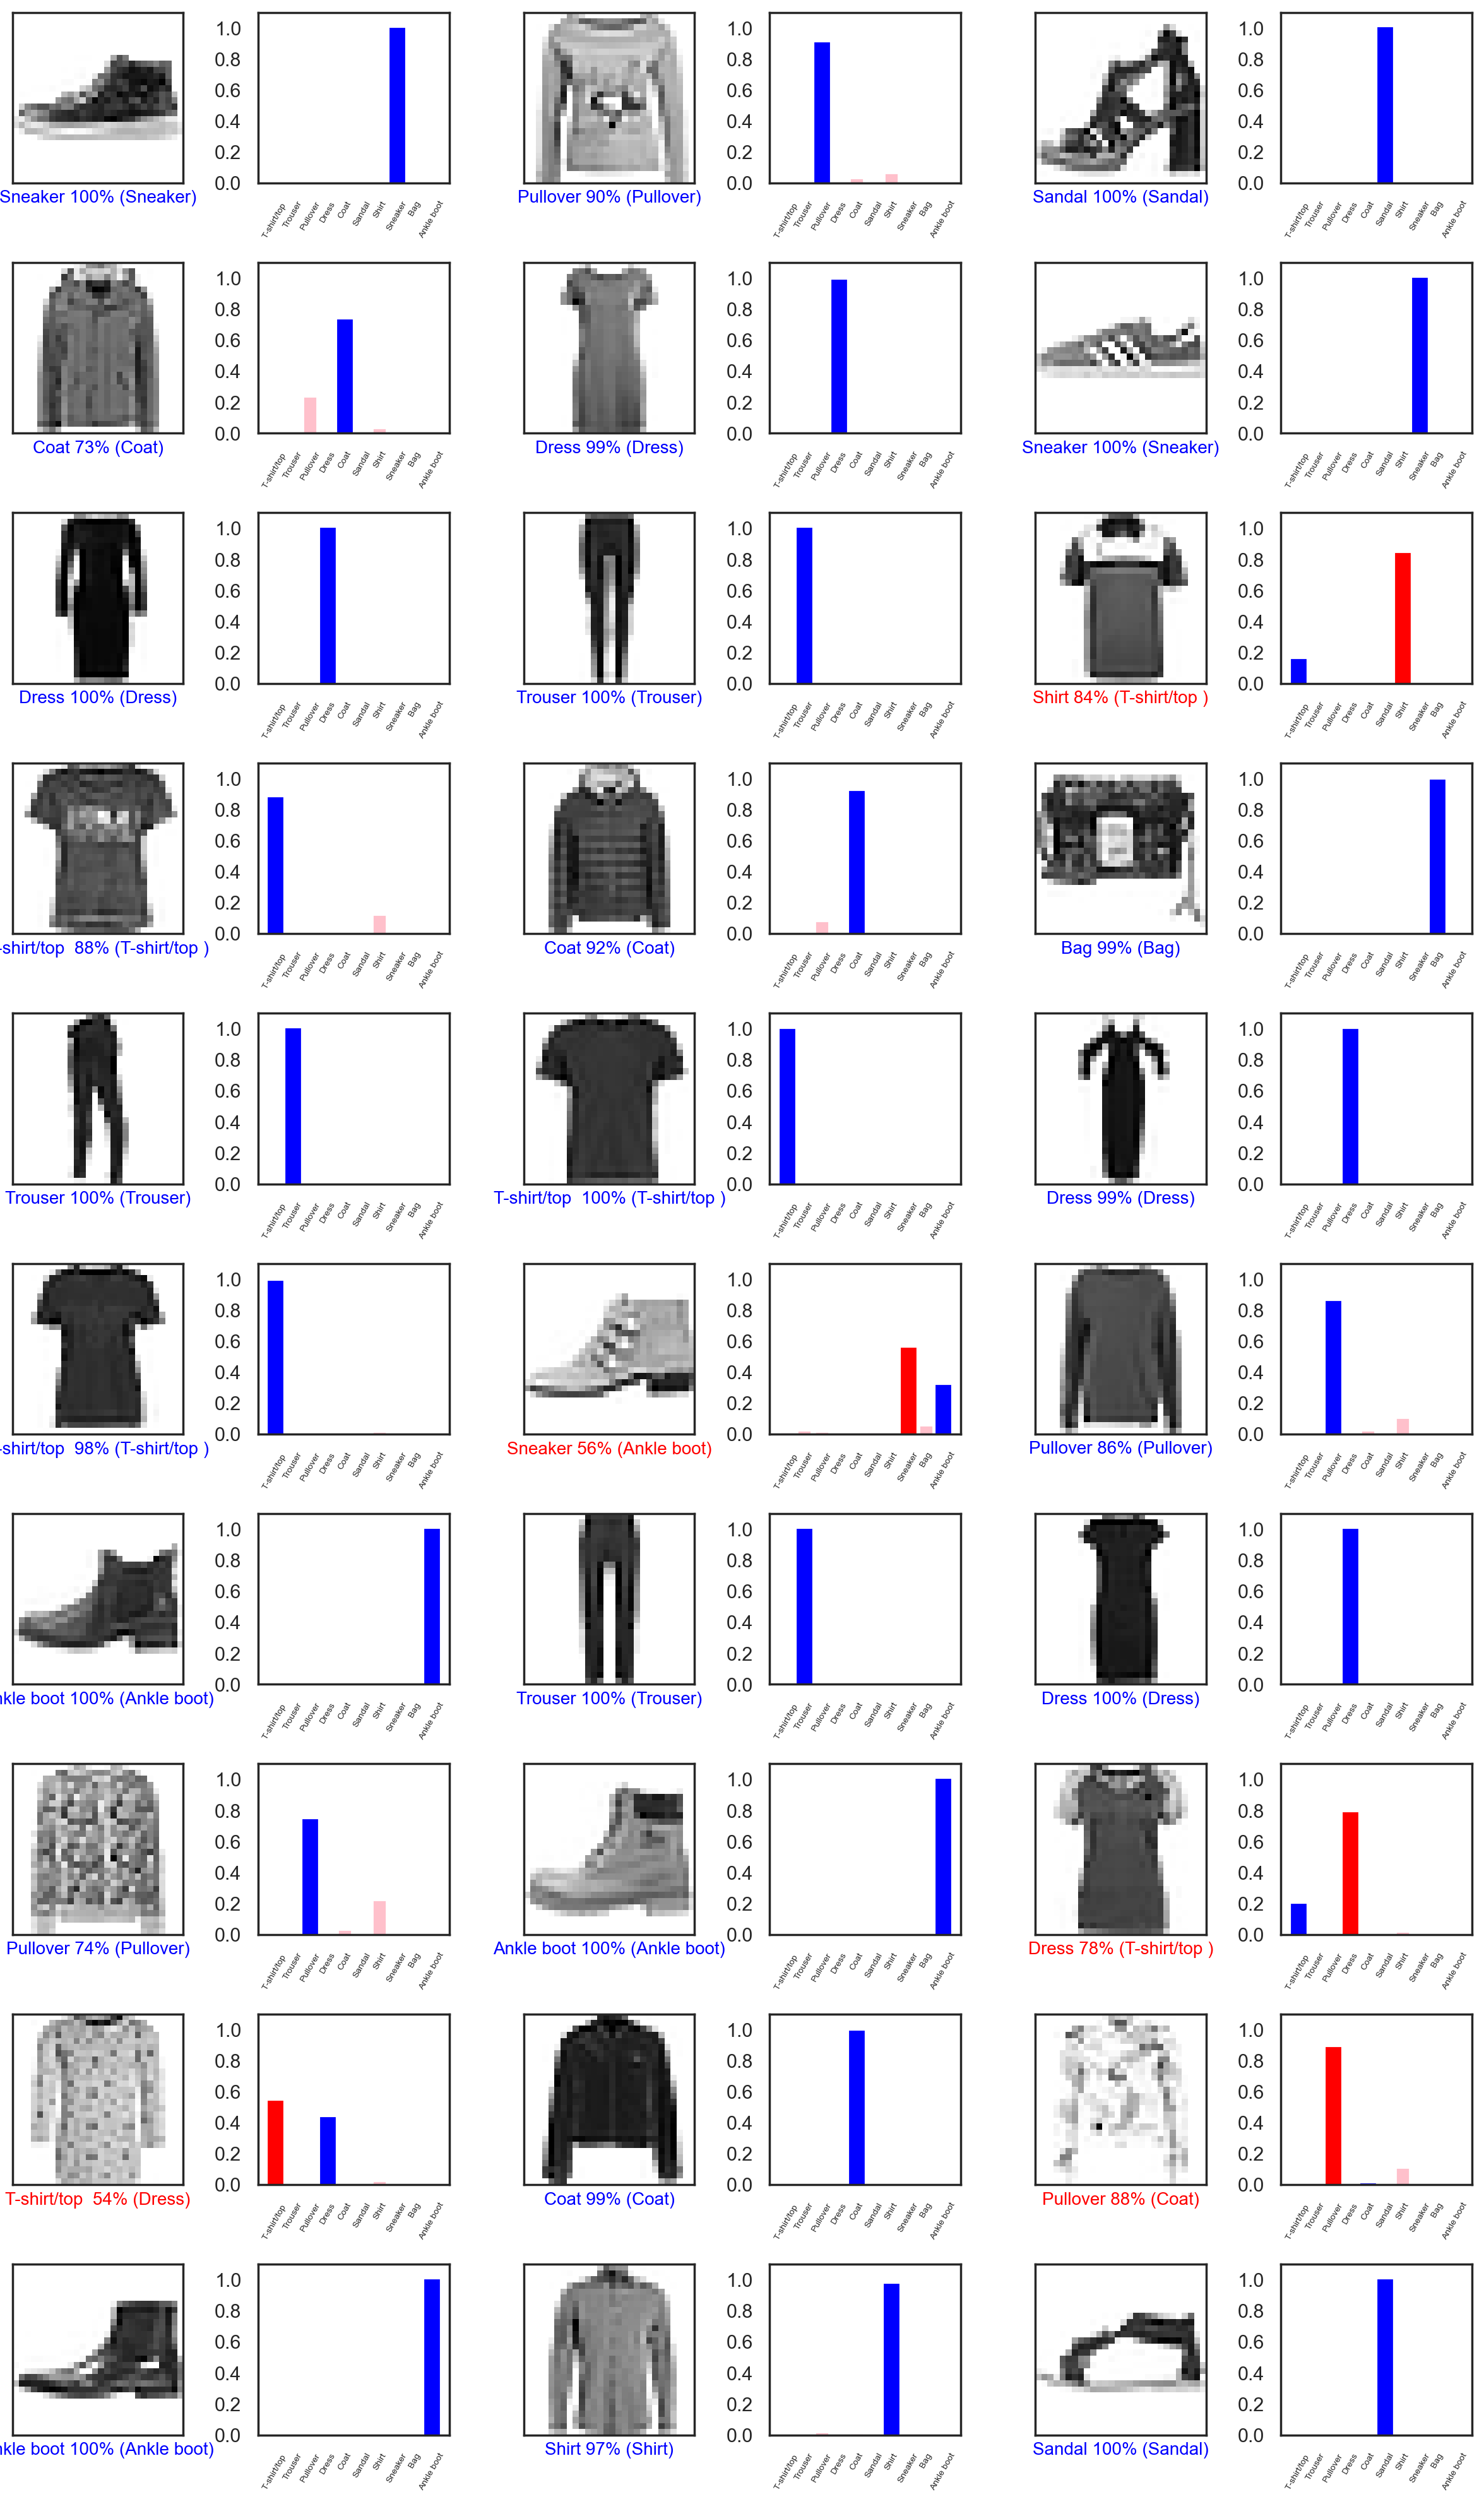

In [325]:
rows = 10
cols = 3
num_images = rows * cols
random_num = np.random.randint(10000, size=num_images)

plt.figure(figsize=(2 * 2 * cols, 2 * rows))
for idx, num in enumerate(random_num) : 
    
    plt.subplot(rows, 2 * cols, 2 * idx + 1)
    plot_image(num, pred_y, y_test, x_test.reshape(-1, 28, 28))
    
    plt.subplot(rows, 2 * cols, 2 * idx + 2)
    plot_value_array(num, pred_y, y_test, fontsize=5)
    
plt.tight_layout()
plt.show() ; 

## 15-10. 모델 성능 결과

### 혼동 행렬 (Confusion Matrix)

In [315]:
from tensorflow.keras.utils import to_categorical

y_test_cate = to_categorical(y_test)
y_test_cate.shape

(10000, 10)

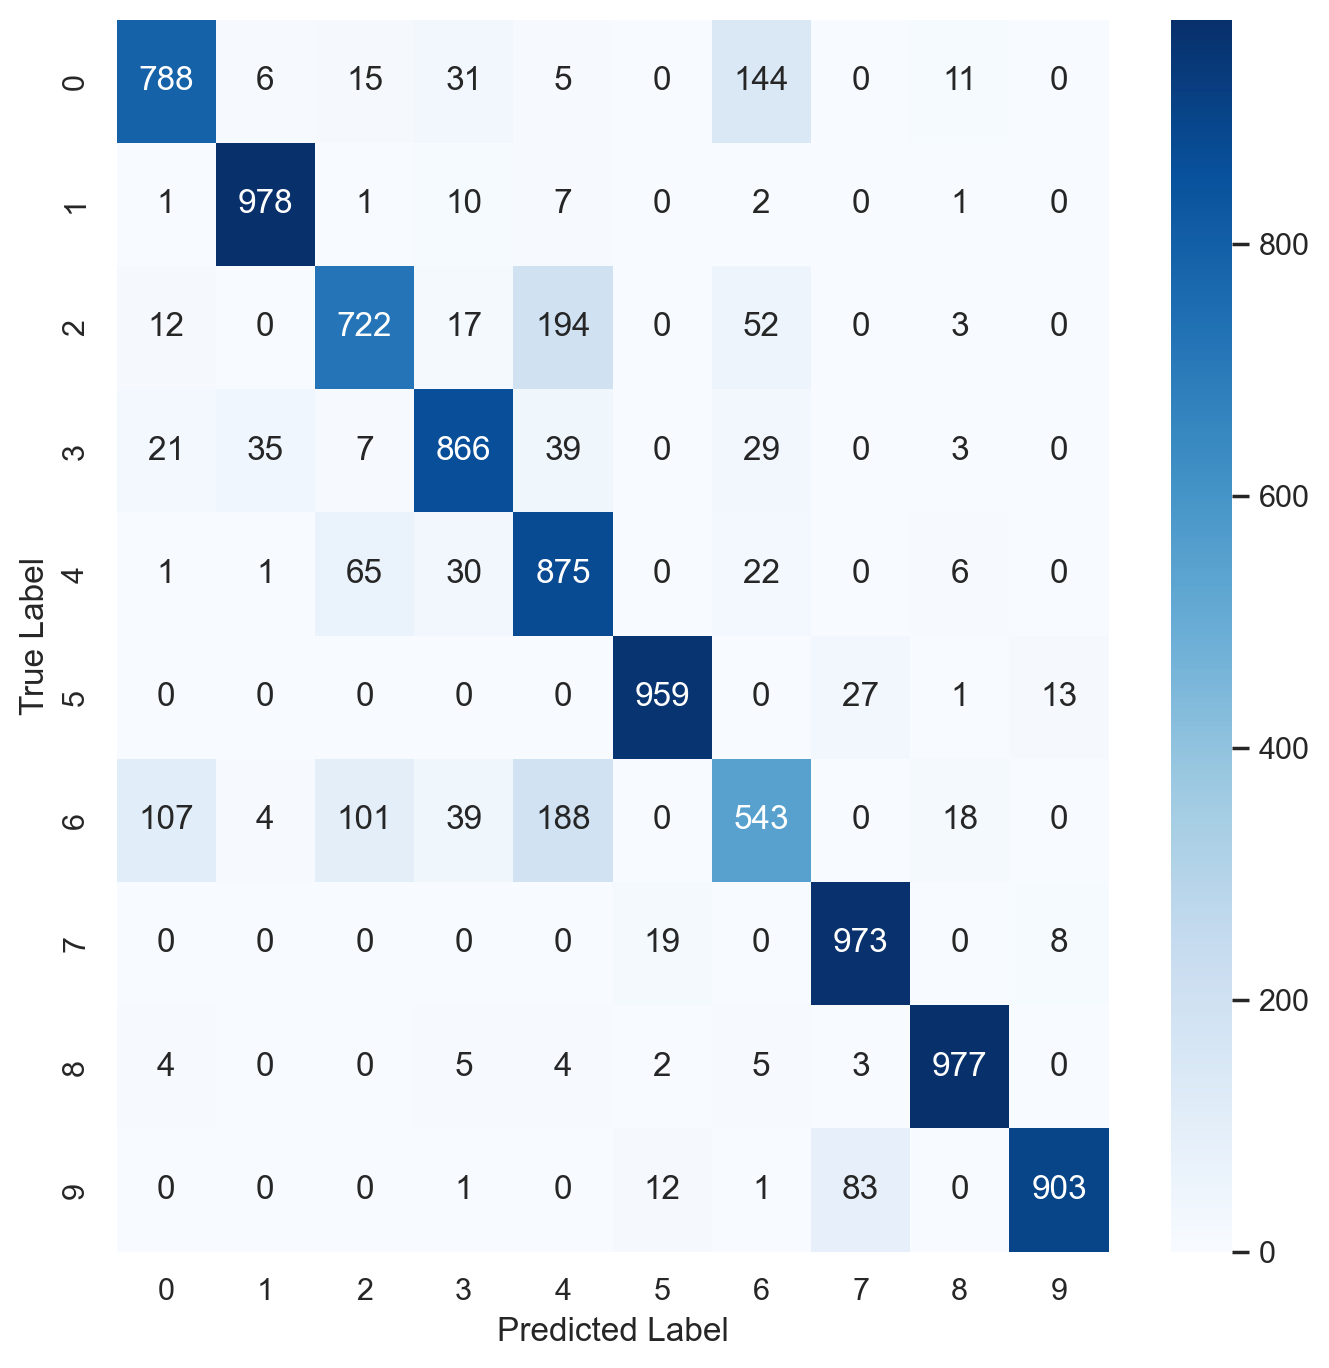

In [317]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set_style("white")

plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test_cate, axis=-1), np.argmax(pred_y, axis=-1))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() ; 

### 분류 보고서

In [318]:
print(classification_report(np.argmax(y_test_cate, axis=-1), np.argmax(pred_y, axis=-1)))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1000
           1       0.96      0.98      0.97      1000
           2       0.79      0.72      0.76      1000
           3       0.87      0.87      0.87      1000
           4       0.67      0.88      0.76      1000
           5       0.97      0.96      0.96      1000
           6       0.68      0.54      0.60      1000
           7       0.90      0.97      0.93      1000
           8       0.96      0.98      0.97      1000
           9       0.98      0.90      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# 16. Modeling 

## 16-1. fashion mnist model 2
- 레이어의 수 증가
- 가중치 초기화 함수 적용
- l1_l2 규제 함수 적용
- Dropout() 레이어 적용

In [332]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [337]:
input_layer = Input(shape=(784, ), name="input")

hidden_1 = Dense(units=1024, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.002), activation="relu", 
                 name="hidden_1")(input_layer)
dropout_1 = Dropout(rate=0.7, name="dropout_1")(hidden_1)

hidden_2 = Dense(units=512, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.002), activation="relu", 
                 name="hidden_2")(dropout_1)
dropout_2 = Dropout(rate=0.7, name="dropout_2")(hidden_2)

hidden_3 = Dense(units=128, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.002), activation="relu", 
                 name="hidden_3")(dropout_2)
dropout_3 = Dropout(rate=0.6, name="dropout_3")(hidden_3)

hidden_4 = Dense(units=32, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.002), activation="relu", 
                 name="hidden_4")(dropout_3)
dropout_4 = Dropout(rate=0.6, name="dropout_4")(hidden_4)

output = Dense(units=10, kernel_initializer="glorot_uniform", activation="softmax", name="output")(dropout_4)

f_model_2 = Model(inputs=[input_layer], outputs=[output])
f_model_2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hidden_1 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 hidden_2 (Dense)            (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 hidden_3 (Dense)            (None, 128)               65664     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0   

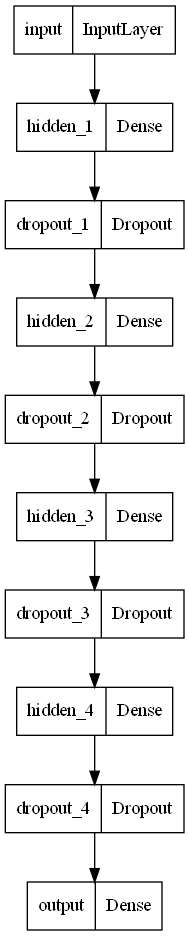

In [340]:
plot_model(f_model_2)

In [339]:
from tensorflow.keras.optimizers import Adamax

In [342]:
f_model_2.compile(optimizer=Adamax(learning_rate=0.002),
                 loss="sparse_categorical_crossentropy",
                 metrics=["acc"])

f_model_2_hist = f_model_2.fit(x_train,
                               y_train, 
                               epochs=50, 
                               batch_size=600, 
                               validation_data=(x_val, y_val))

Epoch 1/50
70/70 [==============================] - 3s 35ms/step - loss: 12.4402 - acc: 0.1397 - val_loss: 10.3895 - val_acc: 0.3403
Epoch 2/50
70/70 [==============================] - 2s 30ms/step - loss: 9.3057 - acc: 0.2412 - val_loss: 8.0173 - val_acc: 0.5359
Epoch 3/50
70/70 [==============================] - 2s 29ms/step - loss: 7.4901 - acc: 0.3675 - val_loss: 6.4216 - val_acc: 0.6477
Epoch 4/50
70/70 [==============================] - 2s 31ms/step - loss: 6.2018 - acc: 0.4512 - val_loss: 5.2704 - val_acc: 0.6996
Epoch 5/50
70/70 [==============================] - 2s 30ms/step - loss: 5.2148 - acc: 0.5137 - val_loss: 4.4194 - val_acc: 0.7103
Epoch 6/50
70/70 [==============================] - 2s 30ms/step - loss: 4.4507 - acc: 0.5564 - val_loss: 3.7414 - val_acc: 0.7333
Epoch 7/50
70/70 [==============================] - 2s 30ms/step - loss: 3.8426 - acc: 0.5851 - val_loss: 3.2165 - val_acc: 0.7439
Epoch 8/50
70/70 [==============================] - 2s 31ms/step - loss: 3.3492 -

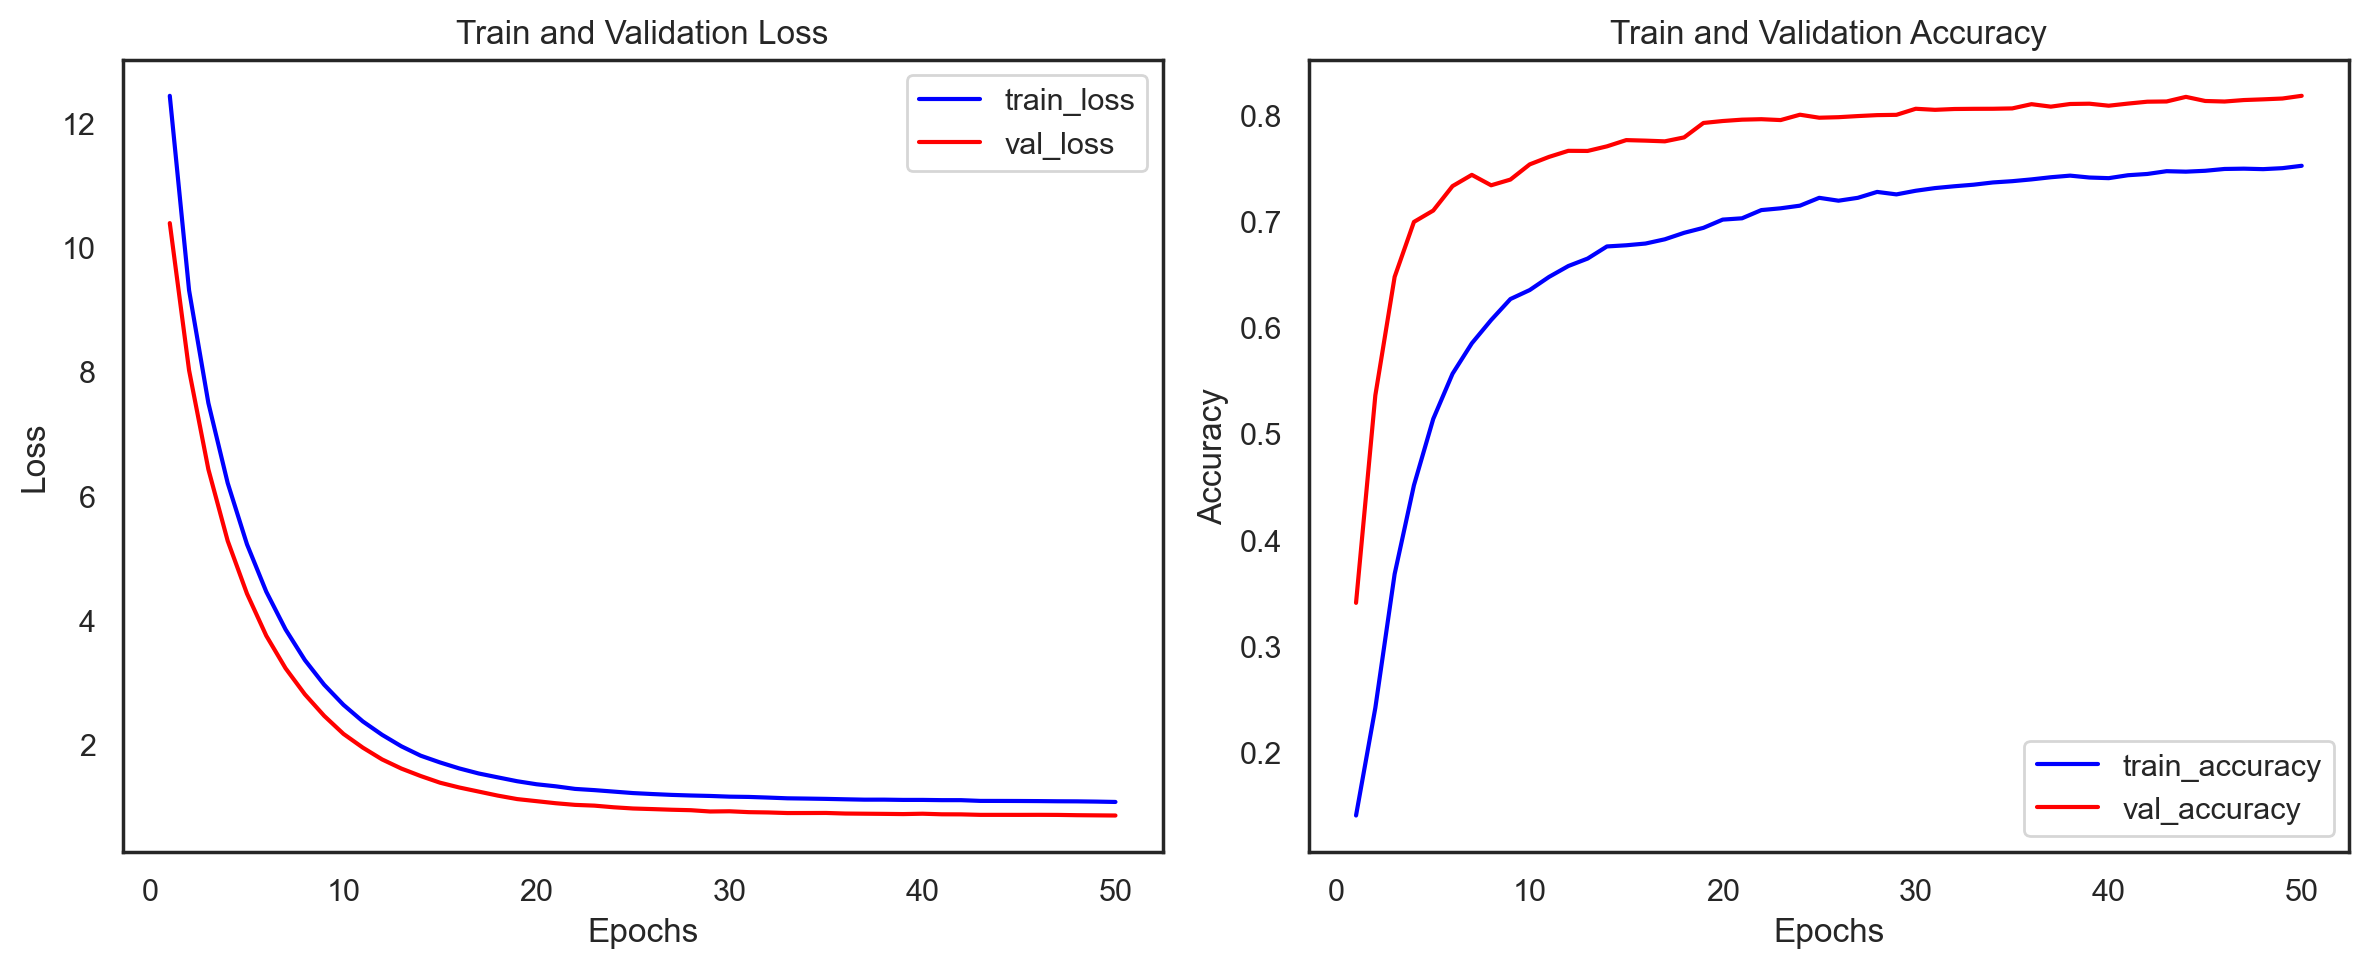

In [348]:
history_dict = f_model_2_hist.history

fig = plt.figure(figsize=(12, 5))

loss, val_loss = history_dict["loss"], history_dict["val_loss"]
epochs = range(1, len(loss) + 1)

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color="blue", label="train_loss")
ax1.plot(epochs, val_loss, color="red", label="val_loss")
ax1.set_title("Train and Validation Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.grid(False)
ax1.legend()

accuracy, val_accuracy = history_dict["acc"], history_dict["val_acc"]
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color="blue", label="train_accuracy")
ax2.plot(epochs, val_accuracy, color="red", label="val_accuracy")
ax2.set_title("Train and Validation Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.grid(False)
ax2.legend()

plt.tight_layout()
plt.show() ; 

In [344]:
f_model_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8571 - acc: 0.8128


[0.8571257591247559, 0.8127999901771545]

In [345]:
pred_y_2 = f_model_2.predict(x_test)

print(pred_y_2.shape)
np.set_printoptions(precision=7)
print(pred_y_2[0])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[2.0272493e-07 1.1136068e-06 1.7588581e-08 2.5609010e-08 1.9591312e-07
 6.7854032e-02 2.9055488e-07 1.3738115e-01 2.4140165e-05 7.9473877e-01]


In [347]:
print(classification_report(np.argmax(y_test_cate, axis=-1), np.argmax(pred_y_2, axis=-1)))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1000
           1       0.99      0.94      0.97      1000
           2       0.58      0.71      0.64      1000
           3       0.85      0.87      0.86      1000
           4       0.72      0.75      0.74      1000
           5       0.95      0.90      0.93      1000
           6       0.52      0.30      0.38      1000
           7       0.92      0.89      0.90      1000
           8       0.94      0.96      0.95      1000
           9       0.88      0.96      0.92      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



## 16-2. fashion mnist model 3

In [349]:
input_layer = Input(shape=(784, ), name="input")
hidden_1 = Dense(units=1024, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), activation="relu", 
                 name="hidden_1")(input_layer)
hidden_2 = Dense(units=512, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), activation="relu", 
                 name="hidden_2")(hidden_1)
hidden_3 = Dense(units=128, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), activation="relu", 
                 name="hidden_3")(hidden_2)
hidden_4 = Dense(units=32, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), activation="relu", 
                 name="hidden_4")(hidden_3)
output = Dense(units=10, kernel_initializer="glorot_uniform", activation="softmax", name="output")(hidden_4)

f_model_3 = Model(inputs=[input_layer], outputs=[output])
f_model_3.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hidden_1 (Dense)            (None, 1024)              803840    
                                                                 
 hidden_2 (Dense)            (None, 512)               524800    
                                                                 
 hidden_3 (Dense)            (None, 128)               65664     
                                                                 
 hidden_4 (Dense)            (None, 32)                4128      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 1,398,762
Trainable params: 1,398,762
Non-tra

In [350]:
f_model_3.compile(optimizer=Adamax(learning_rate=0.001),
                 loss="sparse_categorical_crossentropy",
                 metrics=["acc"])

f_model_3_hist = f_model_3.fit(x_train,
                               y_train, 
                               epochs=50, 
                               batch_size=600, 
                               validation_data=(x_val, y_val))

Epoch 1/50
70/70 [==============================] - 3s 30ms/step - loss: 7.9592 - acc: 0.7545 - val_loss: 6.2749 - val_acc: 0.8248
Epoch 2/50
70/70 [==============================] - 2s 25ms/step - loss: 5.5075 - acc: 0.8335 - val_loss: 4.9113 - val_acc: 0.8371
Epoch 3/50
70/70 [==============================] - 2s 25ms/step - loss: 4.4948 - acc: 0.8484 - val_loss: 4.1565 - val_acc: 0.8359
Epoch 4/50
70/70 [==============================] - 2s 25ms/step - loss: 3.8623 - acc: 0.8449 - val_loss: 3.5938 - val_acc: 0.8523
Epoch 5/50
70/70 [==============================] - 2s 26ms/step - loss: 3.3604 - acc: 0.8556 - val_loss: 3.1566 - val_acc: 0.8548
Epoch 6/50
70/70 [==============================] - 2s 25ms/step - loss: 2.9625 - acc: 0.8564 - val_loss: 2.7948 - val_acc: 0.8534
Epoch 7/50
70/70 [==============================] - 2s 25ms/step - loss: 2.6434 - acc: 0.8533 - val_loss: 2.5314 - val_acc: 0.8383
Epoch 8/50
70/70 [==============================] - 2s 26ms/step - loss: 2.3657 - a

In [352]:
f_model_3_hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

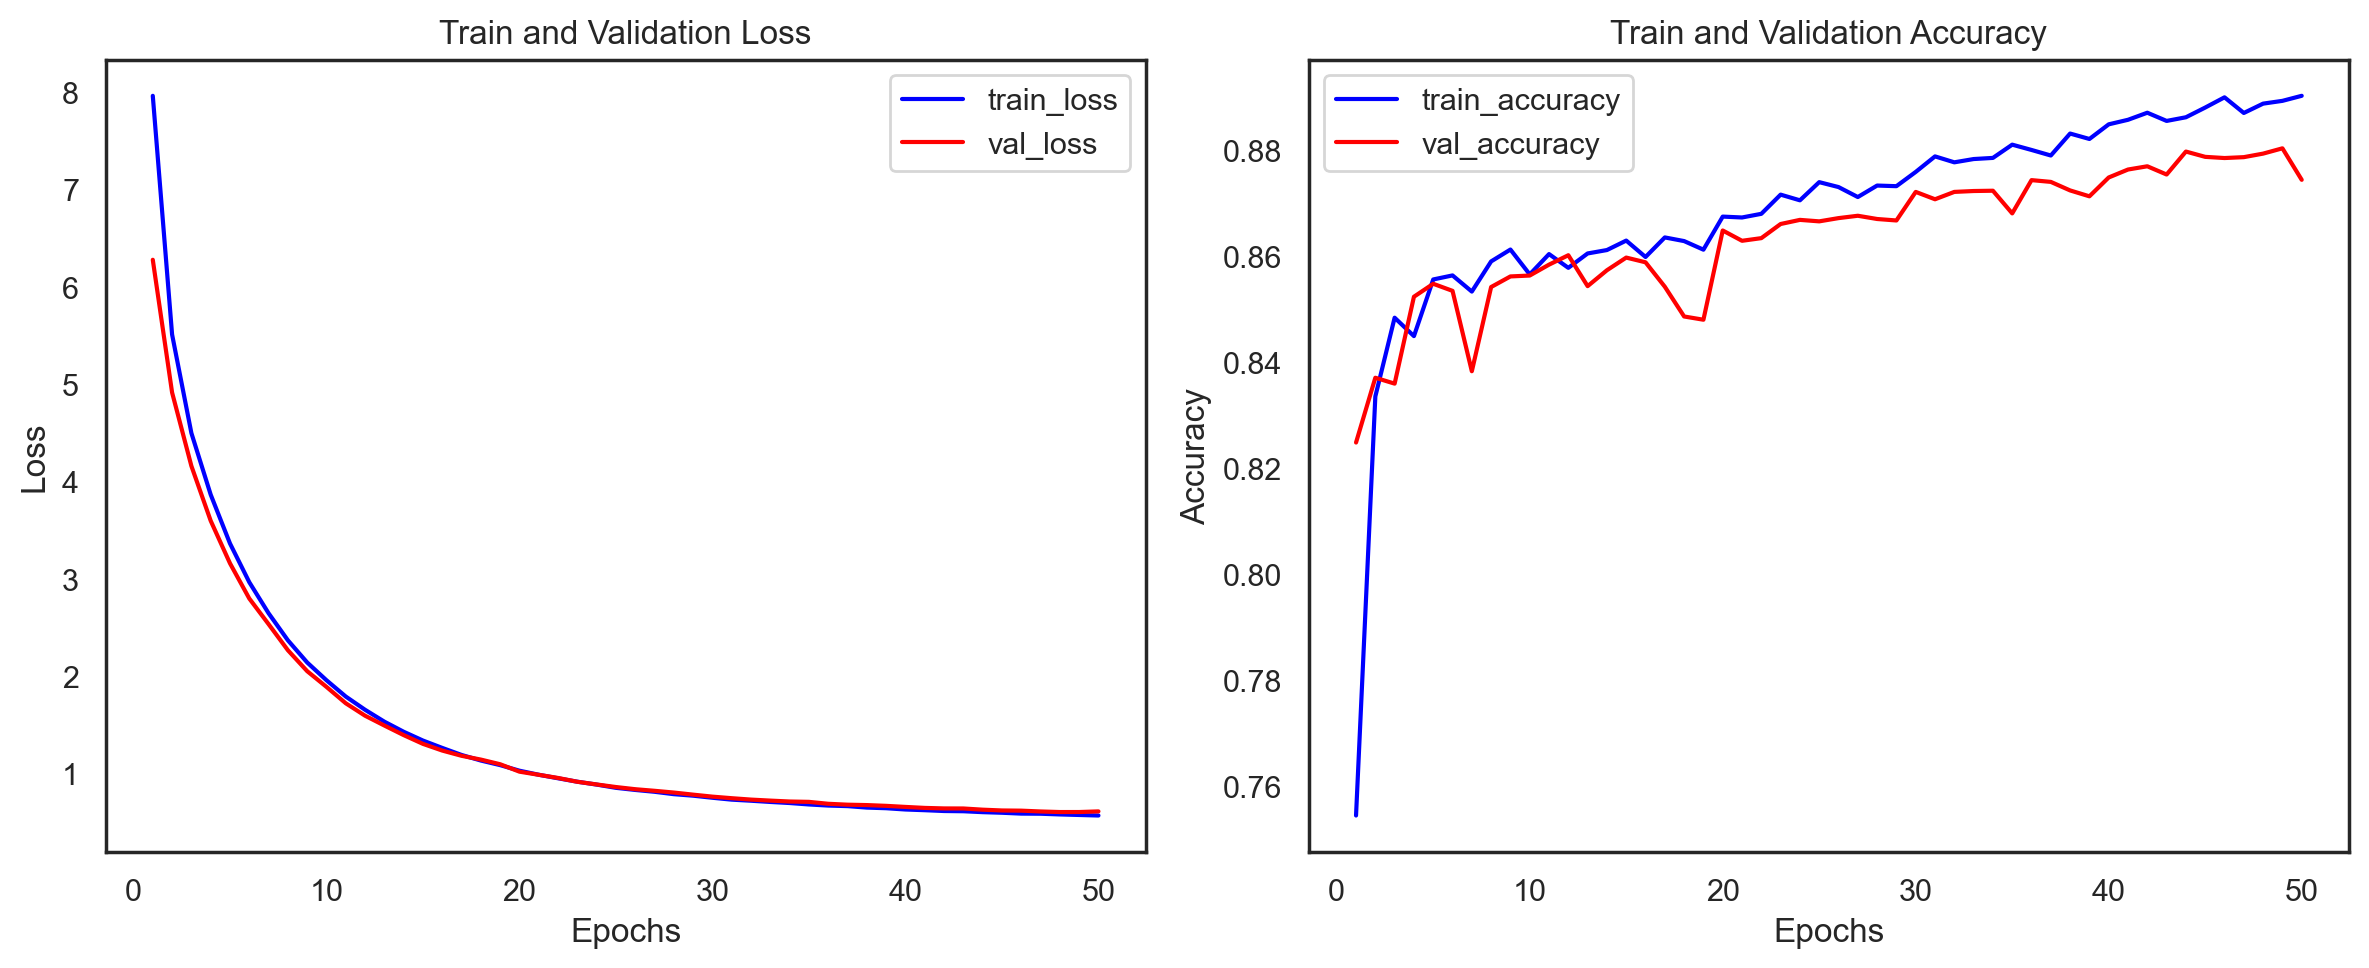

In [353]:
history_dict = f_model_3_hist.history

fig = plt.figure(figsize=(12, 5))

loss, val_loss = history_dict["loss"], history_dict["val_loss"]
epochs = range(1, len(loss) + 1)

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color="blue", label="train_loss")
ax1.plot(epochs, val_loss, color="red", label="val_loss")
ax1.set_title("Train and Validation Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.grid(False)
ax1.legend()

accuracy, val_accuracy = history_dict["acc"], history_dict["val_acc"]
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color="blue", label="train_accuracy")
ax2.plot(epochs, val_accuracy, color="red", label="val_accuracy")
ax2.set_title("Train and Validation Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.grid(False)
ax2.legend()

plt.tight_layout()
plt.show() ; 

In [354]:
f_model_3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6345 - acc: 0.8666


[0.6344662308692932, 0.866599977016449]

In [355]:
pred_y_3 = f_model_3.predict(x_test)

print(classification_report(np.argmax(y_test_cate, axis=-1), np.argmax(pred_y_3, axis=-1)))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.74      0.83      0.78      1000
           3       0.90      0.85      0.88      1000
           4       0.74      0.84      0.78      1000
           5       0.96      0.94      0.95      1000
           6       0.76      0.51      0.61      1000
           7       0.92      0.95      0.94      1000
           8       0.94      0.97      0.96      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.86     10000
weighted avg       0.87      0.87      0.86     10000



## 16-3. fashion mnist model 4

In [378]:
input_layer = Input(shape=(784, ), name="input")
hidden_1 = Dense(units=1024, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), activation="relu", 
                 name="hidden_1")(input_layer)
batch_layer = BatchNormalization(name="batch_data")(hidden_1)
hidden_2 = Dense(units=512, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), activation="relu", 
                 name="hidden_2")(hidden_1)
hidden_3 = Dense(units=256, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), activation="relu", 
                 name="hidden_3")(hidden_2)
hidden_4 = Dense(units=128, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), activation="relu", 
                 name="hidden_4")(hidden_3)
hidden_5 = Dense(units=64, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), activation="relu", 
                 name="hidden_5")(hidden_4)
hidden_6 = Dense(units=32, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), activation="relu", 
                 name="hidden_6")(hidden_5)
hidden_7 = Dense(units=16, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), activation="relu", 
                 name="hidden_7")(hidden_6)
output = Dense(units=10, kernel_initializer="glorot_uniform", activation="softmax", name="output")(hidden_7)

f_model_4 = Model(inputs=[input_layer], outputs=[output])
f_model_4.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hidden_1 (Dense)            (None, 1024)              803840    
                                                                 
 hidden_2 (Dense)            (None, 512)               524800    
                                                                 
 hidden_3 (Dense)            (None, 256)               131328    
                                                                 
 hidden_4 (Dense)            (None, 128)               32896     
                                                                 
 hidden_5 (Dense)            (None, 64)                8256      
                                                                 
 hidden_6 (Dense)            (None, 32)                208

In [360]:
from tensorflow.keras.callbacks import EarlyStopping

In [379]:
f_model_4.compile(optimizer=Adamax(learning_rate=0.001),
                 loss="sparse_categorical_crossentropy",
                 metrics=["acc"])

early_stopping_cb = EarlyStopping(patience=15,
                                  monitor="val_acc",
                                  restore_best_weights=True)

f_model_4_hist = f_model_4.fit(x_train,
                               y_train, 
                               epochs=60, 
                               batch_size=800, 
                               validation_data=(x_val, y_val),
                               callbacks=[early_stopping_cb])

Epoch 1/60
53/53 [==============================] - 3s 43ms/step - loss: 9.6755 - acc: 0.6161 - val_loss: 7.6618 - val_acc: 0.7716
Epoch 2/60
53/53 [==============================] - 2s 35ms/step - loss: 6.7692 - acc: 0.7942 - val_loss: 6.0296 - val_acc: 0.8043
Epoch 3/60
53/53 [==============================] - 2s 37ms/step - loss: 5.5796 - acc: 0.8182 - val_loss: 5.1739 - val_acc: 0.8231
Epoch 4/60
53/53 [==============================] - 2s 34ms/step - loss: 4.8521 - acc: 0.8356 - val_loss: 4.5587 - val_acc: 0.8360
Epoch 5/60
53/53 [==============================] - 2s 33ms/step - loss: 4.3101 - acc: 0.8406 - val_loss: 4.0778 - val_acc: 0.8426
Epoch 6/60
53/53 [==============================] - 2s 37ms/step - loss: 3.8780 - acc: 0.8463 - val_loss: 3.6929 - val_acc: 0.8455
Epoch 7/60
53/53 [==============================] - 2s 35ms/step - loss: 3.5299 - acc: 0.8491 - val_loss: 3.4026 - val_acc: 0.8346
Epoch 8/60
53/53 [==============================] - 2s 44ms/step - loss: 3.2427 - a

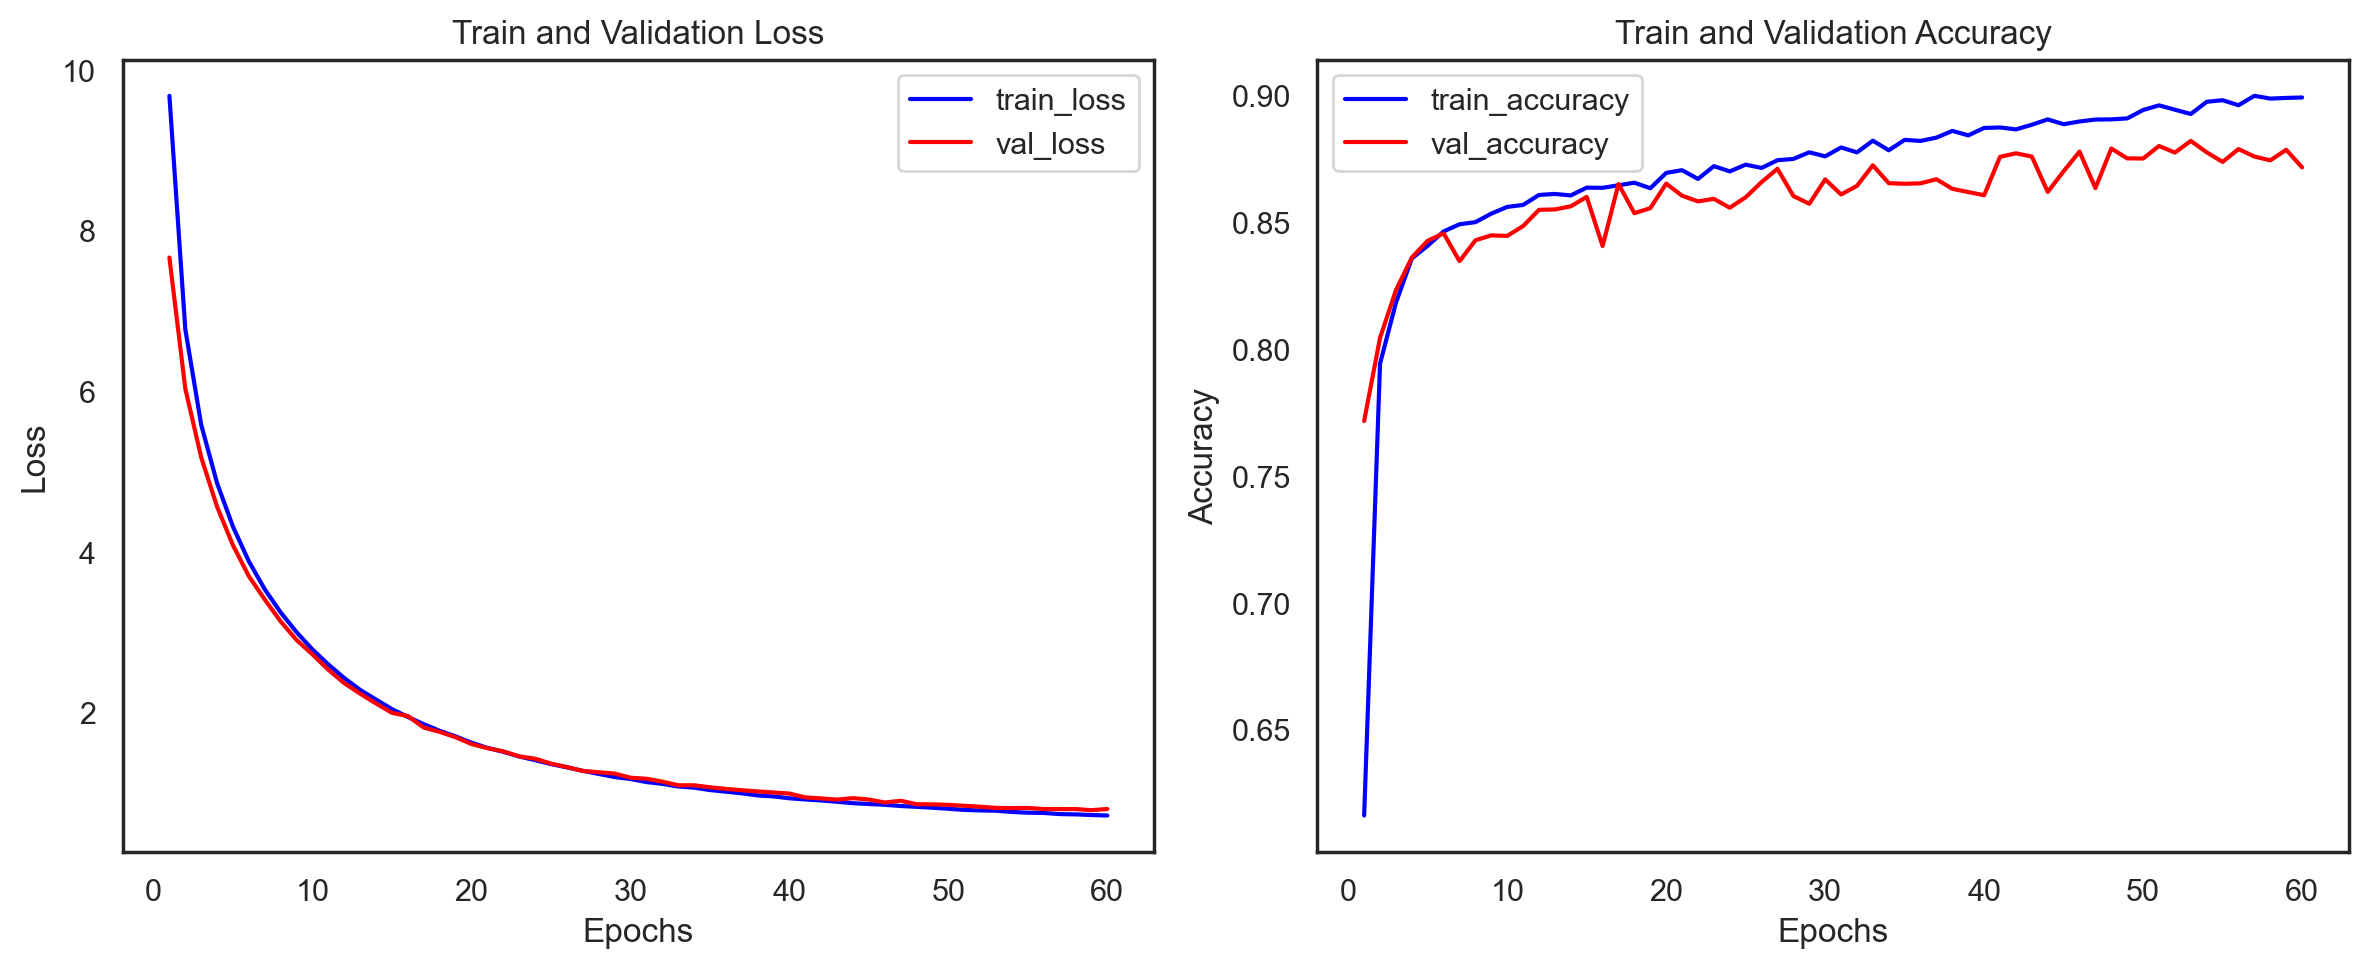

In [380]:
history_dict = f_model_4_hist.history

fig = plt.figure(figsize=(12, 5))

loss, val_loss = history_dict["loss"], history_dict["val_loss"]
epochs = range(1, len(loss) + 1)

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color="blue", label="train_loss")
ax1.plot(epochs, val_loss, color="red", label="val_loss")
ax1.set_title("Train and Validation Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.grid(False)
ax1.legend()

accuracy, val_accuracy = history_dict["acc"], history_dict["val_acc"]
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color="blue", label="train_accuracy")
ax2.plot(epochs, val_accuracy, color="red", label="val_accuracy")
ax2.set_title("Train and Validation Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.grid(False)
ax2.legend()

plt.tight_layout()
plt.show() ; 

In [381]:
f_model_4.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8216 - acc: 0.8611


[0.8216497302055359, 0.8611000180244446]

In [382]:
pred_y_4 = f_model_4.predict(x_test)

print(classification_report(np.argmax(y_test_cate, axis=-1), np.argmax(pred_y_4, axis=-1)))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1000
           1       0.98      0.97      0.97      1000
           2       0.74      0.82      0.78      1000
           3       0.85      0.89      0.87      1000
           4       0.75      0.84      0.79      1000
           5       0.98      0.89      0.94      1000
           6       0.79      0.50      0.61      1000
           7       0.86      0.99      0.92      1000
           8       0.94      0.96      0.95      1000
           9       0.96      0.91      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [383]:
print(f"{f_model.evaluate(x_test, y_test)}")
print(f"{f_model_2.evaluate(x_test, y_test)}")
print(f"{f_model_3.evaluate(x_test, y_test)}")
print(f"{f_model_4.evaluate(x_test, y_test)}")

313/313 [==============================] - 1s 3ms/step - loss: 0.4260 - acc: 0.8584
[0.42599809169769287, 0.8583999872207642]
313/313 [==============================] - 1s 4ms/step - loss: 0.8571 - acc: 0.8128
[0.8571257591247559, 0.8127999901771545]
313/313 [==============================] - 1s 3ms/step - loss: 0.6345 - acc: 0.8666
[0.6344662308692932, 0.866599977016449]
313/313 [==============================] - 1s 4ms/step - loss: 0.8216 - acc: 0.8611
[0.8216497302055359, 0.8611000180244446]


## 16-4. fashoin mnist model 5

In [384]:
input_layer = Input(shape=(784, ), name="input")
hidden_1 = Dense(units=800, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), activation="relu", 
                 name="hidden_1")(input_layer)
batch_layer = BatchNormalization()(hidden_1)
hidden_2 = Dense(units=600, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), activation="relu", 
                 name="hidden_2")(batch_layer)
hidden_3 = Dense(units=400, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), activation="relu", 
                 name="hidden_3")(hidden_2)
hidden_4 = Dense(units=200, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), activation="relu", 
                 name="hidden_4")(hidden_3)
hidden_5 = Dense(units=100, kernel_initializer="he_uniform", kernel_regularizer=l1_l2(l1=0.0001, l2=0.001), activation="relu", 
                 name="hidden_5")(hidden_4)
output = Dense(units=10, kernel_initializer="glorot_uniform", activation="softmax", name="output")(hidden_5)

f_model_5 = Model(inputs=[input_layer], outputs=[output])
f_model_5.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hidden_1 (Dense)            (None, 800)               628000    
                                                                 
 batch_normalization_2 (Batc  (None, 800)              3200      
 hNormalization)                                                 
                                                                 
 hidden_2 (Dense)            (None, 600)               480600    
                                                                 
 hidden_3 (Dense)            (None, 400)               240400    
                                                                 
 hidden_4 (Dense)            (None, 200)               80200     
                                                          

In [393]:
f_model_5.compile(optimizer=Adamax(learning_rate=0.0012),
                 loss="sparse_categorical_crossentropy",
                 metrics=["acc"])

f_model_5_hist = f_model_5.fit(x_train,
                               y_train, 
                               epochs=50, 
                               batch_size=500, 
                               validation_data=(x_val, y_val))

Epoch 1/50
84/84 [==============================] - 4s 33ms/step - loss: 0.7347 - acc: 0.9003 - val_loss: 0.7342 - val_acc: 0.8734
Epoch 2/50
84/84 [==============================] - 2s 28ms/step - loss: 0.5432 - acc: 0.9334 - val_loss: 0.7208 - val_acc: 0.8727
Epoch 3/50
84/84 [==============================] - 2s 28ms/step - loss: 0.5006 - acc: 0.9405 - val_loss: 0.7910 - val_acc: 0.8448
Epoch 4/50
84/84 [==============================] - 2s 27ms/step - loss: 0.4827 - acc: 0.9429 - val_loss: 0.7007 - val_acc: 0.8747
Epoch 5/50
84/84 [==============================] - 2s 28ms/step - loss: 0.4718 - acc: 0.9441 - val_loss: 0.7538 - val_acc: 0.8618
Epoch 6/50
84/84 [==============================] - 2s 28ms/step - loss: 0.4524 - acc: 0.9488 - val_loss: 0.7924 - val_acc: 0.8476
Epoch 7/50
84/84 [==============================] - 2s 29ms/step - loss: 0.4489 - acc: 0.9484 - val_loss: 0.6664 - val_acc: 0.8777
Epoch 8/50
84/84 [==============================] - 2s 28ms/step - loss: 0.4395 - a

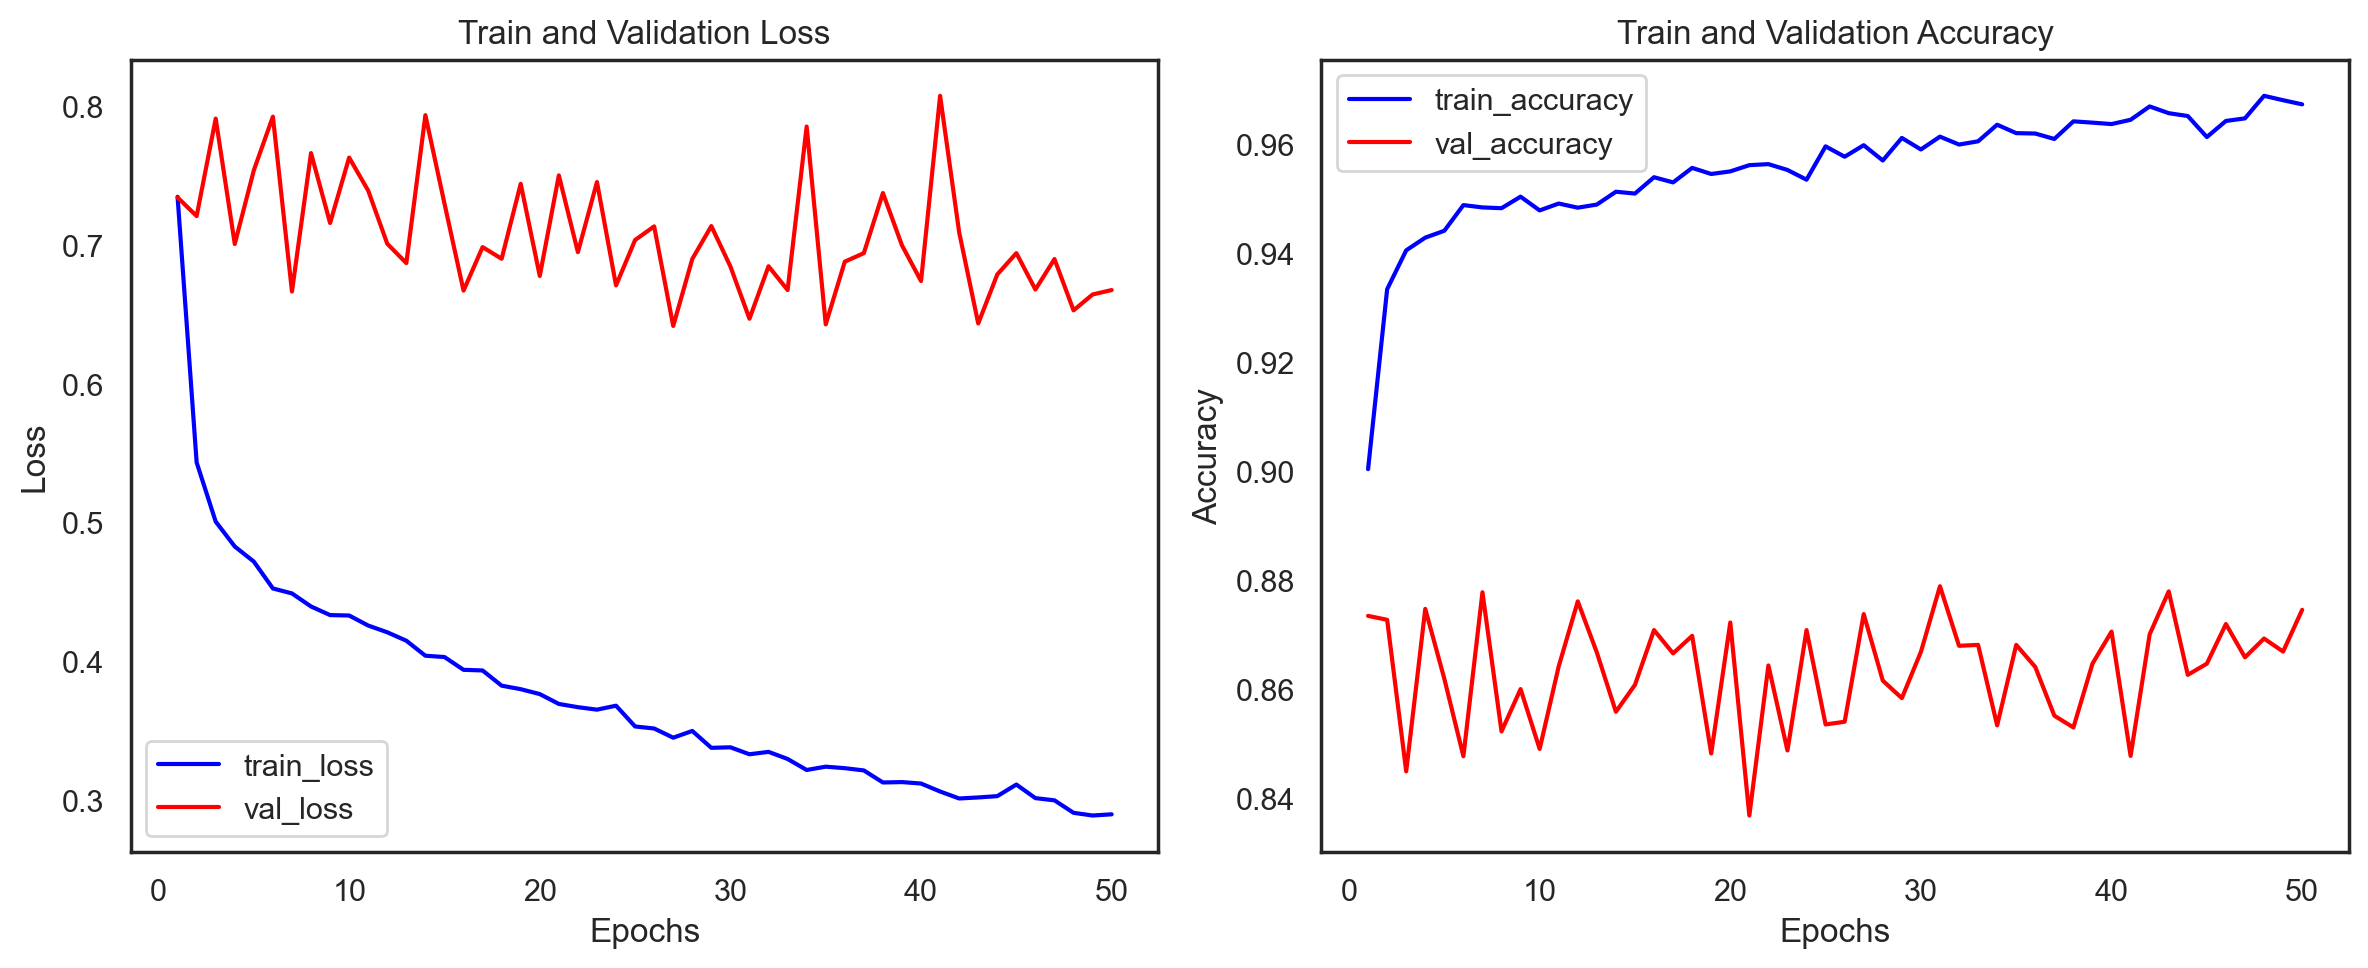

In [394]:
history_dict = f_model_5_hist.history

fig = plt.figure(figsize=(12, 5))

loss, val_loss = history_dict["loss"], history_dict["val_loss"]
epochs = range(1, len(loss) + 1)

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color="blue", label="train_loss")
ax1.plot(epochs, val_loss, color="red", label="val_loss")
ax1.set_title("Train and Validation Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.grid(False)
ax1.legend()

accuracy, val_accuracy = history_dict["acc"], history_dict["val_acc"]
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color="blue", label="train_accuracy")
ax2.plot(epochs, val_accuracy, color="red", label="val_accuracy")
ax2.set_title("Train and Validation Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.grid(False)
ax2.legend()

plt.tight_layout()
plt.show() ; 

In [395]:
pred_y_5 = f_model_5.predict(x_test)

print(classification_report(np.argmax(y_test_cate, axis=-1), np.argmax(pred_y_5, axis=-1)))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1000
           1       0.98      0.97      0.98      1000
           2       0.78      0.79      0.79      1000
           3       0.89      0.87      0.88      1000
           4       0.76      0.82      0.79      1000
           5       0.96      0.96      0.96      1000
           6       0.65      0.66      0.66      1000
           7       0.91      0.96      0.94      1000
           8       0.89      0.98      0.93      1000
           9       0.98      0.92      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [396]:
print(f"{f_model.evaluate(x_test, y_test)}")
print(f"{f_model_2.evaluate(x_test, y_test)}")
print(f"{f_model_3.evaluate(x_test, y_test)}")
print(f"{f_model_4.evaluate(x_test, y_test)}")
print(f"{f_model_5.evaluate(x_test, y_test)}")

313/313 [==============================] - 1s 2ms/step - loss: 0.4260 - acc: 0.8584
[0.42599809169769287, 0.8583999872207642]
313/313 [==============================] - 1s 4ms/step - loss: 0.8571 - acc: 0.8128
[0.8571257591247559, 0.8127999901771545]
313/313 [==============================] - 1s 4ms/step - loss: 0.6345 - acc: 0.8666
[0.6344662308692932, 0.866599977016449]
313/313 [==============================] - 1s 4ms/step - loss: 0.8216 - acc: 0.8611
[0.8216497302055359, 0.8611000180244446]
313/313 [==============================] - 1s 4ms/step - loss: 0.7211 - acc: 0.8631
[0.7211496233940125, 0.863099992275238]
